<a id='start'></a> 

# Solar Orbiter Data Tutorial, 16 September 2022, Belfast

## RPW Low Frequency Receiver (LFR)
<br>
<font size="3"> 
As part of the Radio and Plasma Waves (RPW) instrument on the Solar Orbiter mission, the Low Frequency Receiver (LFR) is designed to digitize and process the signals from a triaxal coplanar electric antenna system (ANT), its associated biasing unit (BIAS), and a triaxal search-coil magnetometer over a frequency range of quasi DC to 10 kHz. </font>    

### Thomas Chust, LPP (https://www.lpp.polytechnique.fr)
<font size="3"> RPW lead CoI for LFR <br>
thomas.chust@lpp.polytechnique.fr </font>   

<div style='display:flex'>
<div><img src=./Pictures/Logo_RPW_17x7cm300dpi.jpg width=40% align="left"></div>    
<div><img src=./Pictures/SolarOrbiter.png width=40% align="left"></div>
</div>  

<font size="3">

1. [Useful links](#useful-links)
1. [Brief descriptions](#descriptions)
1. [Extra routines](#routines)
1. [Directory and day selection of the data](#directory-data)
1. [L2 Normal MAG data](#l2-mag-file)
1. [L2 Normal BP1 data](#l2-surv-bp1-file)   
    1. Full day spectrogram
    1. Zoomed-in spectrogram
    1. Zoomed-in spectrogram with $F_{ce}$ lines (5 % and 10%)  and $\theta$ angle (n, B0)
1. [L2 Normal BP2 data](#l2-surv-bp2-file)
    1. Full day spectrogram
    1. Zoomed-in spectrogram
    1. Zoomed-in spectrogram with $F_{ce}$ lines (5 % and 10%)
    1. Zoomed-in "BP1" spectrogram with $F_{ce}$ lines (5 % and 10%)  and $\theta$ angle (n, B0)
1. [L2 Normal SWF data](#l2-surv-swf-file)    
    1. Full day PSD spectrogram
    1. Zoomed-in PSD spectrogram
    1. Zoomed-in "BP1" spectrogram with $F_{ce}$ lines (5 % and 10%)  and $\theta$ angle (n, B0)
    1. Plot of selected waveform snapshot    
1. [L2 Burst CWF data](#l2-surv-cwf-file)    
    1. Full day PSD spectrogram
    1. Zoomed-in PSD spectrogram
    1. Zoomed-in "BP1" spectrogram with $F_{ce}$ lines (5 % and 10%)  and $\theta$ angle (n, B0)   
    1. Plot of selected waveform
1. [End](#end)
    
 </font>  

In [1]:
#%matplotlib inline
%matplotlib notebook

import sys
import os

print('sys.path:', sys.path, '\n')
# python package directory "tch" shall be included in sys.path 
# or its content shall be copied in the present tutorial working directory

import matplotlib.pyplot as plt
import numpy as np
import glob
from spacepy import pycdf
from datetime import datetime, timedelta
from numpy.linalg import norm

from lib_lfr.global_params import *
from lib_lfr.load_routines import (load_bp2_CDF_L2, load_bp1_CDF_L2,
                                   load_swf_e_CDF_L2, load_swf_b_CDF_L2,
                                   load_cwf_b_CDF_L2, load_cwf_e_CDF_L2,
                                   meld_swf_E_bias_L2, meld_cwf_E_bias_L2)
from lib_lfr.calib_routines import sm_from_swf, sm_from_cwf
from lib_lfr.transform_routines import transform_from_UARF_to_SRF                                        
from lib_lfr.time_routines import index_from_date
from lib_lfr.bp_routines import Fce_from_B0, wave_normal_vector_theta, sm_3b2e_bp1
from lib_lfr.swf_routines import select_oneSWF, filtering_oneSWF, fig_oneSWF

from lib_plot.spectral_routines import fig_spectrograms 
from lib_plot.curves_routines import fig_waveforms

from lib_solo.load_routines import load_mag_CDF_L2

from lib_maths.conversion_routines import B_to_Fce

dir_plots = './Plots'   # shall be defined in the present tutorial working directory   
#dir_plots = '/home/chust/Plots'   

sys.path: ['/WIN/Users/chust/DD CHUST/Missions/Solar Orbiter/LFR/Python/Solar Orbiter/RPW_LFR_data_tutorial_20220916_Belfast', '/WIN/Users/chust/DD CHUST/Missions/Solar Orbiter/LFR/Python/tch', '/usr/lib64/python310.zip', '/usr/lib64/python3.10', '/usr/lib64/python3.10/lib-dynload', '', '/home/lab-lpp.local/chust/venv_py3/lib64/python3.10/site-packages', '/home/lab-lpp.local/chust/venv_py3/lib/python3.10/site-packages', '/usr/lib64/python3.10/site-packages', '/usr/lib/python3.10/site-packages'] 



/home/lab-lpp.local/chust/venv_py3/lib64/python3.10/site-packages/spacepy/time.py:2365: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


<a id='useful-links'></a> 
## Useful links [previous](#start) [next](#descriptions)

1. Thomas' shared links
    1. RPW/LFR slides and plots: https://ao.lpp.polytechnique.fr/index.php/s/iizK4Y6RcmHPx5i
    1. Python package "tch" : https://ao.lpp.polytechnique.fr/index.php/s/gzosYYdLAxxgrCN
    1. Chust et al., A&A, 2021: https://doi.org/10.1051/0004-6361/202140932


1. Solar Orbiter school
    1. Sète 2022: https://owncloud.ias.u-psud.fr/index.php/s/R2x3mCwrYLN2kJs?dir=undefined&openfile=5975769



1. LESIA    
    1. SOLO data (public): https://rpw.lesia.obspm.fr/roc/data/pub/solo/rpw/data/
    1. How to retrieve the RPW data? https://rpw.lesia.obspm.fr/rpw-data/data-retrieval/
    1. Summary plot daily: https://rpw.lesia.obspm.fr/rpw-data/daily-summary-plots/
    1. Summary plot SBM: https://rpw.lesia.obspm.fr/rpw-data/sbm-summary-plots/
    1. RPW data products: https://confluence-lesia.obspm.fr/display/ROC/RPW+Data+Products  
    
1. ESA
    1. SOAR: http://soar.esac.esa.int/soar/
    1. SOC Public: https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/
    1. Orbit plots: https://issues.cosmos.esa.int/solarorbiterwiki/display/SOSP/Orbit+Plots
    1. Where is SO: https://www.cosmos.esa.int/web/solar-orbiter/where-is-solar-orbiter    

<a id='descriptions'></a> 
## Brief descriptions [start](#start) [next](#routines)

### 1. RPW instrument overview

<img src=./Pictures/RPW_instrument_overview.png  width=90%>    
<br>

### 2. Spacecraft Reference Frame (SRF)

<br>
<img src=./Pictures/SRF.png  width=70%>    
<br>

### 3. LFR nominal inputs : 3B + 2E + 1V (≤ 10 kHz)

### 4. LFR data products and data streams

<font size="3"> The LFR signal processing, based on a FPGA, provides routinely, </font> 

* <font size="3">  __waveforms__ (SWF & CWF)  </font>
* <font size="3">  __spectral matrices__ (ASM & BP2) </font> 
* <font size="3">  __basic wave parameters__ (BP1)  </font> 

<font size="3"> at different time and frequency resolutions: </font>

&emsp;&emsp;  <font size="3"> __A. LFR Normal Mode (NM)__  </font>
<img src=./Pictures/LFR_NM_data_flow_1.png  width=80%>
<img src=./Pictures/LFR_NM_data_flow_2.png  width=80%>

&emsp;&emsp;  <font size="3"> __B. LFR Burst Mode (BM) and  Selected Burst Mode 2 (SBM2)__  </font>
<img src=./Pictures/LFR_BM_data_flow.png  width=80%>

&emsp;&emsp;  <font size="3"> __C. LFR Selected Burst Mode 1 (SBM1)__  </font>
<img src=./Pictures/LFR_SBM1_data_flow.png  width=80%>

### 4. LFR spectral products (ASM, BP2, BP1)

<img src=./Pictures/LFR_spectral_products.png  width=100%>


<a id='routines'></a> 
## Extra routines  [previous](#descriptions) [next](#directory-data) [end](#end) 

In [2]:
def filter_scm_swf_QBM(scm_swf, l2_quality_bitmask, value=np.nan):
    """
    scm_swf[npt, 3], i.e. reshaped swf 
    npt = nsnap x 2048 
    """    
    scm_swf_filtered = scm_swf.copy()
    tag_per_swf = (l2_quality_bitmask & 2) == 2
    reshaped_tag = np.ravel(np.full((2048, len(tag_per_swf)), tag_per_swf), order='F')
    scm_swf_filtered[reshaped_tag, :] = value
    return scm_swf_filtered

def filter_scm_cwf_QBM(scm_cwf, l2_quality_bitmask, value=np.nan):
    """
    scm_cwf[npt, 3]
    """    
    scm_cwf_filtered = scm_cwf.copy()
    scm_cwf_filtered[(l2_quality_bitmask & 2) == 2, :] = value
    return scm_cwf_filtered                

def transform_from_ANT_to_SRF_bis(E, A2Y=-6.99, A1Z=-7.04, alpha12=1.):
    """
    E(npts, ncomp): input array of 2-D vectors of differential potential measurement expressed in the
                    ANT coordinate system (ANT12, ANT23) in V (or count) unit (Vij = Vi - Vj, so that
                    it points in the direction of the corresponding electric field)             
                    to be transformed and calibrated into the SRF (so called "Spacecraft") coordinate  
                    system in V/m (or count/m) unit.                           
    E_output(:, 0): EY = -V23 / Leff_Y      
    E_output(:, 1): EZ = -(2*V12*alpha12 + V23) / 2 / Leff_Z            
                    when alpha12 >> 1 then EZ = -V12 * (alpha12/Leff_Z)  
    """                 
    return np.stack((E[:,1] / A2Y, (2*alpha12*E[:,0] + E[:,1]) / (2*A1Z)), axis=-1) 

<a id='directory-data'></a> 
## Directory and day selection of the data [start](#start) [next](#l2-mag-file) [end](#end)

In [3]:
dir_DATA = './DATA'                            # shall be defined in the present tutorial working directory   
#dir_DATA = '/home/chust/DATA/SO/NECP/'         # pc-p-chust
#dir_DATA = '/DATA2/SO'                         # PC-CHUST2.lpp.polytechnnique.fr  
#dir_DATA = '/run/media/chust/Samsung_T5/SO/'   # Samsung_T5

print("Data directory: %s"%(dir_DATA))

YYYY = '2022'
MM = '03'
DD = '26'
day_data = YYYY + MM + DD

print("Day of the data: %s"%(day_data))

Data directory: ./DATA
Day of the data: 20220326


<a id='l2-mag-file'></a> 
## L2 Normal MAG data [start](#start) [next](#l2-surv-bp1-file) [end](#end) 

In [4]:
cdffiles=glob.glob(dir_DATA + '/MAG_L2_2022' + '/*srf*normal*' + day_data + '*')

cdffiles.sort()
for file in cdffiles:
    print(os.path.basename(file))  
    
mag_l2_cdffile = cdffiles[0] 
mag_l2_bname = os.path.basename(mag_l2_cdffile)[:-4]     

solo_L2_mag-srf-normal-internal_20220326_V00.cdf


In [5]:
t1, t2 = None, None
#t1, t2 = datetime(2022, 3, 26, 17, 0, 0), datetime(2022, 3, 26, 22, 0, 0)

raw_mag = False
mag_bvec, mag_time = load_mag_CDF_L2(mag_l2_cdffile, t1=t1, t2=t2, raw_Epoch=raw_mag, echo=True, 
                                     key_attrs=None, key_field=None)

mag_fce = B_to_Fce(norm(mag_bvec, axis=-1), nT=True, kHz=False)

PRINT cdf: 
 B_SRF: CDF_FLOAT [691205, 3]
EPOCH: CDF_TIME_TT2000 [691205]
LBL1_B_SRF: CDF_UCHAR*3 [3] NRV
QUALITY_BITMASK: CDF_UINT2 [691205]
QUALITY_FLAG: CDF_UINT1 [691205]
REP1_B_SRF: CDF_UCHAR*1 [3] NRV
VECTOR_RANGE: CDF_UINT1 [691205]
VECTOR_TIME_RESOLUTION: CDF_FLOAT [691205] 

start: 2022-03-26 00:00:00.095986
stop:  2022-03-26 23:59:59.991692
=> 691205 elements
Sampling frequency: 8.000041961890021


<IPython.core.display.Javascript object>


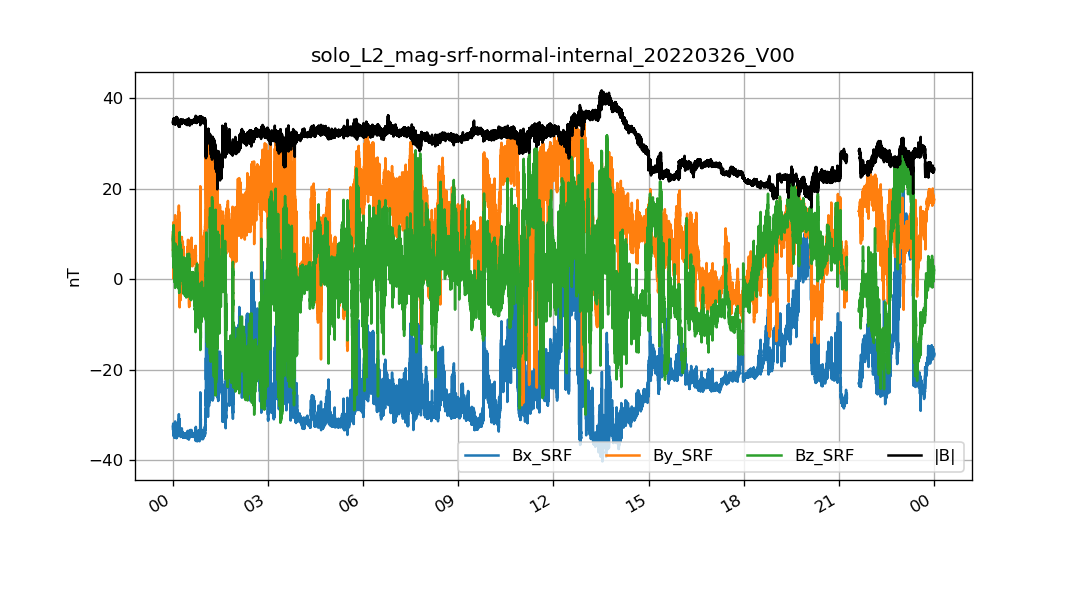

In [6]:
#plt.rcParams["date.autoformatter.hour"]   = '%Y-%m-%d %H'
plt.rcParams["date.autoformatter.hour"]   = '%H'
plt.rcParams["date.autoformatter.minute"] = '%H:%M'
plt.rcParams["date.autoformatter.second"] = '%H:%M:%S.%f'

fig=plt.figure(figsize=(9,5))
plt.title(mag_l2_bname)
plt.ylabel('nT')
plt.xlabel('tt2000 seconds' if raw_mag else '')
mag_comp = ['Bx_SRF', 'By_SRF', 'Bz_SRF']
for icomp in range(3):
    plt.plot(mag_time/1e9 if raw_mag else mag_time, mag_bvec[:,icomp], label=mag_comp[icomp])     
plt.plot(mag_time/1e9 if raw_mag else mag_time, norm(mag_bvec, axis=-1), color='black', label='|B|')      
plt.legend(loc='lower right', ncol=4)   
plt.grid(True)
fig.autofmt_xdate(rotation=30, ha='right')    

<a id='l2-surv-bp1-file'></a> 
## L2 Normal BP1 data [start](#start)  [previous](#l2-mag-file)  [next](#l2-surv-bp2-file) [end](#end) 

In [7]:
cdffiles=glob.glob(dir_DATA + '/RPW_L2_SURV_2022' + '/*lfr*surv*bp1_' + day_data + '*')
cdffiles.sort()
for file in cdffiles:
    print(os.path.basename(file))  
    
bp1_l2_cdffile = cdffiles[0]    
bp1_l2_bname = os.path.basename(bp1_l2_cdffile)[:-4]    

solo_L2_rpw-lfr-surv-bp1_20220326_V01.cdf


In [8]:
bp1_l2_cdf = load_bp1_CDF_L2(bp1_l2_cdffile, echo=True, params=True, params_bias=True,
                             key_attrs=['Software_version', 'Parents'], key_field=None,
                             key_field_attrs=['PB_N_F0'],
                             fill_value=None, SRF=True)
(bp1_l2_n_pb, bp1_l2_n_pe, bp1_l2_n_dop, bp1_l2_n_nvec, bp1_l2_n_ellip, 
 bp1_l2_n_sx_rea, bp1_l2_n_sx_arg, bp1_l2_n_vphi_rea, bp1_l2_n_vphi_arg,            
 bp1_l2_n_epoch, bp1_l2_n_freq, bp1_l2_n_params, bp1_l2_n_params_bias,
 bp1_l2_b_pb, bp1_l2_b_pe, bp1_l2_b_dop, bp1_l2_b_nvec, bp1_l2_b_ellip, 
 bp1_l2_b_sx_rea, bp1_l2_b_sx_arg, bp1_l2_b_vphi_rea, bp1_l2_b_vphi_arg,            
 bp1_l2_b_epoch, bp1_l2_b_freq, bp1_l2_b_params, bp1_l2_b_params_bias) = bp1_l2_cdf

bp1_l2_n_epoch_datetime = 3*[None]
for F in [0,1,2]:
    bp1_l2_n_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(bp1_l2_n_epoch[F])
bp1_l2_b_epoch_datetime = 2*[None]
for F in [0,1]:
    bp1_l2_b_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(bp1_l2_b_epoch[F])   
    
# incorparated in CALBUT version >= 2.0    
corr_bp1_l2 = 4 
psd_bp1_l2 = True

PRINT cdf: 
 BIAS_MODE_BIAS1_ENABLED: CDF_UINT1 [69322]
BIAS_MODE_BIAS2_ENABLED: CDF_UINT1 [69322]
BIAS_MODE_BIAS3_ENABLED: CDF_UINT1 [69322]
BIAS_MODE_HV_ENABLED: CDF_UINT1 [69322]
BIAS_MODE_MUX_SET: CDF_UINT1 [69322]
BIAS_ON_OFF: CDF_UINT1 [69322]
BP1_CNT: CDF_UINT1 [0]
BW: CDF_UINT1 [69322]
B_F0: CDF_REAL4 [22] NRV
B_F1: CDF_REAL4 [26] NRV
COMMON_BIA_STATUS_FLAG: CDF_UINT1 [0]
DOP_B_F0: CDF_REAL4 [3732, 22]
DOP_B_F1: CDF_REAL4 [3732, 26]
DOP_N_F0: CDF_REAL4 [20620, 11]
DOP_N_F1: CDF_REAL4 [20619, 13]
DOP_N_F2: CDF_REAL4 [20619, 12]
ELLIP_B_F0: CDF_REAL4 [3732, 22]
ELLIP_B_F1: CDF_REAL4 [3732, 26]
ELLIP_N_F0: CDF_REAL4 [20620, 11]
ELLIP_N_F1: CDF_REAL4 [20619, 13]
ELLIP_N_F2: CDF_REAL4 [20619, 12]
Epoch: CDF_TIME_TT2000 [69322]
Epoch_B_F0: CDF_TIME_TT2000 [3732]
Epoch_B_F1: CDF_TIME_TT2000 [3732]
Epoch_N_F0: CDF_TIME_TT2000 [20620]
Epoch_N_F1: CDF_TIME_TT2000 [20619]
Epoch_N_F2: CDF_TIME_TT2000 [20619]
FREQ: CDF_UINT1 [69322]
L2_QUALITY_BITMASK: CDF_UINT2 [69322]
NVEC_B_F0: CDF_REAL4

### Full day spectrogram of L2 Normal BP1 data

<IPython.core.display.Javascript object>


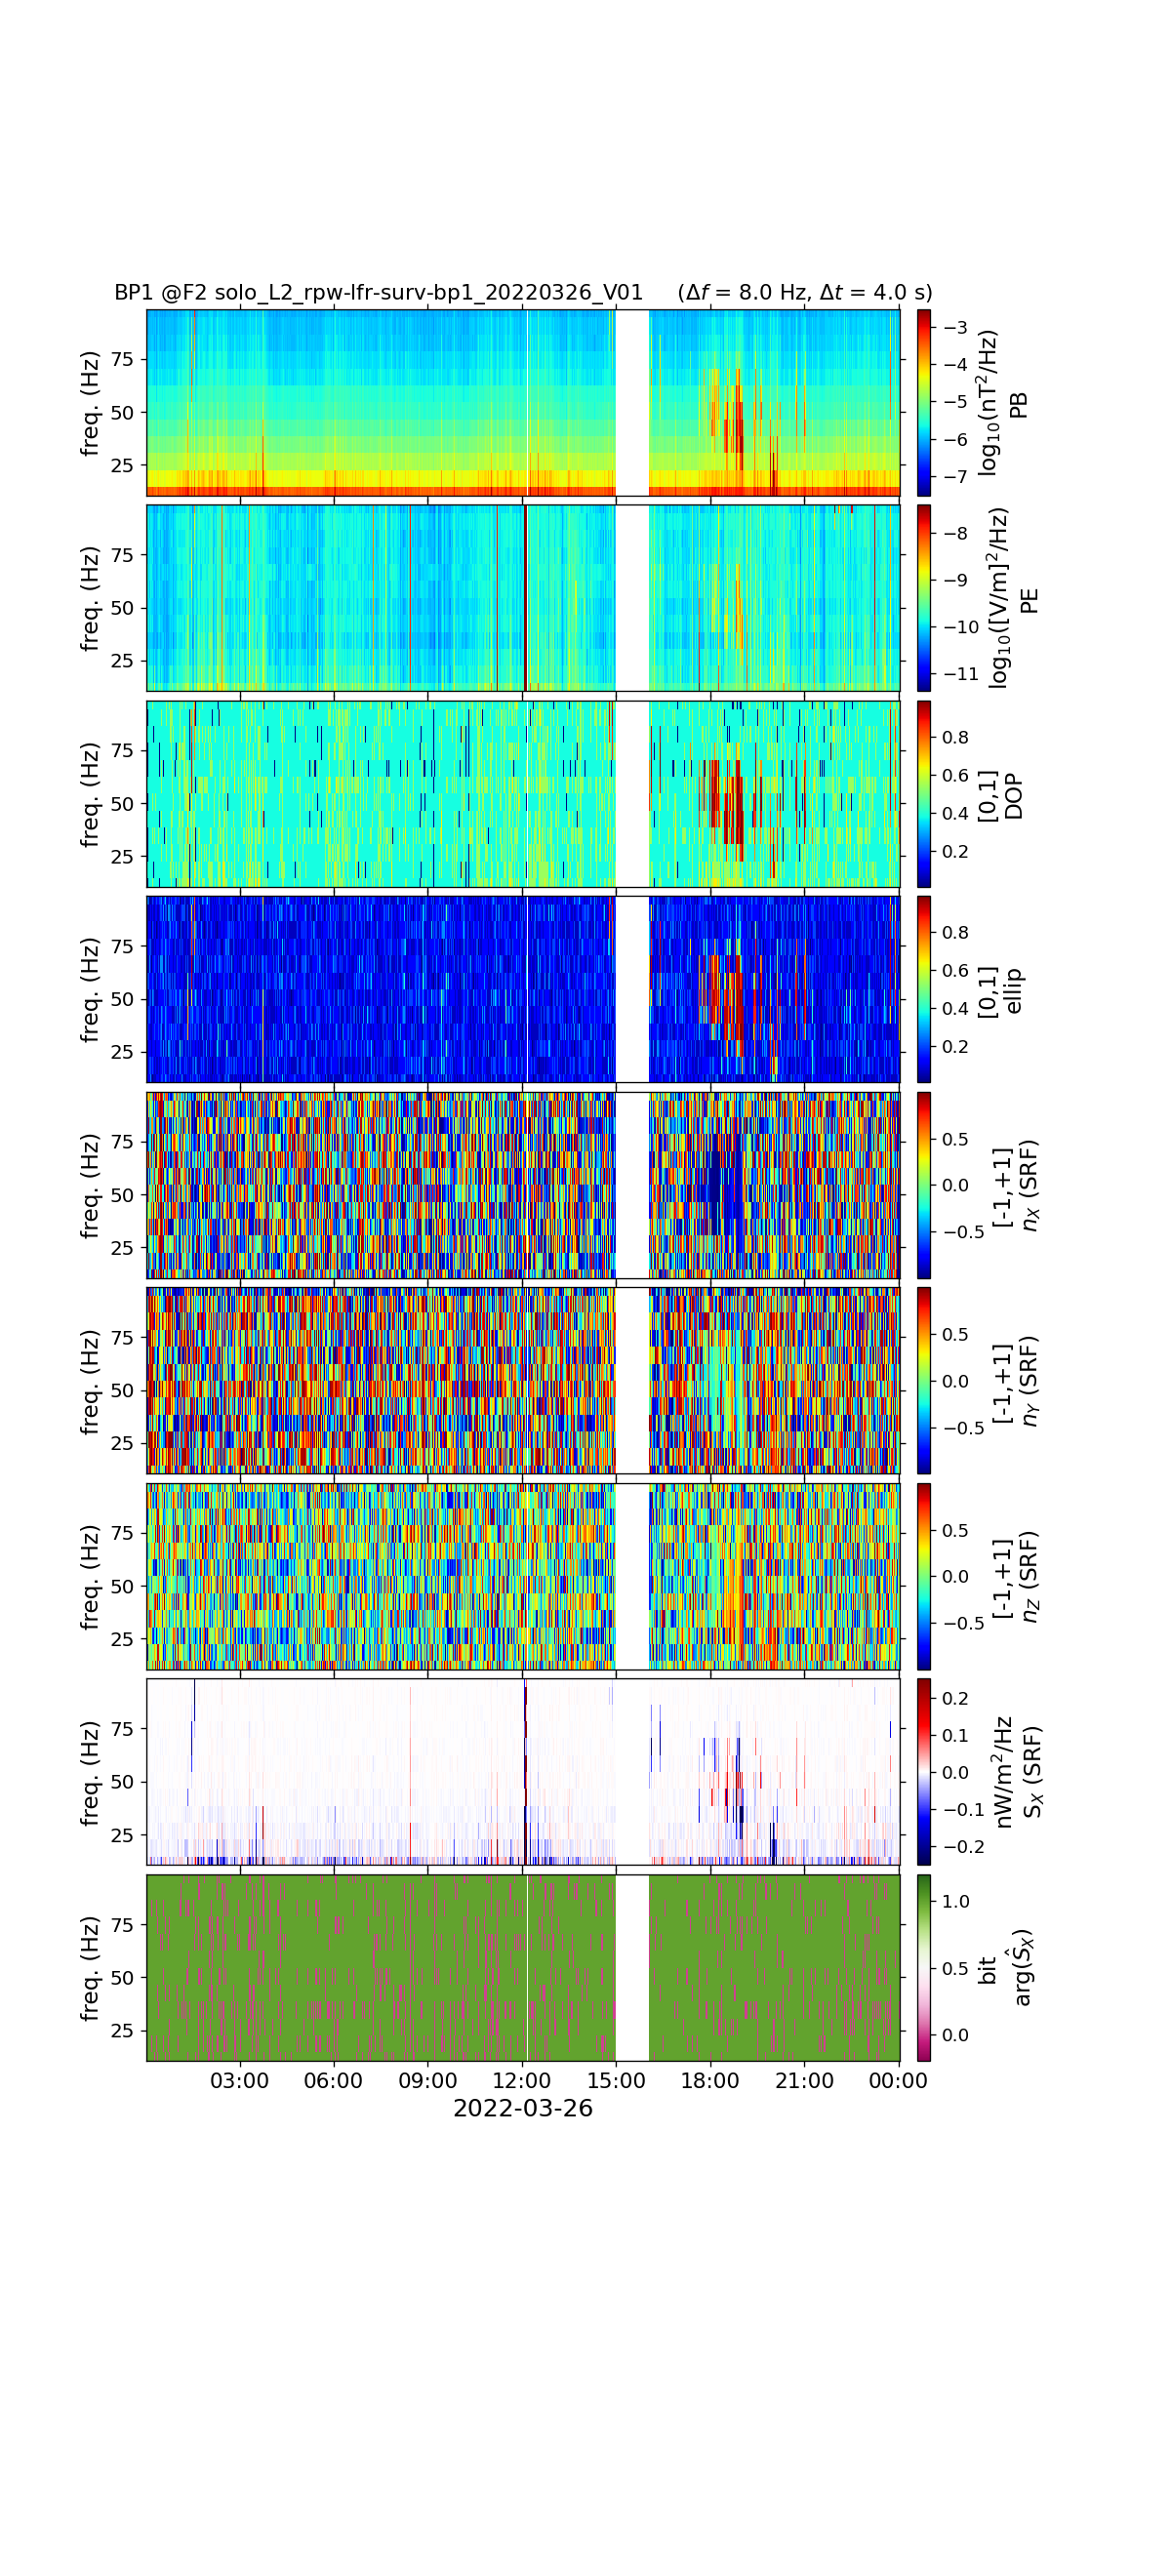

gap insertion here:
2022-03-26 12:02:55.780203
2022-03-26 12:08:58.252862
2022-03-26 14:51:44.210760
2022-03-26 14:59:31.208492

gap interval:
0:00:18.474306
0:02:54.003925
0:00:06.999966
1:02:21.071494



In [9]:
cmap_list = 7*[plt.cm.jet] + [plt.cm.seismic] + [plt.cm.PiYG]

ampl_rg_N_F0F1F2_BP1 = [[[2e-10, 6e-9],[2e-12/49, 2e-9/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999], [-0.999, 0.999],
                         [-0.5/800*4, 0.5/800*4],[-0.2, 1.2]],                    
                        [[3e-10, 6e-7],[4e-11/49, 2e-8/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999], [-0.999, 0.999],
                         [-0.5/80*4, 0.5/80*4],[-0.2, 1.2]],
                        [[3e-8, 3e-3],[2e-10/49, 2e-6/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999], [-0.999, 0.999], 
                         [-0.5/8*4, 0.5/8*4],[-0.2, 1.2]]]                                            

#for F in [0,1,2]:
for F in [2]:                
    ampl_range = ampl_rg_N_F0F1F2_BP1[F]
    #ampl_range = None
     #date_fmt = '%Y-%m-%d %H:%M:%S'
    date_fmt = '%H:%M'
    #date_fmt = '%H:%M:%S'
    #date_fmt = None   
    fig_spectrograms([bp1_l2_n_pb[F], bp1_l2_n_pe[F], bp1_l2_n_dop[F], bp1_l2_n_ellip[F],
                     bp1_l2_n_nvec[F][...,0], bp1_l2_n_nvec[F][...,1], bp1_l2_n_nvec[F][...,2],
                     bp1_l2_n_sx_rea[F], bp1_l2_n_sx_arg[F]],
                     bp1_l2_n_epoch_datetime[F], bp1_l2_n_freq[F], 
                     cmap=cmap_list, figsize=(10,22), hspace=0.05, cbar_aspect=15, cbar_pad=0.02,                                 
                     fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,
                     ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', dt_i1i2=1, date_fmt=date_fmt,                                         
                     fname=dir_plots+'/'+bp1_l2_bname+'_BP1_F%s_spectrogram_all-srf_corr=%4.2f.png'%(F, corr_bp1_l2),
                     log=[True, True, False, False, False, False, False, False, False], 
                     psd=[True, True, False, False, False, False, False, False, False], 
                     nop=[False, False, True, True, True, True, True, True, True],
                     units=['nT', '[V/m]', '[0,1]', '[0,1]', '[-1,+1]', '[-1,+1]', '[-1,+1]', 'nW/m$^2$/Hz', 
                            'bit'], 
                     names=['PB', 'PE', 'DOP', 'ellip', 
                            #'n1', 'n2', 'n3', 
                            '$n_X$ (SRF)', '$n_Y$ (SRF)', '$n_Z$ (SRF)',
                            'S$_X$ (SRF)', 'arg($\hat{S}_{\!X}$)'],
                     comment='{} @F{:d} '.format('BP1', F) + bp1_l2_bname, fill_value=None,
                     time_gap=True, gap_echo=True, ampl_range=ampl_range)  

### Zoomed-in spectrogram of L2 Normal BP1 data

<IPython.core.display.Javascript object>


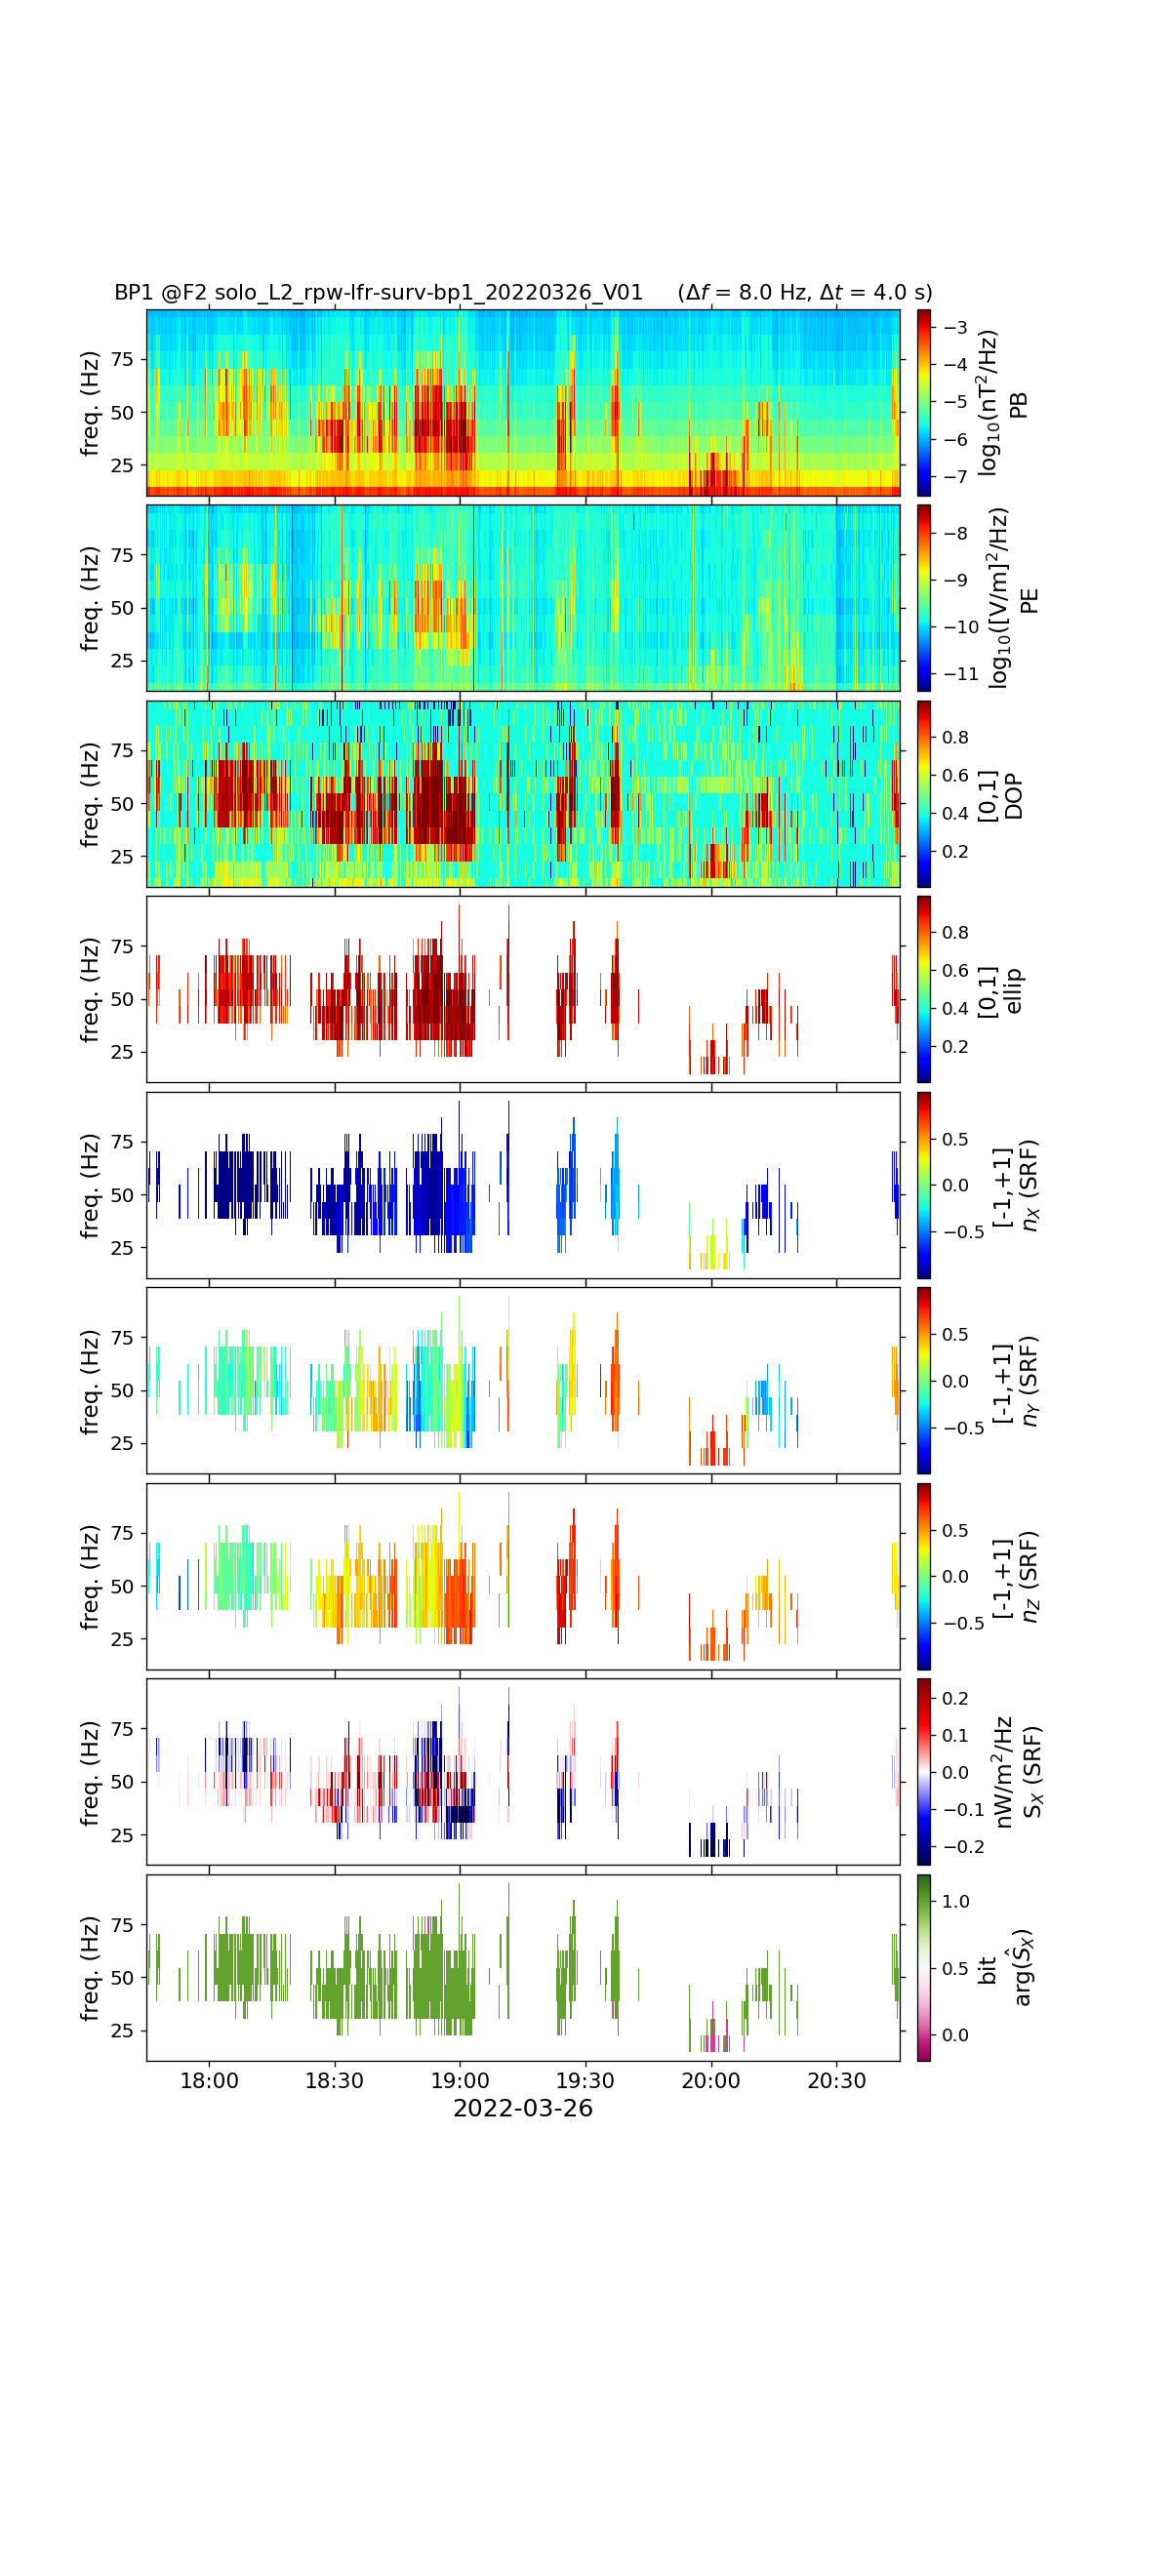

gap insertion here:

gap interval:



In [10]:
datet1 = datetime(2022, 3, 26, 17, 45, 0)
datet2 = datetime(2022, 3, 26, 20, 45, 0)

cmap_list = 7*[plt.cm.jet] + [plt.cm.seismic] + [plt.cm.PiYG]

ampl_rg_N_F0F1F2_BP1 = [[[2e-10, 6e-9],[2e-12/49, 2e-9/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999], [-0.999, 0.999],
                         [-0.5/800*4, 0.5/800*4],[-0.2, 1.2]],                    
                        [[3e-10, 6e-7],[4e-11/49, 2e-8/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999], [-0.999, 0.999],
                         [-0.5/80*4, 0.5/80*4],[-0.2, 1.2]],
                        [[3e-8, 3e-3],[2e-10/49, 2e-6/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999], [-0.999, 0.999], 
                         [-0.5/8*4, 0.5/8*4],[-0.2, 1.2]]]      

#for F in [0,1,2]:
for F in [2]:        
    i1 = index_from_date(datet1, bp1_l2_n_epoch_datetime[F])
    i2 = index_from_date(datet2, bp1_l2_n_epoch_datetime[F])
    sx = slice(i1, i2+1)
    j1 = np.argmin(np.abs(bp1_l2_n_freq[F][:] - 0.))
    #j2 = np.argmin(np.abs(bp1_l2_n_freq[F][:] - 66.))
    j2 = len(bp1_l2_n_freq[F]) - 1
    sy = slice(j1, j2+1)
    #sy = ...
    
    dop = 0.84
    dop_filter = np.heaviside(bp1_l2_n_dop[F][sx,sy]-dop, 1)
    dop_filter[dop_filter == 0] = np.nan
    
    ampl_range = ampl_rg_N_F0F1F2_BP1[F]
    #ampl_range = None
    #date_fmt = '%Y-%m-%d %H:%M:%S'
    date_fmt = '%H:%M'
    #date_fmt = '%H:%M:%S'
    #date_fmt = None   
    fig_spectrograms([bp1_l2_n_pb[F][sx,sy], bp1_l2_n_pe[F][sx,sy], 
                      bp1_l2_n_dop[F][sx,sy], bp1_l2_n_ellip[F][sx,sy]*dop_filter,  
                      bp1_l2_n_nvec[F][sx,sy,0]*dop_filter, 
                      bp1_l2_n_nvec[F][sx,sy,1]*dop_filter, 
                      bp1_l2_n_nvec[F][sx,sy,2]*dop_filter,
                      bp1_l2_n_sx_rea[F][sx,sy]*dop_filter, bp1_l2_n_sx_arg[F][sx,sy]*dop_filter],
                     bp1_l2_n_epoch_datetime[F][sx], bp1_l2_n_freq[F][sy], 
                     cmap=cmap_list, figsize=(10,22), hspace=0.05, cbar_aspect=15, cbar_pad=0.02,                                 
                     fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,
                     ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', dt_i1i2=1, date_fmt=date_fmt,                                                             
                     fname=dir_plots+'/'+bp1_l2_bname+'_BP1_F%s_spectrogram-all-srf'%(F) +  \
                                                      '_corr=%4.2f_dop=%4.2f'%(corr_bp1_l2, dop)+\
                                                      '_i1=%s_i2=%s_j1=%s_j2=%s.png'%(i1, i2, j1, j2),   
                     log=[True, True, False, False, False, False, False, False, False], 
                     psd=[True, True, False, False, False, False, False, False, False], 
                     nop=[False, False, True, True, True, True, True, True, True],
                     units=['nT', '[V/m]', '[0,1]', '[0,1]', '[-1,+1]', '[-1,+1]', '[-1,+1]', 'nW/m$^2$/Hz', 
                            'bit'], 
                     names=['PB', 'PE', 'DOP', 'ellip', 
                            #'n1', 'n2', 'n3', 
                            '$n_X$ (SRF)', '$n_Y$ (SRF)', '$n_Z$ (SRF)',
                            'S$_X$ (SRF)', 'arg($\hat{S}_{\!X}$)'],
                     comment='{} @F{:d} '.format('BP1', F) + bp1_l2_bname, fill_value=None,
                     time_gap=True, gap_echo=True, ampl_range=ampl_range)  

### Zoomed-in spectrogram of L2 Normal BP1 data with $F_{ce}$ lines (5 % and 10%) and $\theta$ angle (n, B0)

<IPython.core.display.Javascript object>


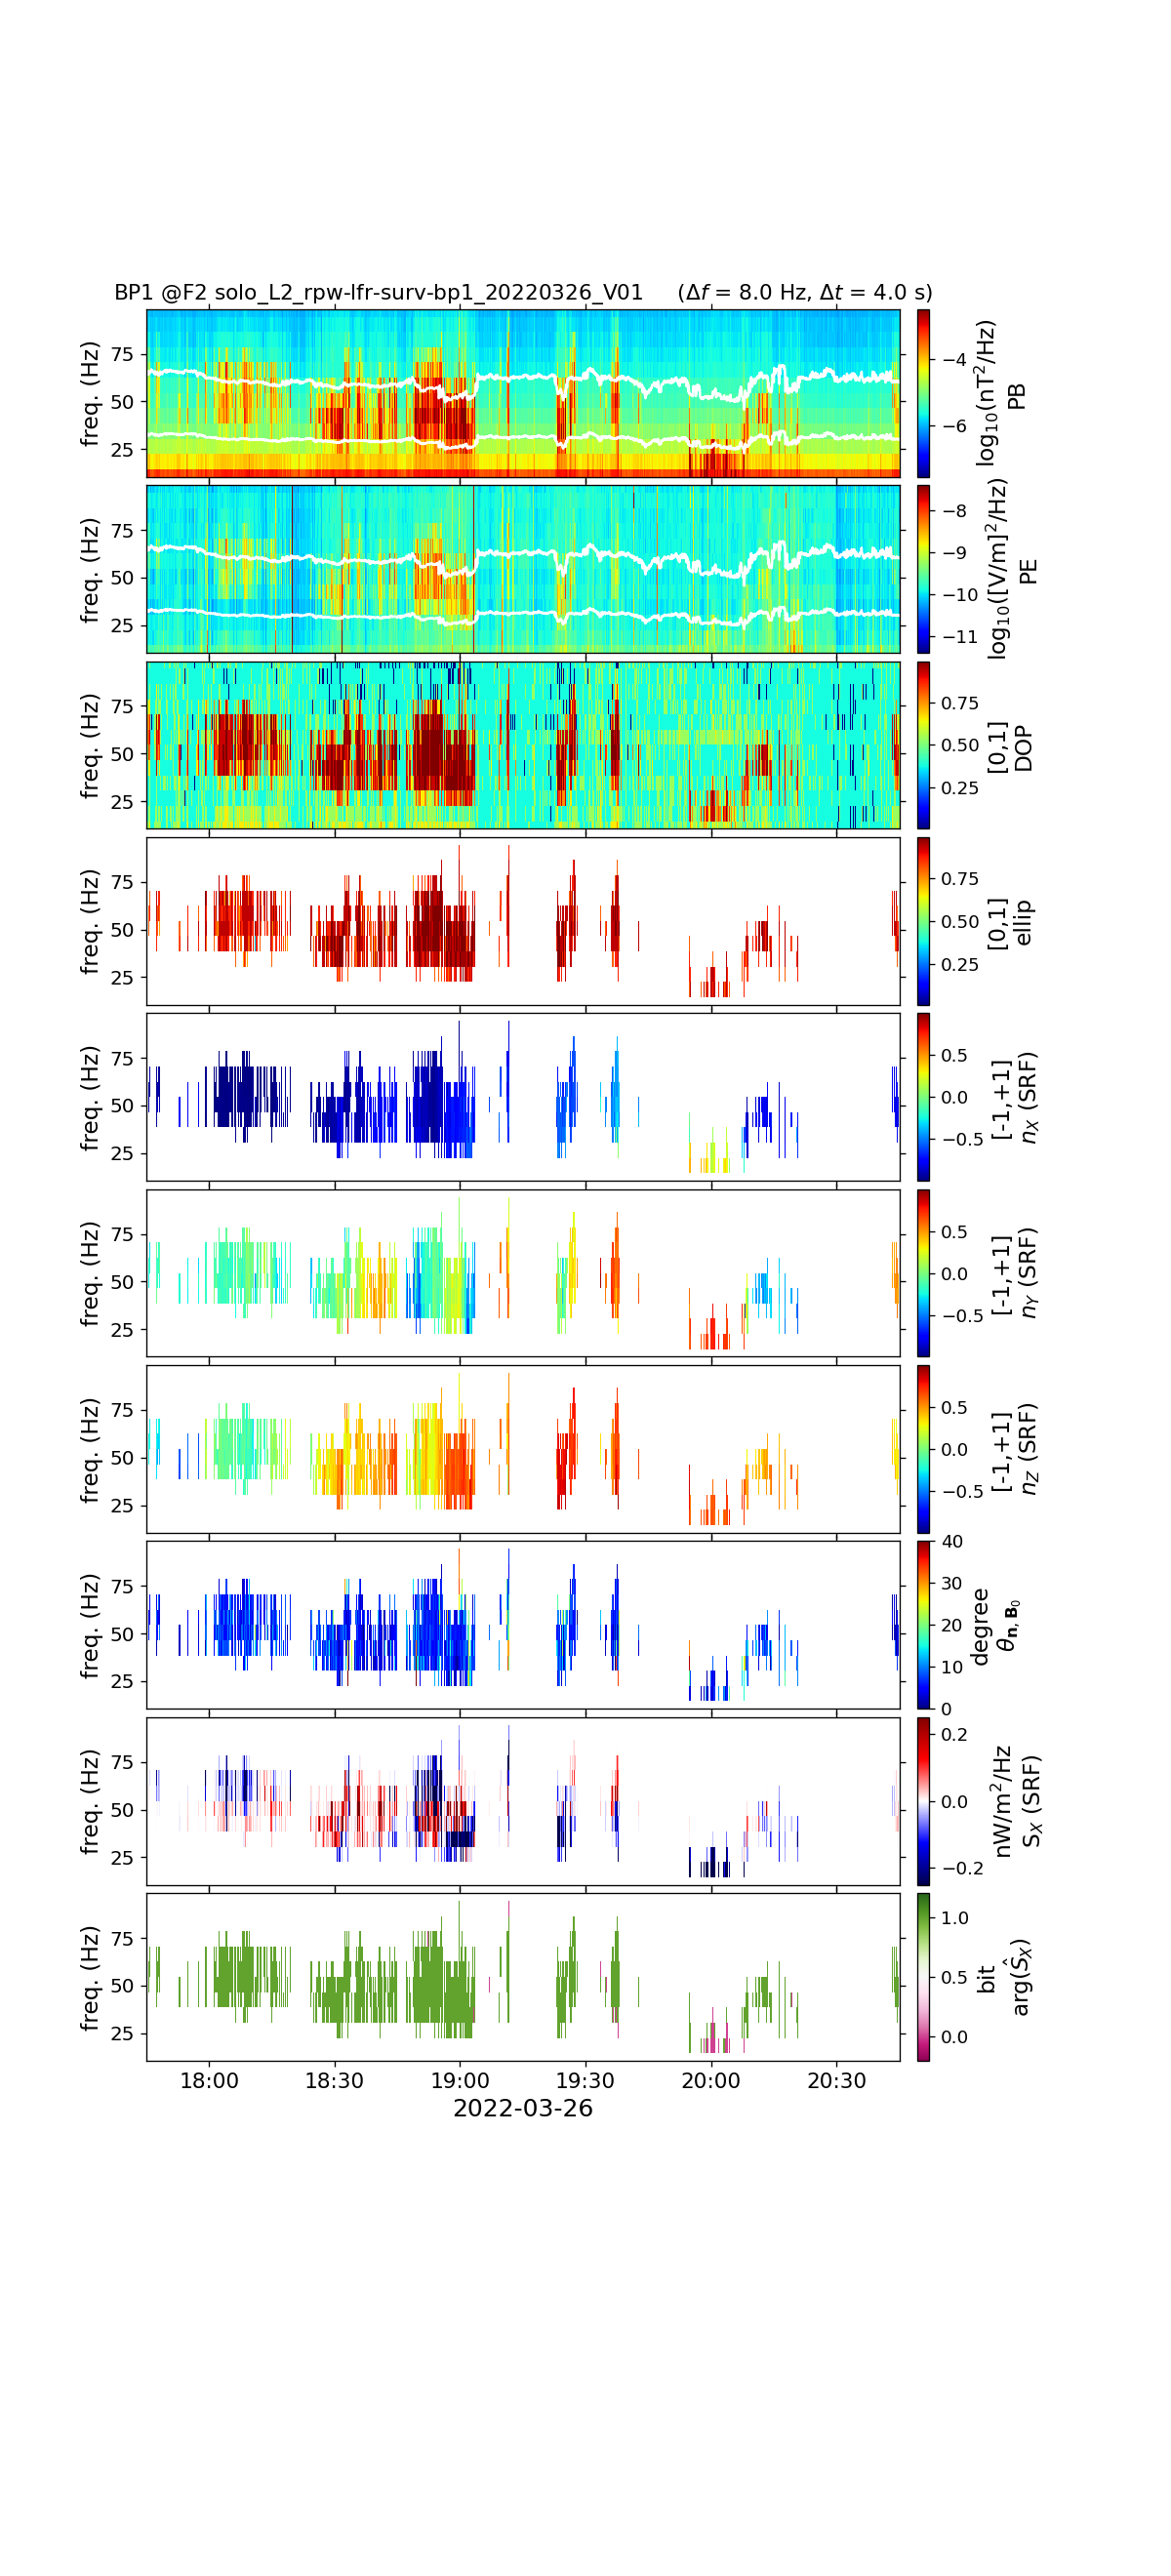

gap insertion here:

gap interval:



In [11]:
# figure with fce lines and angle between wave normal vector n and B0

datet1 = datetime(2022, 3, 26, 17, 45, 0)
datet2 = datetime(2022, 3, 26, 20, 45, 0)

cmap_list = 8*[plt.cm.jet] + [plt.cm.seismic] + [plt.cm.PiYG]

ampl_rg_N_F0F1F2_BP1 = [[[2e-10, 6e-9],[2e-12/49, 2e-9/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999],[-0.999, 0.999],[0,40],
                         [-0.5/800*4, 0.5/800*4],[-0.2, 1.2]],                    
                        [[3e-10, 6e-7],[4e-11/49, 2e-8/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999],[-0.999, 0.999],
                         [0,40],[-0.5/80*4, 0.5/80*4],[-0.2, 1.2]],
                        [[3e-8, 3e-3],[2e-10/49, 2e-6/49],[0.01, 0.99],[0.01, 0.99], 
                         [-0.999, 0.999],[-0.999, 0.999], [-0.999, 0.999], [0, 40], 
                         [-0.5/8*4, 0.5/8*4],[-0.2, 1.2]]]

#for F in [0,1,2]:
for F in [2]:        
    i1 = index_from_date(datet1, bp1_l2_n_epoch_datetime[F])
    i2 = index_from_date(datet2, bp1_l2_n_epoch_datetime[F])
    sx = slice(i1, i2+1)
    j1 = np.argmin(np.abs(bp1_l2_n_freq[F][:] - 0.))
    #j2 = np.argmin(np.abs(bp1_l2_n_freq[F][:] - 66.))
    j2 = len(bp1_l2_n_freq[F]) - 1
    sy = slice(j1, j2+1)
    #sy = ...
    
    bp1_l2_n_fce_datetime = bp1_l2_n_epoch_datetime[F][sx] + timedelta(seconds=2)
    bp1_l2_n_fce_value = Fce_from_B0(bp1_l2_n_fce_datetime, mag_bvec, mag_time)
    bp1_l2_n_nvec_B0_theta = wave_normal_vector_theta(bp1_l2_n_nvec[F][sx, sy, :], 
                                                      bp1_l2_n_fce_datetime, 
                                                      mag_bvec, mag_time, deg=True)   
    
    dop = 0.84
    dop_filter = np.heaviside(bp1_l2_n_dop[F][sx,sy]-dop, 1)
    dop_filter[dop_filter == 0] = np.nan
    
    ampl_range = ampl_rg_N_F0F1F2_BP1[F]
    #ampl_range = None
    #date_fmt = '%Y-%m-%d %H:%M:%S'
    date_fmt = '%H:%M'
    #date_fmt = '%H:%M:%S'
    #date_fmt = None   
    l1, l2 = 0.05, 0.10
    fig_spectrograms([bp1_l2_n_pb[F][sx,sy], bp1_l2_n_pe[F][sx,sy], 
                      bp1_l2_n_dop[F][sx,sy], bp1_l2_n_ellip[F][sx,sy]*dop_filter,  
                      bp1_l2_n_nvec[F][sx,sy,0]*dop_filter, 
                      bp1_l2_n_nvec[F][sx,sy,1]*dop_filter, 
                      bp1_l2_n_nvec[F][sx,sy,2]*dop_filter,
                      bp1_l2_n_nvec_B0_theta*dop_filter,
                      bp1_l2_n_sx_rea[F][sx,sy]*dop_filter, bp1_l2_n_sx_arg[F][sx,sy]*dop_filter],
                     bp1_l2_n_epoch_datetime[F][sx], bp1_l2_n_freq[F][sy], 
                     cmap=cmap_list, figsize=(10,22), hspace=0.05, cbar_aspect=15, cbar_pad=0.02,                                 
                     fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,
                     ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', dt_i1i2=1, date_fmt=date_fmt,                                                             
                     fname=dir_plots+'/'+bp1_l2_bname+'_BP1_F%s_spectrogram-all-srf+theta'%(F) +  \
                                                      '_corr=%4.2f_dop=%4.2f'%(corr_bp1_l2, dop)+\
                                                      '_i1=%s_i2=%s_j1=%s_j2=%s.png'%(i1, i2, j1, j2)+\
                                                       '_l1=%d_l2=%d.png'%(l1*100, l2*100),              
                     log=[True, True, False, False, False, False, False, False, False, False], 
                     psd=[True, True, False, False, False, False, False, False, False, False], 
                     nop=[False, False, True, True, True, True, True, True, True, True],
                     units=['nT', '[V/m]', '[0,1]', '[0,1]', '[-1,+1]', '[-1,+1]', '[-1,+1]', 'degree', 
                            'nW/m$^2$/Hz', 'bit'], 
                     names=['PB', 'PE', 'DOP', 'ellip', 
                            #'n1', 'n2', 'n3', 
                            '$n_X$ (SRF)', '$n_Y$ (SRF)', '$n_Z$ (SRF)',
                             r'$\theta_{\mathbf{n}, \mathbf{B}_0}$', 'S$_X$ (SRF)', 'arg($\hat{S}_{\!X}$)'],
                     comment='{} @F{:d} '.format('BP1', F) + bp1_l2_bname, fill_value=None,
                     time_gap=True, gap_echo=True, ampl_range=ampl_range,
                     rec_wf_list = [{'ipanel': i, 'multi_x': 2*[bp1_l2_n_fce_datetime], 
                                      'multi_y': [l1*bp1_l2_n_fce_value, l2*bp1_l2_n_fce_value],                                    
                                      'multi_color': 2*['white'], 'multi_linestyle': 2*['-'], 
                                      'multi_marker': 2*[''], 'multi_linewidth': 2*[1.5]} for i in range(2)]) 


<a id='l2-surv-bp2-file'></a> 
## L2 Normal BP2 data [start](#start)  [previous](#l2-surv-bp1-file) [next](#l2-surv-swf-file) [end](#end) 

In [12]:
cdffiles=glob.glob(dir_DATA  + '/RPW_L2_SURV_2022' + '/*lfr*surv*bp2_' + day_data + '*')
cdffiles.sort()
for file in cdffiles:
    print(os.path.basename(file))  
    
bp2_l2_cdffile = cdffiles[0]    
bp2_l2_bname = os.path.basename(bp2_l2_cdffile)[:-4]    

solo_L2_rpw-lfr-surv-bp2_20220326_V01.cdf


In [13]:
# for CALBUT version >= 2.0

# L2 SURVEY BP2 data in SRF 
bp2_l2_cdf_srf = load_bp2_CDF_L2(bp2_l2_cdffile, echo=True, params=True, SRF=True,
                                 key_attrs=['Pipeline_version', 'Software_version', 'Parents'], 
                                 #key_field=["BP2_RE_N_F2", "BP2_RE_N_F2_SRF"],
                                 key_field=["N_F2", "N_F1", "N_F0"],
                                 #key_field=None,
                                 key_field_attrs=["BP2_IM_N_F0", "BP2_IM_N_F0_SRF"])
(bp2_l2_n_data_srf, bp2_l2_n_epoch, bp2_l2_n_freq, bp2_l2_n_params, bp2_l2_n_params_bias,
 bp2_l2_b_data_srf, bp2_l2_b_epoch, bp2_l2_b_freq, bp2_l2_b_params, bp2_l2_b_params_bias) = bp2_l2_cdf_srf

bp2_l2_n_epoch_datetime = 3*[None]
for F in [0,1,2]:
    bp2_l2_n_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(bp2_l2_n_epoch[F])
bp2_l2_b_epoch_datetime = 2*[None]
for F in [0,1]:
    bp2_l2_b_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(bp2_l2_b_epoch[F])     
    
# incorparated in CALBUT version >= 2.0    
corr_bp2_l2 = 4 
psd_bp2_l2 = True    

PRINT cdf: 
 BIAS_MODE_BIAS1_ENABLED: CDF_UINT1 [13859]
BIAS_MODE_BIAS2_ENABLED: CDF_UINT1 [13859]
BIAS_MODE_BIAS3_ENABLED: CDF_UINT1 [13859]
BIAS_MODE_HV_ENABLED: CDF_UINT1 [13859]
BIAS_MODE_MUX_SET: CDF_UINT1 [13859]
BIAS_ON_OFF: CDF_UINT1 [13859]
BP2_CNT: CDF_UINT1 [0]
BP2_IM_B_F0: CDF_REAL8 [746, 22, 5, 5]
BP2_IM_B_F0_SRF: CDF_REAL8 [746, 22, 5, 5]
BP2_IM_B_F1: CDF_REAL8 [746, 26, 5, 5]
BP2_IM_B_F1_SRF: CDF_REAL8 [746, 26, 5, 5]
BP2_IM_N_F0: CDF_REAL8 [4123, 11, 5, 5]
BP2_IM_N_F0_SRF: CDF_REAL8 [4123, 11, 5, 5]
BP2_IM_N_F1: CDF_REAL8 [4122, 13, 5, 5]
BP2_IM_N_F1_SRF: CDF_REAL8 [4122, 13, 5, 5]
BP2_IM_N_F2: CDF_REAL8 [4122, 12, 5, 5]
BP2_IM_N_F2_SRF: CDF_REAL8 [4122, 12, 5, 5]
BP2_RE_B_F0: CDF_REAL8 [746, 22, 5, 5]
BP2_RE_B_F0_SRF: CDF_REAL8 [746, 22, 5, 5]
BP2_RE_B_F1: CDF_REAL8 [746, 26, 5, 5]
BP2_RE_B_F1_SRF: CDF_REAL8 [746, 26, 5, 5]
BP2_RE_N_F0: CDF_REAL8 [4123, 11, 5, 5]
BP2_RE_N_F0_SRF: CDF_REAL8 [4123, 11, 5, 5]
BP2_RE_N_F1: CDF_REAL8 [4122, 13, 5, 5]
BP2_RE_N_F1_SRF: CDF_RE

### Full day spectrogram of L2 Normal BP2 data

<IPython.core.display.Javascript object>


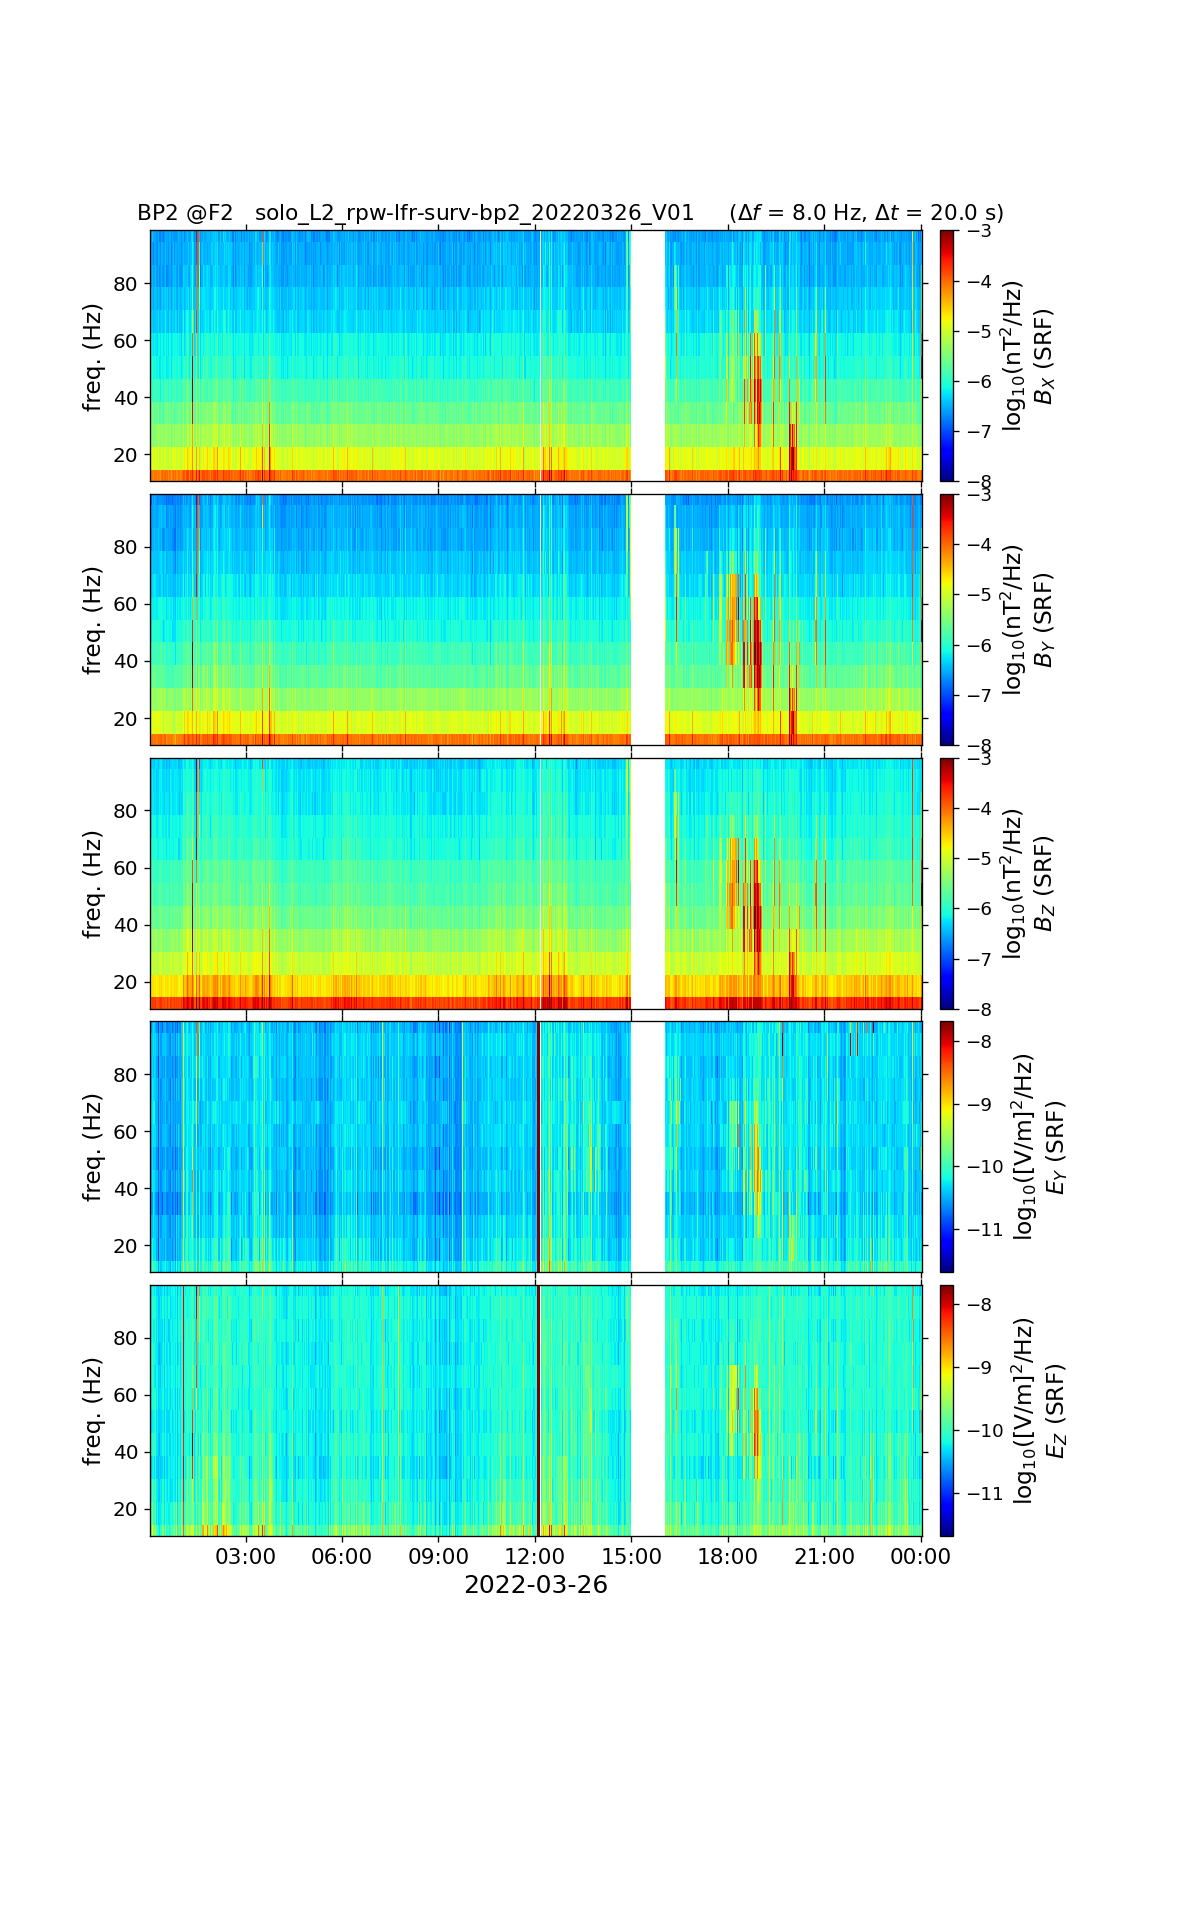

gap insertion here:
2022-03-26 12:02:47.780296
2022-03-26 12:08:50.252863
2022-03-26 14:51:28.210838
2022-03-26 14:59:27.208561

gap interval:
0:00:42.474135
0:03:18.003846
0:00:38.999825
1:02:41.071362



In [14]:
Leff = 7.
ampl_rg_N_F0F1F2_BP2 = [[[6e-11, 2e-9],[6e-11, 2e-9],[6e-11, 2e-9], 
                         [1e-12/Leff**2, 1e-9/Leff**2], [1e-12/Leff**2, 1e-9/Leff**2]],
                        [[1e-10, 2e-7],[1e-10, 2e-7],[1e-10, 2e-7], 
                         [2e-11/Leff**2, 1e-8/Leff**2], [2e-11/Leff**2, 1e-8/Leff**2]],
                        [[1e-8, 1e-3],[1e-8, 1e-3],[1e-8, 1e-3], 
                         [1e-10/Leff**2, 1e-6/Leff**2], [1e-10/Leff**2, 1e-6/Leff**2]]]

#for F in [0,1,2]:
for F in [2]:        
    ampl_range = ampl_rg_N_F0F1F2_BP2[F] 
    #ampl_range = [[4e-8, 8e-4],[4e-8, 8e-4],[4e-8, 8e-4], [2e-10/100, 6e-8/100], [6e-10/100, 6e-8/100]]  
    #ampl_range = None
    #date_fmt = '%Y-%m-%d %H:%M:%S'
    date_fmt = '%H:%M'
    #date_fmt = '%H:%M:%S'
    #date_fmt = None    
    fig_spectrograms([bp2_l2_n_data_srf[F][:,:,0,0].real, bp2_l2_n_data_srf[F][:,:,1,1].real, 
                      bp2_l2_n_data_srf[F][:,:,2,2].real, bp2_l2_n_data_srf[F][:,:,3,3].real, 
                      bp2_l2_n_data_srf[F][:,:,4,4].real],                     
                      bp2_l2_n_epoch_datetime[F][:], bp2_l2_n_freq[F][:], 
                      cmap=plt.cm.jet, figsize=(10,16), hspace=0.05, cbar_aspect=20, cbar_pad=0.02,                                 
                      fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,  
                      ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', date_fmt=date_fmt,
                      fname=dir_plots+'/'+bp2_l2_bname+'_BP2_F%s_spectrogram5-srf_corr=%4.2f.png'%(F, 
                                                        corr_bp2_l2),                                                               
                      log=5*[True], psd=5*[psd_bp2_l2], nop=5*[False], dt_i1i2=1,
                      units=3*['nT']+2*['[V/m]'], 
                      names=['$B_X$ (SRF)', '$B_Y$ (SRF)', '$B_Z$ (SRF)', '$E_Y$ (SRF)', '$E_Z$ (SRF)'],
                      comment='          {} @F{:d}   '.format('BP2', F) + bp2_l2_bname,
                      time_gap=True, gap_echo=True, ampl_range=ampl_range)

### Zoomed-in spectrogram of L2 Normal BP2 data

<IPython.core.display.Javascript object>


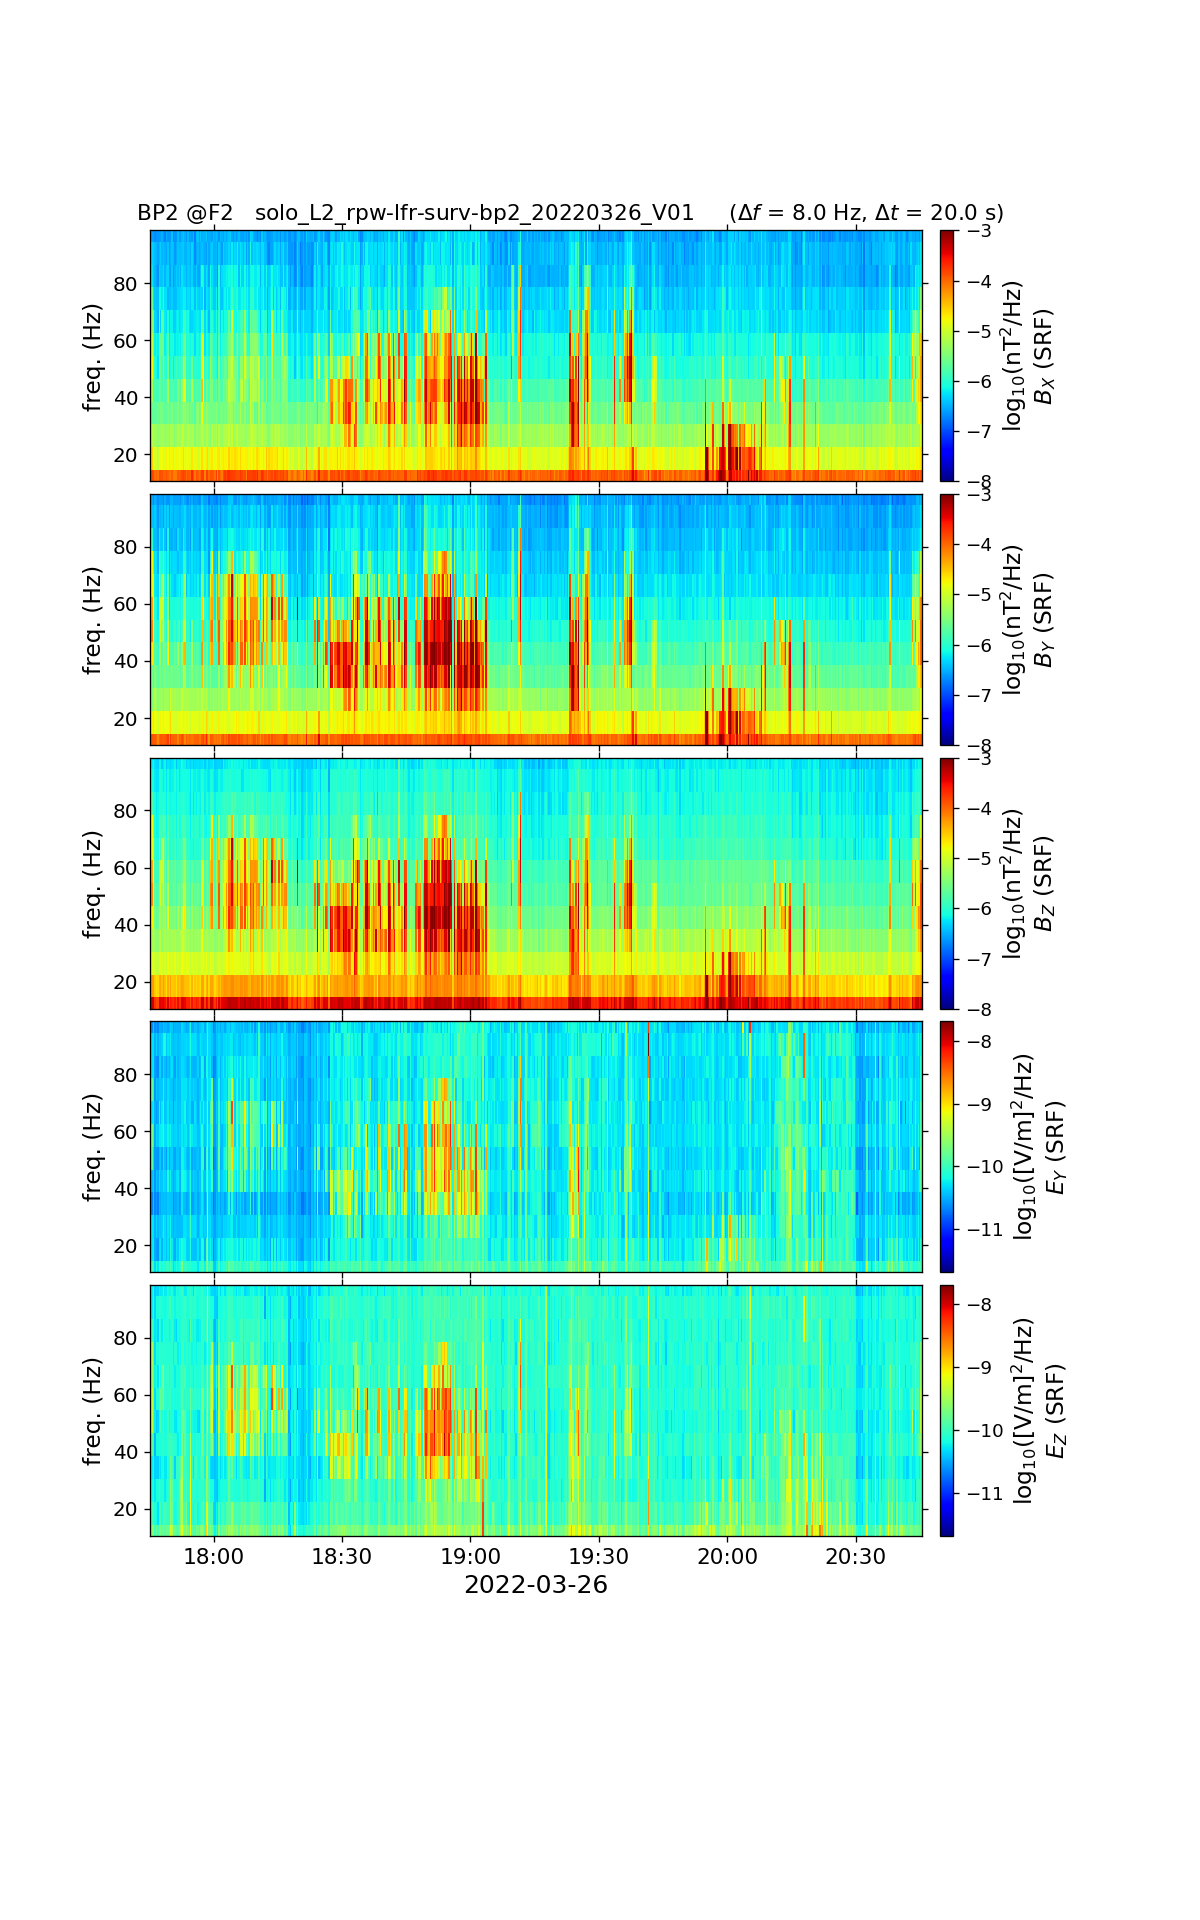

gap insertion here:

gap interval:



In [15]:
datet1 = datetime(2022, 3, 26, 17, 45, 0)
datet2 = datetime(2022, 3, 26, 20, 45, 0)

Leff = 7.
ampl_rg_N_F0F1F2_BP2 = [[[6e-11, 2e-9],[6e-11, 2e-9],[6e-11, 2e-9], 
                         [1e-12/Leff**2, 1e-9/Leff**2], [1e-12/Leff**2, 1e-9/Leff**2]],
                        [[1e-10, 2e-7],[1e-10, 2e-7],[1e-10, 2e-7], 
                         [2e-11/Leff**2, 1e-8/Leff**2], [2e-11/Leff**2, 1e-8/Leff**2]],
                        [[1e-8, 1e-3],[1e-8, 1e-3],[1e-8, 1e-3], 
                         [1e-10/Leff**2, 1e-6/Leff**2], [1e-10/Leff**2, 1e-6/Leff**2]]]

#for F in [0,1,2]:
for F in [2]:        
    i1 = index_from_date(datet1, bp2_l2_n_epoch_datetime[F])
    i2 = index_from_date(datet2, bp2_l2_n_epoch_datetime[F])
    sx = slice(i1, i2+1)
    j1 = np.argmin(np.abs(bp2_l2_n_freq[F][:] - 0.))
    #j2 = np.argmin(np.abs(bp2_l2_n_freq[F][:] - 66.))
    j2 = len(bp2_l2_n_freq[F]) - 1
    sy = slice(j1, j2+1)
    #sy = ...
    
    ampl_range = ampl_rg_N_F0F1F2_BP2[F]    
    #ampl_range = [[4e-8, 8e-4],[4e-8, 8e-4],[4e-8, 8e-4], [2e-10/100, 6e-8/100], [6e-10/100, 6e-8/100]]  
    #ampl_range = None
    #date_fmt = '%Y-%m-%d %H:%M:%S'
    date_fmt = '%H:%M'
    #date_fmt = '%H:%M:%S'
    #date_fmt = None    
    fig_spectrograms([bp2_l2_n_data_srf[F][sx,sy,0,0].real, bp2_l2_n_data_srf[F][sx,sy,1,1].real, 
                      bp2_l2_n_data_srf[F][sx,sy,2,2].real, bp2_l2_n_data_srf[F][sx,sy,3,3].real, 
                      bp2_l2_n_data_srf[F][sx,sy,4,4].real],                     
                      bp2_l2_n_epoch_datetime[F][sx], bp2_l2_n_freq[F][sy], 
                      cmap=plt.cm.jet, figsize=(10,16), hspace=0.05, cbar_aspect=20, cbar_pad=0.02,                                 
                      fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,  
                      ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', date_fmt=date_fmt,
                      fname=dir_plots+'/'+bp2_l2_bname+'_BP2_F%s_spectrogram5-srf_corr=%4.2f'%(F, 
                                                        corr_bp2_l2)+\
                                                       '_i1=%s_i2=%s_j1=%s_j2=%s.png'%(i1, i2, j1, j2),                                                               
                      log=5*[True], psd=5*[psd_bp2_l2], nop=5*[False],
                      units=3*['nT']+2*['[V/m]'], 
                      names=['$B_X$ (SRF)', '$B_Y$ (SRF)', '$B_Z$ (SRF)', '$E_Y$ (SRF)', '$E_Z$ (SRF)'],
                      comment='          {} @F{:d}   '.format('BP2', F) + bp2_l2_bname,
                      time_gap=True, gap_echo=True, ampl_range=ampl_range)

### Zoomed-in spectrogram of L2 Normal BP2 data  with  $F_{ce}$ lines (5 % and 10%)

<IPython.core.display.Javascript object>


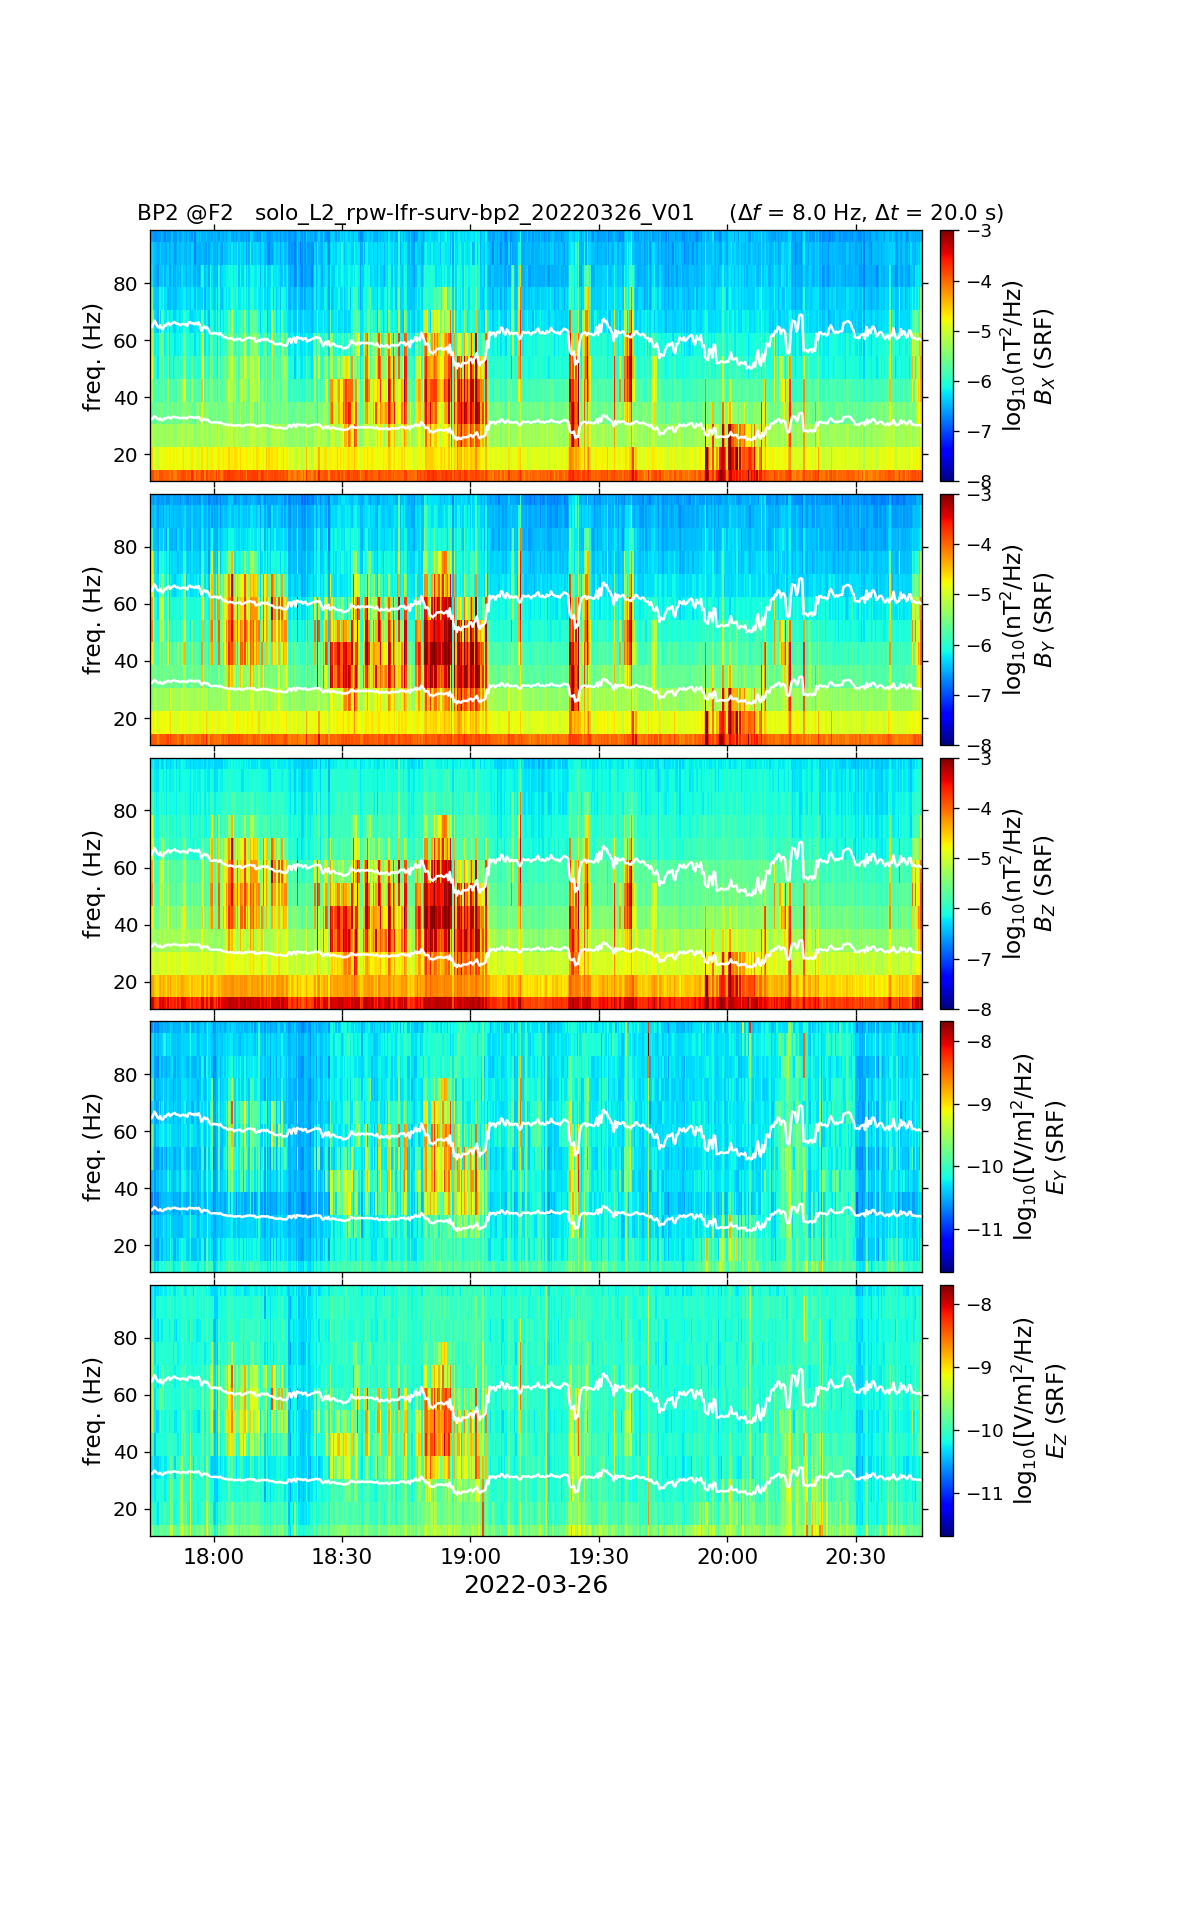

gap insertion here:

gap interval:



In [16]:
# figure with fce lines

datet1 = datetime(2022, 3, 26, 17, 45, 0)
datet2 = datetime(2022, 3, 26, 20, 45, 0)

Leff = 7.
ampl_rg_N_F0F1F2_BP2 = [[[6e-11, 2e-9],[6e-11, 2e-9],[6e-11, 2e-9], 
                         [1e-12/Leff**2, 1e-9/Leff**2], [1e-12/Leff**2, 1e-9/Leff**2]],
                        [[1e-10, 2e-7],[1e-10, 2e-7],[1e-10, 2e-7], 
                         [2e-11/Leff**2, 1e-8/Leff**2], [2e-11/Leff**2, 1e-8/Leff**2]],
                        [[1e-8, 1e-3],[1e-8, 1e-3],[1e-8, 1e-3], 
                         [1e-10/Leff**2, 1e-6/Leff**2], [1e-10/Leff**2, 1e-6/Leff**2]]]

#for F in [0,1,2]:
for F in [2]:        
    i1 = index_from_date(datet1, bp2_l2_n_epoch_datetime[F])
    i2 = index_from_date(datet2, bp2_l2_n_epoch_datetime[F])
    sx = slice(i1, i2+1)
    j1 = np.argmin(np.abs(bp2_l2_n_freq[F][:] - 0.))
    #j2 = np.argmin(np.abs(bp2_l2_n_freq[F][:] - 66.))
    j2 = len(bp2_l2_n_freq[F]) - 1
    sy = slice(j1, j2+1)
    #sy = ...
    
    bp2_l2_n_fce_datetime = bp2_l2_n_epoch_datetime[F][sx] + timedelta(seconds=2)
    bp2_l2_n_fce_value = Fce_from_B0(bp2_l2_n_fce_datetime, mag_bvec, mag_time)

    ampl_range = ampl_rg_N_F0F1F2_BP2[F]    
    #ampl_range = [[4e-8, 8e-4],[4e-8, 8e-4],[4e-8, 8e-4], [2e-10/100, 6e-8/100], [6e-10/100, 6e-8/100]]  
    #ampl_range = None
    #date_fmt = '%Y-%m-%d %H:%M:%S'
    date_fmt = '%H:%M'
    #date_fmt = '%H:%M:%S'
    #date_fmt = None    
    l1, l2 = 0.05, 0.10
    fig_spectrograms([bp2_l2_n_data_srf[F][sx,sy,0,0].real, bp2_l2_n_data_srf[F][sx,sy,1,1].real, 
                      bp2_l2_n_data_srf[F][sx,sy,2,2].real, bp2_l2_n_data_srf[F][sx,sy,3,3].real, 
                      bp2_l2_n_data_srf[F][sx,sy,4,4].real],                     
                      bp2_l2_n_epoch_datetime[F][sx], bp2_l2_n_freq[F][sy], 
                      cmap=plt.cm.jet, figsize=(10,16), hspace=0.05, cbar_aspect=20, cbar_pad=0.02,                                 
                      fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,  
                      ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', date_fmt=date_fmt,
                      fname=dir_plots+'/'+bp2_l2_bname+'_BP2_F%s_spectrogram5-srf_corr=%4.2f'%(F, 
                                                        corr_bp2_l2)+\
                                                       '_i1=%s_i2=%s_j1=%s_j2=%s.png'%(i1, i2, j1, j2) +\
                                                       '_l1=%d_l2=%d.png'%(l1*100, l2*100),                                                                        
                      log=5*[True], psd=5*[psd_bp2_l2], nop=5*[False],
                      units=3*['nT']+2*['[V/m]'], 
                      names=['$B_X$ (SRF)', '$B_Y$ (SRF)', '$B_Z$ (SRF)', '$E_Y$ (SRF)', '$E_Z$ (SRF)'],
                      comment='          {} @F{:d}   '.format('BP2', F) + bp2_l2_bname,
                      time_gap=True, gap_echo=True, ampl_range=ampl_range,
                      rec_wf_list = [{'ipanel': i, 'multi_x': 2*[bp2_l2_n_fce_datetime], 
                                      'multi_y': [l1*bp2_l2_n_fce_value, l2*bp2_l2_n_fce_value],                                    
                                      'multi_color': 2*['white'], 'multi_linestyle': 2*['-'], 
                                      'multi_marker': 2*[''], 'multi_linewidth': 2*[1.5]} for i in range(5)]) 


### Zoomed-in "BP1" spectrogram of L2 Normal BP2 data with  $F_{ce}$ lines (5 % and 10%)  and $\theta$ angle (n, B0)

In [17]:
# computation of the "BP1" wave parameters from the BP2
bp1_l2_data_from_bp2_l2_n_data_srf = 3*[None]
   
# sx = 4 (<EyBz*> - <EzBy*>) / mu0 / 2  
# in (nW/m^2)/Hz because (V/m * nT / mu0)
# factor 4 because corr_cwf_l2=4 only (see Chust et al., A&A, 2021)
coeff_sx = 4 * 1e7/4/np.pi / 2 
# vphi = ( ny <EzBx*> - nz <EyBx*> ) /  <BxBx*>
# in km/s because V/m / T / 1e3
coeff_vphi = 1e9 / 1e3

#for F in [2, 1]:
for F in [2]:  
    bp1_l2_data_from_bp2_l2_n_data_srf[F] = \
            sm_3b2e_bp1(bp2_l2_n_data_srf[F][..., 0:5, 0:5],  
                        k44_pe=1.,  k55_pe=1., k45_pe=0.,           
                        k14_sx=0.,  k15_sx=0., k24_sx=0., k25_sx=-1.*coeff_sx, k34_sx=1.*coeff_sx, k35_sx=0.,                          
                        k14_ny=0.,  k15_ny=1.*coeff_vphi, k24_ny=0., k25_ny=0.,  k34_ny=0., k35_ny=0.,                          
                        k14_nz=-1.*coeff_vphi, k15_nz=0., k24_nz=0., k25_nz=0.,  k34_nz=0., k35_nz=0., 
                        M_SOprime_SCM = np.diagflat([1,1,1]), M_tilde_SOprime=np.diagflat([1,1,1]),                                                                                                                                                   
                        echo=True, ok_dop_e=False)

Shape of the spectral matrix structure (BP2 or ASM_ave) from which the basic parameters BP1 will be computed :
nspec: 4122, nfreq: 12, dim: 5


<IPython.core.display.Javascript object>


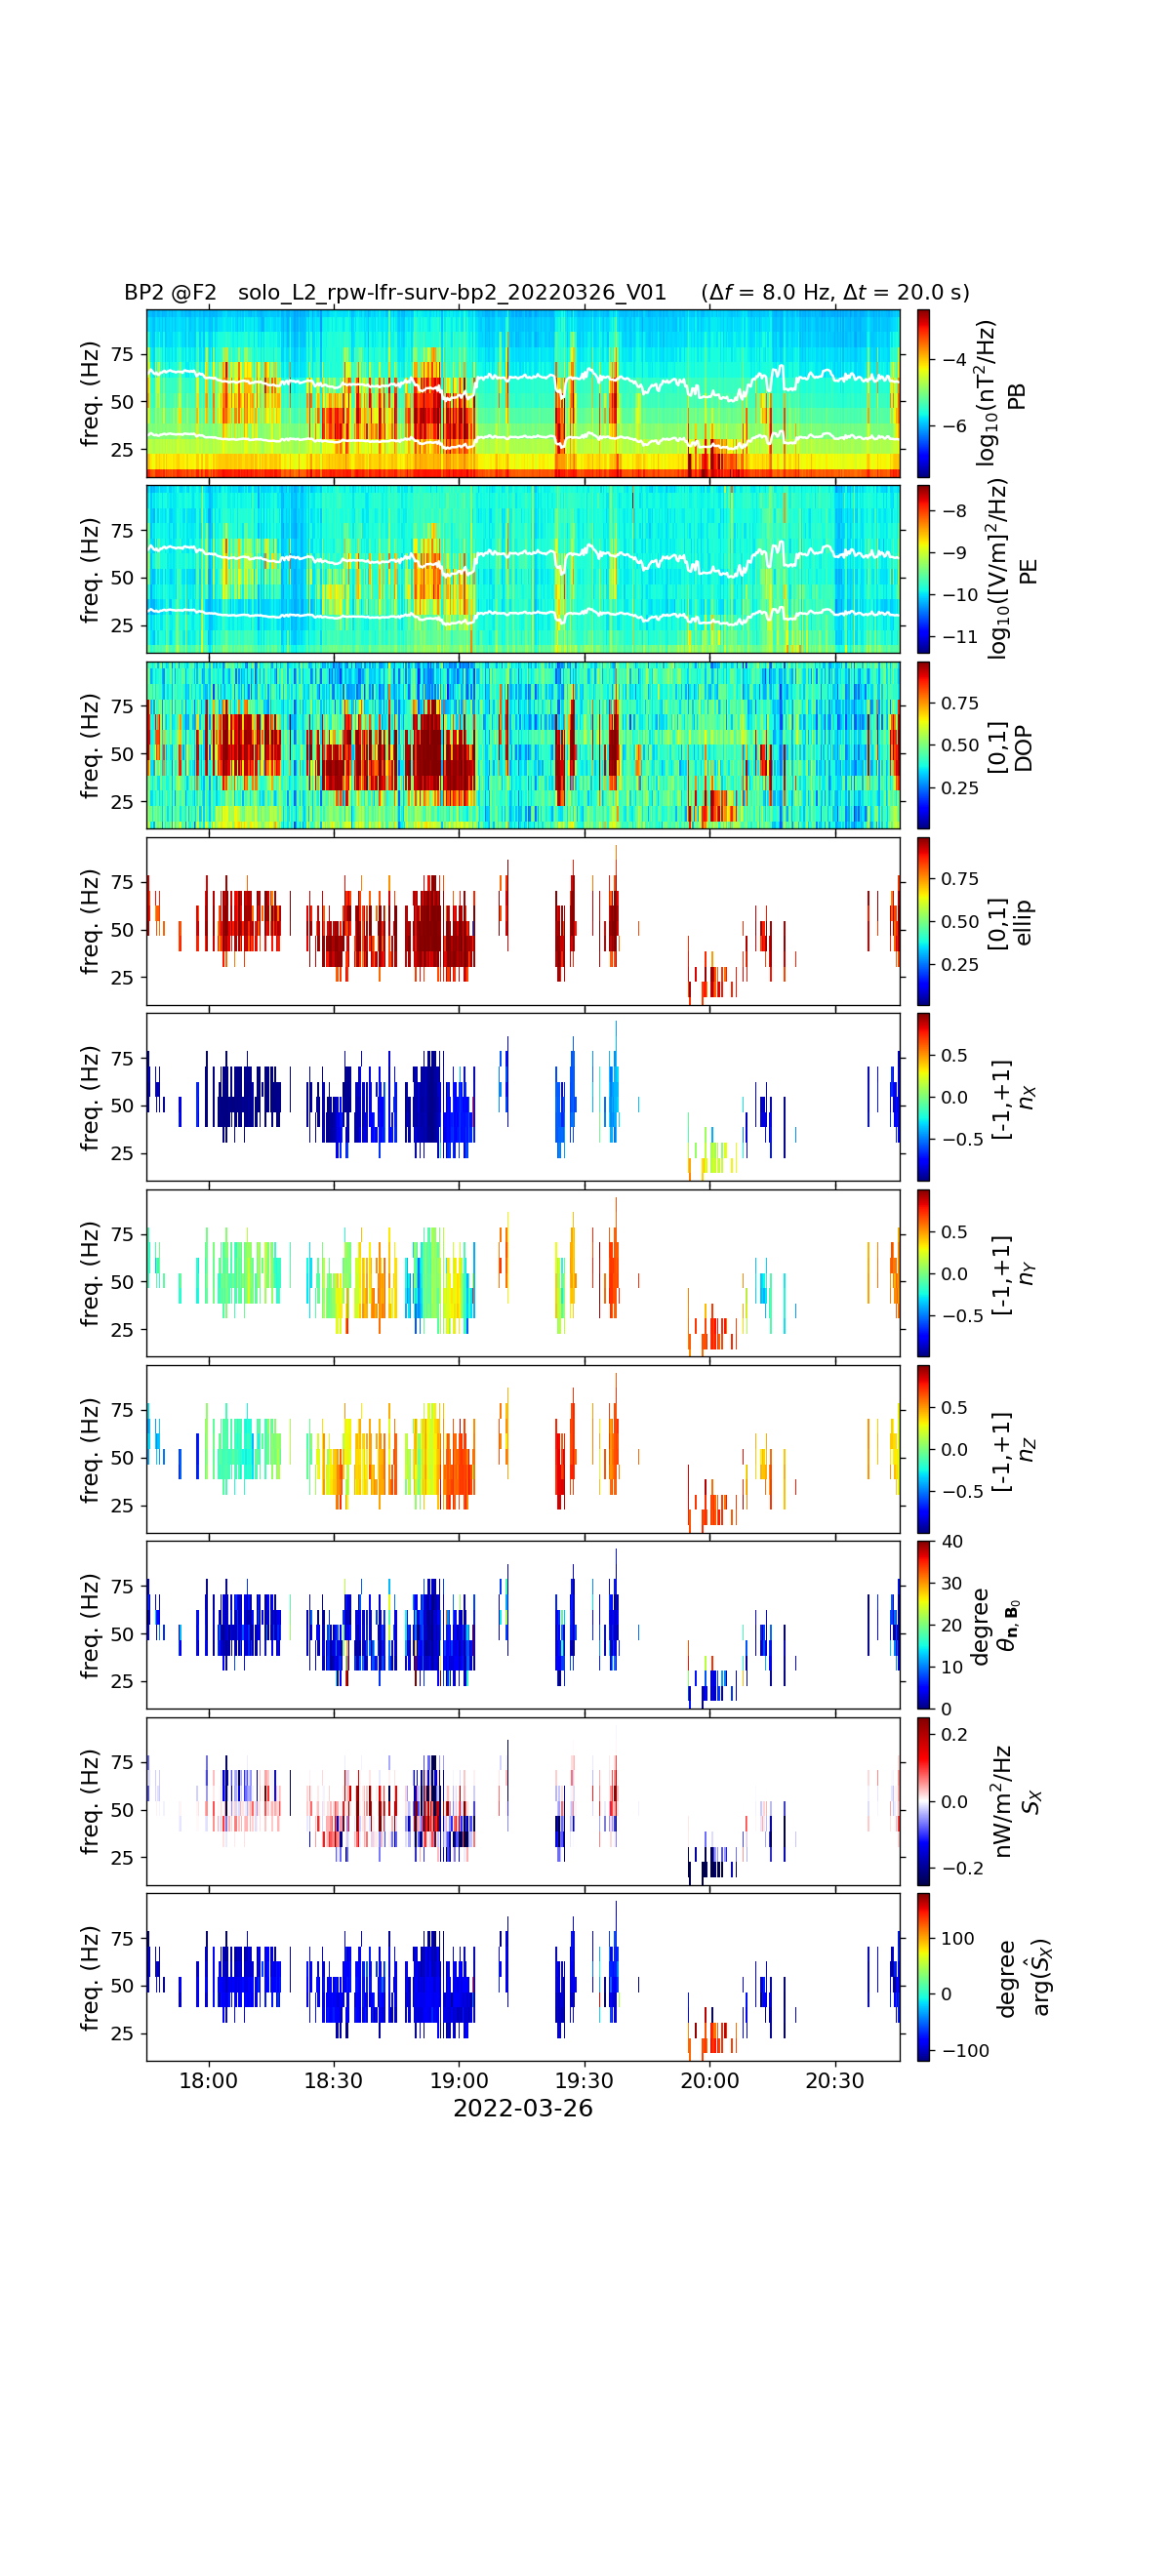

In [18]:
# figure with fce lines and angle between wave normal vector n and B0

datet1 = datetime(2022, 3, 26, 17, 45, 0)
datet2 = datetime(2022, 3, 26, 20, 45, 0)

#for F in [0,1,2]:
for F in [2]:    
    i1 = index_from_date(datet1, bp2_l2_n_epoch_datetime[F])
    i2 = index_from_date(datet2, bp2_l2_n_epoch_datetime[F])
    sx = slice(i1, i2+1)
    j1 = np.argmin(np.abs(bp2_l2_n_freq[F][:] - 0.))
    #j2 = np.argmin(np.abs(bp2_l2_n_freq[F][:] - 66.))
    j2 = len(bp2_l2_n_freq[F]) - 1
    sy = slice(j1, j2+1)
    #sy = ...    

    ampl_range = [[3e-8, 3e-3],[2e-10/49, 2e-6/49],                 
                  [0.01, 0.99],   [0.01, 0.99], 
                  [-0.999, 0.999], [-0.999, 0.999], [-0.999, 0.999], [0, 40], 
                  [-0.5/8*4, 0.5/8*4], [-120, +180]]

    cmap_list = 8*[plt.cm.jet] + 2*[plt.cm.seismic, plt.cm.jet]

    dop = 0.8
    dop_filter = np.heaviside(bp1_l2_data_from_bp2_l2_n_data_srf[F]['degree_polar_3b'][sx,sy]-dop, 1)
    dop_filter[dop_filter == 0] = np.nan
    
    bp2_l2_n_fce_datetime = bp2_l2_n_epoch_datetime[F][sx] + timedelta(seconds=2)
    bp2_l2_n_fce_value = Fce_from_B0(bp2_l2_n_fce_datetime, mag_bvec, mag_time)
    bp2_l2_n_nvec_B0_theta = \
                wave_normal_vector_theta(bp1_l2_data_from_bp2_l2_n_data_srf[F]['nvec_bp1'][sx,sy,:],
                                         bp2_l2_n_fce_datetime, mag_bvec, mag_time, deg=True)   

    #date_fmt = None
    date_fmt = '%H:%M'    
    l1, l2 = 0.05, 0.10    
    fig_spectrograms([bp1_l2_data_from_bp2_l2_n_data_srf[F]['psd_b_bp1'][sx,sy],
                      bp1_l2_data_from_bp2_l2_n_data_srf[F]['psd_e_bp1'][sx,sy],
                      bp1_l2_data_from_bp2_l2_n_data_srf[F]['degree_polar_3b'][sx,sy],                  
                      bp1_l2_data_from_bp2_l2_n_data_srf[F]['ellip_bp1'][sx,sy]*dop_filter,
                      bp1_l2_data_from_bp2_l2_n_data_srf[F]['nvec_bp1'][sx,sy,0]*dop_filter,
                      bp1_l2_data_from_bp2_l2_n_data_srf[F]['nvec_bp1'][sx,sy,1]*dop_filter,
                      bp1_l2_data_from_bp2_l2_n_data_srf[F]['nvec_bp1'][sx,sy,2]*dop_filter,
                      bp2_l2_n_nvec_B0_theta*dop_filter,
                      bp1_l2_data_from_bp2_l2_n_data_srf[F]['sx_bp1'][sx,sy]*dop_filter,                 
                      np.angle(bp1_l2_data_from_bp2_l2_n_data_srf[F]['sx'][sx,sy], deg=True)*dop_filter],
                      bp2_l2_n_epoch_datetime[F][sx], bp2_l2_n_freq[F][sy], 
                      cmap=cmap_list, figsize=(10,22), hspace=0.05, cbar_aspect=15, cbar_pad=0.02,                                 
                      fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,                                           
                      fname=dir_plots+'/'+bp2_l2_bname+'_BP2_F%s_spectrogram-bp1-srf+theta'%(F) + \
                                                      '_corr=%4.2f_dop=%4.2f'%(corr_bp2_l2, dop) + \
                                                      '_i1=%s_i2=%s_j1=%s_j2=%s'%(i1, i2, j1, j2) + \
                                                       '_l1=%d_l2=%d.png'%(l1*100, l2*100),           
                      ampl_range=ampl_range,  ylabel='freq. (Hz)',                  
                      log=2*[True]+8*[False], psd=2*[psd_bp2_l2]+8*[False], 
                      nop=2*[False]+8*[True], logy=10*[False],
                      units=['nT', '[V/m]', '[0,1]', '[0,1]',
                             '[-1,+1]', '[-1,+1]', '[-1,+1]', 'degree',
                             'nW/m$^2$/Hz', 'degree'], 
                      names=['PB', 'PE', 'DOP', 'ellip', 
                             '$n_X$', '$n_Y$', '$n_Z$',  
                             r'$\theta_{\mathbf{n}, \mathbf{B}_0}$',
                             '$S_X$', 'arg($\hat{S}_{\!X}$)'],
                      comment='{} @F{:d}   '.format('       BP2', F) + bp2_l2_bname,
                      time_gap=False, gap_echo=True, date_fmt= date_fmt,
                      xlabel=True, xtl_rot=0., xtl_ha='center',
                      rec_wf_list = [{'ipanel': i, 'multi_x': 2*[bp2_l2_n_fce_datetime], 
                                      'multi_y': [l1*bp2_l2_n_fce_value, l2*bp2_l2_n_fce_value],                                    
                                      'multi_color': 2*['white'], 'multi_linestyle': 2*['-'], 
                                      'multi_marker': 2*[''], 'multi_linewidth': 2*[1.5]} for i in range(2)])  

<a id='l2-surv-swf-file'></a> 
## L2 Normal SWF data [start](#start) [previous](#l2-surv-bp2-file) [next](#l2-surv-cwf-file) [end](#end) 

In [19]:
cdffiles=glob.glob(dir_DATA + '/RPW_L2_SURV_2022' + '/*lfr*surv*swf*' + day_data + '*')
cdffiles.sort()
for file in cdffiles:
    print(os.path.basename(file))  
    
swf_b_l2_cdffile = cdffiles[0]    
swf_b_l2_bname = os.path.basename(swf_b_l2_cdffile)[:-4]
swf_e_l2_cdffile = cdffiles[1]    
swf_e_l2_bname = os.path.basename(swf_e_l2_cdffile)[:-4]

solo_L2_rpw-lfr-surv-swf-b_20220326_V01.cdf
solo_L2_rpw-lfr-surv-swf-e_20220326_V01.cdf


In [20]:
# load magnetic field data

swf_b_l2_cdf = load_swf_b_CDF_L2(swf_b_l2_cdffile, echo=True, reshape=True, 
                                 key_attrs=['Pipeline_version', 'Software_version'], 
                                 #key_field=['MAG_LABEL', 'MAG_LABEL_RTN', 'SAMPLING_RATE', 'SURVEY_MODE',
                                 #           'QUALITY_FLAG', 'L2_QUALITY_BITMASK', 'QUALITY_BITMASK'],
                                 key_field_attrs=['B', 'L2_QUALITY_BITMASK', 'QUALITY_BITMASK'],
                                 L2_QUALITY_BITMASK=True)
(swf_l2_B_UARF, swf_b_l2_epoch, swf_l2_field_dict) = swf_b_l2_cdf

swf_datetime = False
if swf_datetime:
    swf_b_l2_epoch_datetime = 3*[None]
    for F in [0,1,2]:
        swf_b_l2_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(swf_b_l2_epoch[F])
    
# filter out the magnetic data polluted by the current of the SCM heater
swf_l2_B_QBM = swf_l2_field_dict['L2_QUALITY_BITMASK']
swf_l2_B_UARF_good = 3*[None]
for F in [0, 1, 2]:
    swf_l2_B_UARF_good[F] = filter_scm_swf_QBM(swf_l2_B_UARF[F], swf_l2_B_QBM[F], value=np.nan)
    
# transform to SRF    
swf_l2_B_SRF = 3*[None]
swf_l2_B_SRF_good = 3*[None] 
for F in range(3):
    swf_l2_B_SRF[F] = transform_from_UARF_to_SRF(swf_l2_B_UARF[F])    
    swf_l2_B_SRF_good[F] = transform_from_UARF_to_SRF(swf_l2_B_UARF_good[F])

PRINT cdf: 
 B: CDF_REAL4 [822, 3, 2048]
B_RTN: CDF_REAL4 [822, 3, 2048]
CALIBRATION_TABLE_INDEX: CDF_UINT1 [822, 2, 2]
Epoch: CDF_TIME_TT2000 [822]
L2_QUALITY_BITMASK: CDF_UINT2 [822]
MAG_LABEL: CDF_CHAR*2 [3] NRV
MAG_LABEL_RTN: CDF_CHAR*5 [3] NRV
QUALITY_BITMASK: CDF_UINT2 [822]
QUALITY_FLAG: CDF_UINT1 [822]
SAMPLING_RATE: CDF_REAL4 [822]
SURVEY_MODE: CDF_UINT1 [822] 


 cdf['B'].attrs: CATDESC: Magnetic field values (Bx, By, Bz) [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic field [CDF_CHAR]
FILLVAL: -1e+31 [CDF_REAL4]
FORMAT: F8.4 [CDF_CHAR]
LABL_PTR_1: MAG_LABEL [CDF_CHAR]
SCALEMAX: 5.6132708 [CDF_FLOAT]
SCALEMIN: -4.5570655 [CDF_FLOAT]
SCALETYP: linear [CDF_CHAR]
UNITS: nT [CDF_CHAR]
VALIDMAX: 1e+30 [CDF_REAL4]
VALIDMIN: -1e+30 [CDF_REAL4]
VAR_NOTES: 3 entries array with magnetic field values (B3x, B1y, B2z) [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]

 cdf['L2_QUALITY_BITMASK'].attrs: CATDESC: Bitmask flag [CDF_CHAR]
DEPEND_0: Epoch [CDF_C

In [21]:
# load electric field data

swf_e_l2_cdf = load_swf_e_CDF_L2(swf_e_l2_cdffile, echo=True, reshape=True, #fill_value=-9.9e30,
                                 key_attrs=['Pipeline_version', 'Software_version'], 
                                 key_field=['VDC_LABEL', 'EDC_LABEL', 'EAC_LABEL'])       
(swf_l2_V_DC, swf_l2_E_DC, swf_l2_E_AC, swf_e_l2_epoch) = swf_e_l2_cdf

print()
# V12 and V23 (merging of DC and AC data)
swf_l2_E = meld_swf_E_bias_L2(swf_l2_E_DC, swf_l2_E_AC, fill_value=-9.99e30)
# V1
swf_l2_V = [swf_l2_V_DC[F][:, 0:1] for F in range(3)]
if np.all([(swf_e_l2_epoch[F] == swf_b_l2_epoch[F]).all() for F in range(3)]):
    swf_l2_epoch = swf_b_l2_epoch
    try:
        swf_l2_epoch_datetime = swf_b_l2_epoch_datetime
    except NameError:
        print("no swf datetime computed")
    if 'cdag' in swf_e_l2_bname:        
        swf_l2_bname = swf_e_l2_bname.replace('swf-e','swf-e+b') + '+' + swf_b_l2_bname[-2:]
    else:  
        swf_l2_bname = swf_e_l2_bname.replace('swf-e','swf-e+b') 
    print(swf_l2_bname)
else:
    print("swf_e_l2_epoch IS DIFFERENT FROM swf_b_l2_epoch !!?")
    
# transform to SRF        
swf_l2_EYZ_SRF = 3*[None]
swf_l2_EX_SRF = 3*[None]    
for F in [0, 1, 2]:
    nsnap = swf_l2_E[F].shape[0] // 2048    
    print("nsnap F%d: %d"%(F, nsnap))        
    alphaY = 1.3    
    a2y = -7 * alphaY     
    alphaZ = 1.3     
    a1z = -7 * alphaZ
    swf_l2_EYZ_SRF[F] = transform_from_ANT_to_SRF_bis(swf_l2_E[F], A2Y=a2y,  A1Z=a1z)

PRINT cdf: 
 BW: CDF_UINT1 [822]
DELTA_PLUS_MINUS: CDF_INT8 [822, 2048]
EAC: CDF_FLOAT [822, 2048, 3]
EAC_LABEL: CDF_UCHAR*5 [3] NRV
EDC: CDF_FLOAT [822, 2048, 3]
EDC_LABEL: CDF_UCHAR*5 [3] NRV
Epoch: CDF_TIME_TT2000 [822]
IBIAS1: CDF_FLOAT [822]
IBIAS2: CDF_FLOAT [822]
IBIAS3: CDF_FLOAT [822]
L2_QUALITY_BITMASK: CDF_UINT2 [822]
QUALITY_BITMASK: CDF_UINT2 [822]
QUALITY_FLAG: CDF_UINT1 [822]
SAMPLING_RATE: CDF_FLOAT [822]
SYNCHRO_FLAG: CDF_UINT1 [822]
VDC: CDF_FLOAT [822, 2048, 3]
VDC_LABEL: CDF_UCHAR*4 [3] NRV 

VDC_LABEL: ['Vdc1' 'Vdc2' 'Vdc3']
EDC_LABEL: ['Edc12' 'Edc13' 'Edc23']
EAC_LABEL: ['Eac12' 'Eac13' 'Eac23']

Pipeline_version:  
Software_version: 6.0.0

swf_time_epoch F0: (274, 2048)
swf_V_DC       F0: (274, 2048, 3)
swf_E_DC       F0: (274, 2048, 3)
swf_E_AC       F0: (274, 2048, 3)
swf_time_epoch F0: (561152,)
swf_V_DC       F0: (561152, 3)
swf_E_DC       F0: (561152, 3)
swf_E_AC       F0: (561152, 3)

swf_time_epoch F1: (274, 2048)
swf_V_DC       F1: (274, 2048, 3)
swf_E_D

In [22]:
# good

# computation of the PSD from the SWF
sm_l2_swf_data2E_SRF_good = 3*[None]
sm_l2_swf_epoch2E_SRF_good = 3*[None]
sm_l2_swf_epoch_datetime2E_SRF_good = 3*[None]
sm_l2_swf_freq2E_SRF_good = 3*[None]

psd_swf_l2 = True
corr_swf_l2 = 4.
na_swf_l2_list = [4, 4, 8]
nw_swf_l2_list = [int(2048/na) for na in na_swf_l2_list] 

#for F in [0,1,2]:
for F in [2]:    
    na_swf_l2 = na_swf_l2_list[F] 
    nw_swf_l2 = nw_swf_l2_list[F]
    print('F = %d'%(F))        
    (sm_l2_swf_data2E_SRF_good[F], sm_l2_swf_epoch2E_SRF_good[F], sm_l2_swf_freq2E_SRF_good[F]) = \
            sm_from_swf(swf_l2_B_SRF_good[F], swf_l2_EYZ_SRF[F], swf_l2_V[F], swf_l2_epoch[F], F=F, 
                        nw=nw_swf_l2, na=na_swf_l2, echo=True, win='hanning_idl', unit='count^2/Hz', 
                        background=False, DC=False)
    sm_l2_swf_epoch_datetime2E_SRF_good[F] = pycdf.lib.v_tt2000_to_datetime(sm_l2_swf_epoch2E_SRF_good[F])    

F = 2
window: hanning_idl
rm_dc : True
norm  : 2.00
Compute time-averaged spectral matrices
INPUT
 data: array(561152, 6)
 nw: 256
 na: 8
 nsa: 256
 nsc: 2048
OUPUT
 asm: array(274, 129, 6, 6)
 time_asm: array(274, 3)


In [23]:
# good

# computation of the "BP1" wave parameters from the SWF
bp1_l2_data_from_swf_l2_data2E_SRF_good = 3*[None]

# sx = 4 (<EyBz*> - <EzBy*>) / mu0 / 2  
# in (nW/m^2)/Hz because (V/m * nT / mu0)
# factor 4 because corr_cwf_l2=4 only (just positive frequencies and 
# correction for the windowing bias effect, see Chust et al., A&A, 2021)
coeff_sx = 4 * 1e7/4/np.pi / 2 
# vphi = ( ny <EzBx*> - nz <EyBx*> ) /  <BxBx*>
# in km/s because V/m / T / 1e3
coeff_vphi = 1e9 / 1e3

#for F in [2, 1]:
for F in [2]:  
    bp1_l2_data_from_swf_l2_data2E_SRF_good[F] = \
               sm_3b2e_bp1(sm_l2_swf_data2E_SRF_good[F][..., 0:5, 0:5],  
                           k44_pe=1.,  k55_pe=1., k45_pe=0.,           
                           k14_sx=0.,  k15_sx=0., k24_sx=0., k25_sx=-1.*coeff_sx, k34_sx=1.*coeff_sx, k35_sx=0.,                          
                           k14_ny=0.,  k15_ny=1.*coeff_vphi, k24_ny=0., k25_ny=0.,  k34_ny=0., k35_ny=0.,                          
                           k14_nz=-1.*coeff_vphi, k15_nz=0., k24_nz=0., k25_nz=0.,  k34_nz=0., k35_nz=0., 
                           M_SOprime_SCM = np.diagflat([1,1,1]), M_tilde_SOprime=np.diagflat([1,1,1]),                                                                                                                                                   
                           echo=True, ok_dop_e=False)

Shape of the spectral matrix structure (BP2 or ASM_ave) from which the basic parameters BP1 will be computed :
nspec: 274, nfreq: 127, dim: 5


/WIN/Users/chust/DD CHUST/Missions/Solar Orbiter/LFR/Python/Solar Orbiter/RPW_LFR_data_tutorial_20220916_Belfast/lib_lfr/bp_routines.py:404: RuntimeWarning: invalid value encountered in true_divide
  wave_nvector_3b[..., 0]= +offdiagonal_im[2, ...] / ab  # n1
/WIN/Users/chust/DD CHUST/Missions/Solar Orbiter/LFR/Python/Solar Orbiter/RPW_LFR_data_tutorial_20220916_Belfast/lib_lfr/bp_routines.py:405: RuntimeWarning: invalid value encountered in true_divide
  wave_nvector_3b[..., 1]= -offdiagonal_im[1, ...] / ab  # n2
/WIN/Users/chust/DD CHUST/Missions/Solar Orbiter/LFR/Python/Solar Orbiter/RPW_LFR_data_tutorial_20220916_Belfast/lib_lfr/bp_routines.py:406: RuntimeWarning: invalid value encountered in true_divide
  wave_nvector_3b[..., 2]= +offdiagonal_im[0, ...] / ab  # n3
/WIN/Users/chust/DD CHUST/Missions/Solar Orbiter/LFR/Python/Solar Orbiter/RPW_LFR_data_tutorial_20220916_Belfast/lib_lfr/bp_routines.py:439: RuntimeWarning: invalid value encountered in true_divide
  vphi[:, i] = ( ny[:,

### Full day PSD spectrogram of L2 Normal SWF data

<IPython.core.display.Javascript object>


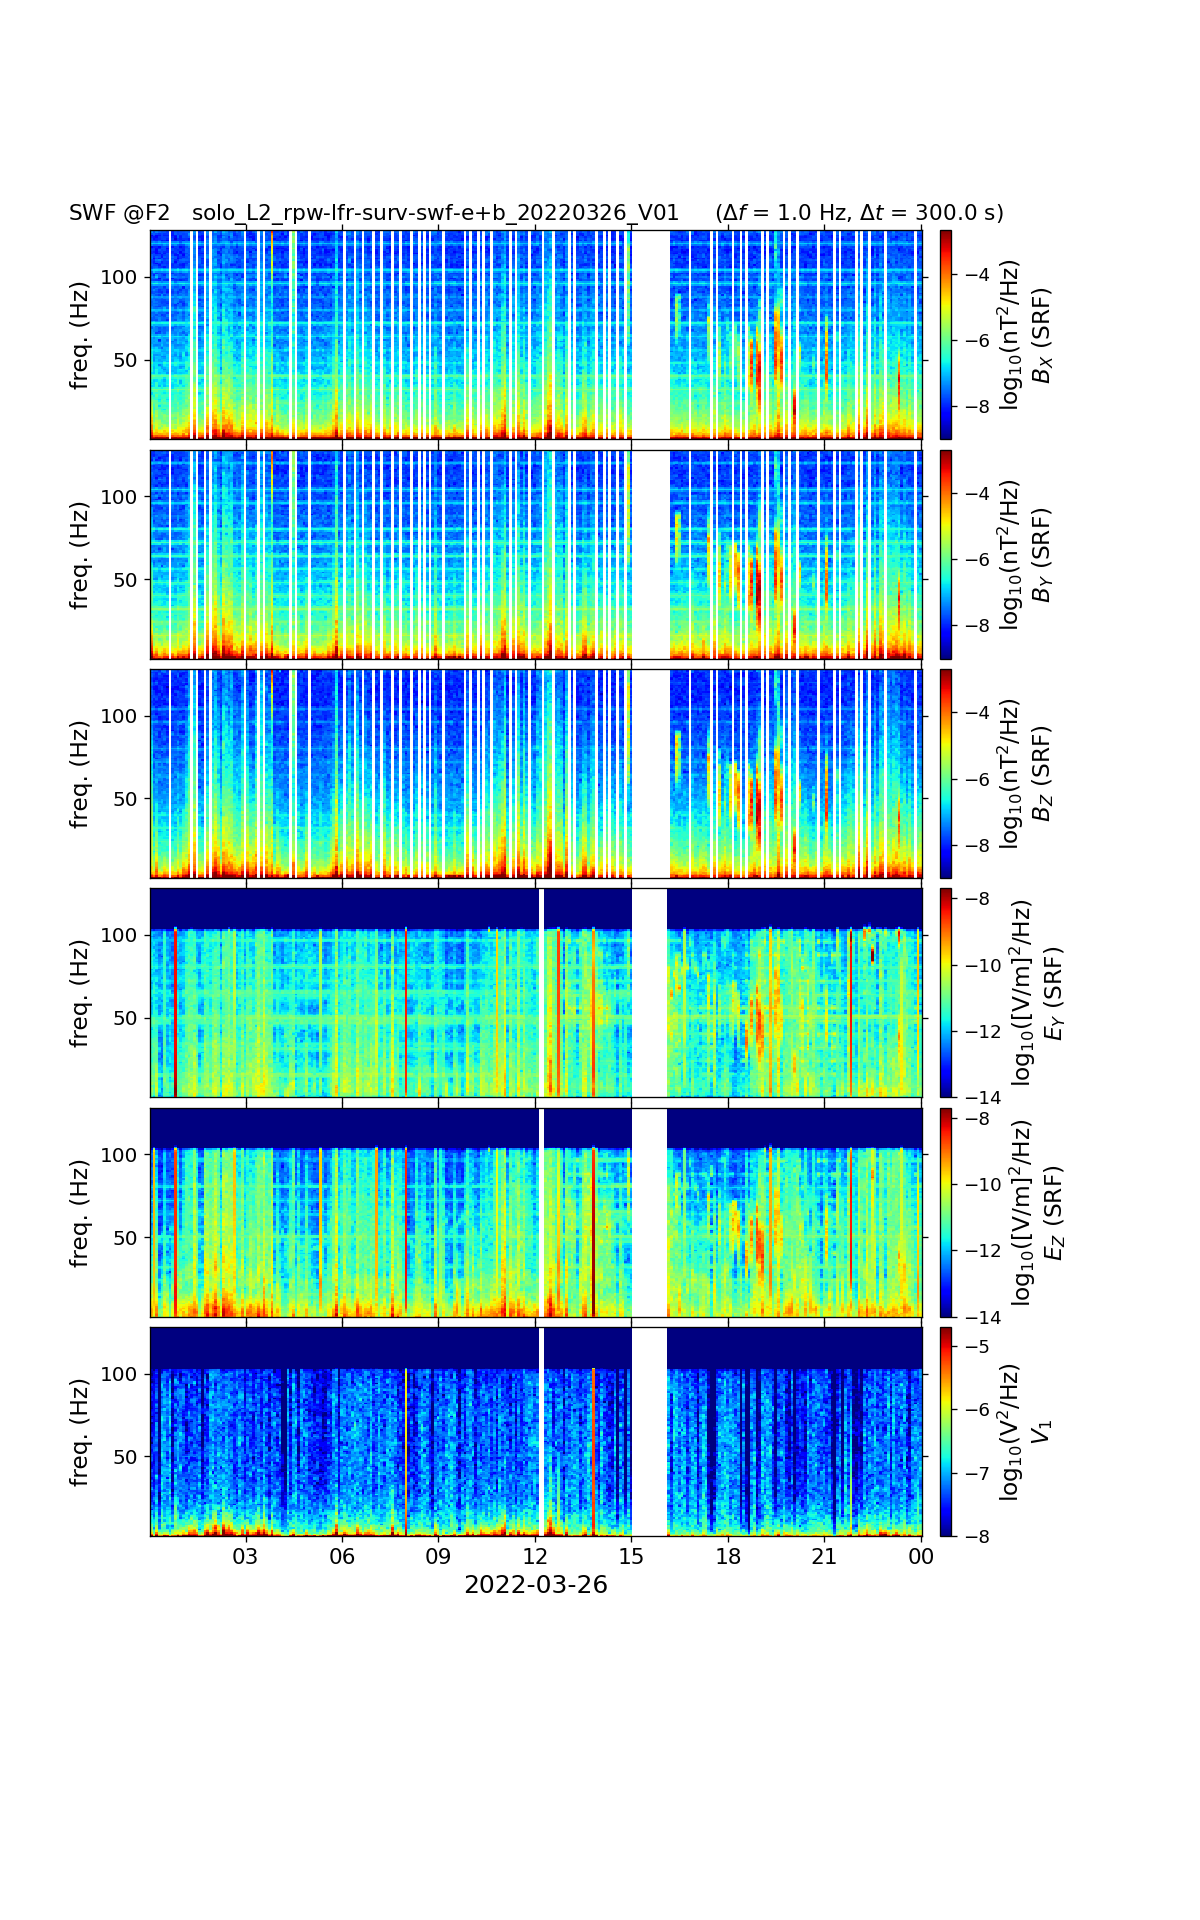

gap insertion here:
2022-03-26 12:01:48.249382
2022-03-26 12:08:10.253112
2022-03-26 14:56:48.267940

gap interval:
0:06:22.003730
0:08:38.002263
1:10:00.010619



/WIN/Users/chust/DD CHUST/Missions/Solar Orbiter/LFR/Python/Solar Orbiter/RPW_LFR_data_tutorial_20220916_Belfast/lib_plot/spectral_routines.py:207: RuntimeWarning: divide by zero encountered in log10
  z = np.log10(spectrogram_list2[i]) if log[i] else spectrogram_list2[i]


In [24]:
# good

ampl_rg_F0F1F2_SWF = [[[1e-11, 1e-8], [1e-11, 1e-8], [1e-11, 1e-8], [1e-13, 2e-10], [1e-13, 2e-10], [1e-9, 2e-7]],
                      [[1e-11, 1e-6], [1e-11, 1e-6], [1e-11, 1e-6], [1e-13, 2e-8], [1e-13, 2e-8], [1e-9, 2e-6]],
                      [[1e-9, 2e-3], [1e-9, 2e-3], [1e-9, 2e-3], [1e-12/100, 2e-6/100], [1e-12/100, 2e-6/100], 
                       [1e-8, 2e-5]]]

#for F in [0,1,2]:
for F in [2]:            
    ampl_range = ampl_rg_F0F1F2_SWF[F]
    #ampl_range = None
    
    date_fmt = None
    fig_spectrograms([sm_l2_swf_data2E_SRF_good[F][:,:,0,0].real, sm_l2_swf_data2E_SRF_good[F][:,:,1,1].real, 
                      sm_l2_swf_data2E_SRF_good[F][:,:,2,2].real,
                      sm_l2_swf_data2E_SRF_good[F][:,:,3,3].real, sm_l2_swf_data2E_SRF_good[F][:,:,4,4].real, 
                      sm_l2_swf_data2E_SRF_good[F][:,:,5,5].real],                     
                      sm_l2_swf_epoch_datetime2E_SRF_good[F], sm_l2_swf_freq2E_SRF_good[F], 
                      cmap=plt.cm.jet, figsize=(10,16), hspace=0.05, cbar_aspect=20, cbar_pad=0.02,                                 
                      fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,  
                      ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', date_fmt=date_fmt,
                      fname=dir_plots+'/'+swf_l2_bname+'_SWF_F%s_spectrogram6-srf-good_corr=%4.2f_na=%d_nw=%d.png'%(F, 
                                                                          corr_swf_l2, na_swf_l2, nw_swf_l2),
                      log=6*[True], psd=6*[psd_swf_l2], nop=6*[False], units=3*['nT']+2*['[V/m]']+['V'], 
                      names=['$B_X$ (SRF)', '$B_Y$ (SRF)', '$B_Z$ (SRF)', '$E_Y$ (SRF)', 
                             '$E_Z$ (SRF)', '$V_1$'],
                      comment='{} @F{:d}   '.format('SWF', F) + swf_l2_bname, df_fmt='.1f',
                      time_gap=True, gap_echo=True, ampl_range=ampl_range)          

### Zoomed-in PSD spectrogram of L2 Normal SWF data

<IPython.core.display.Javascript object>


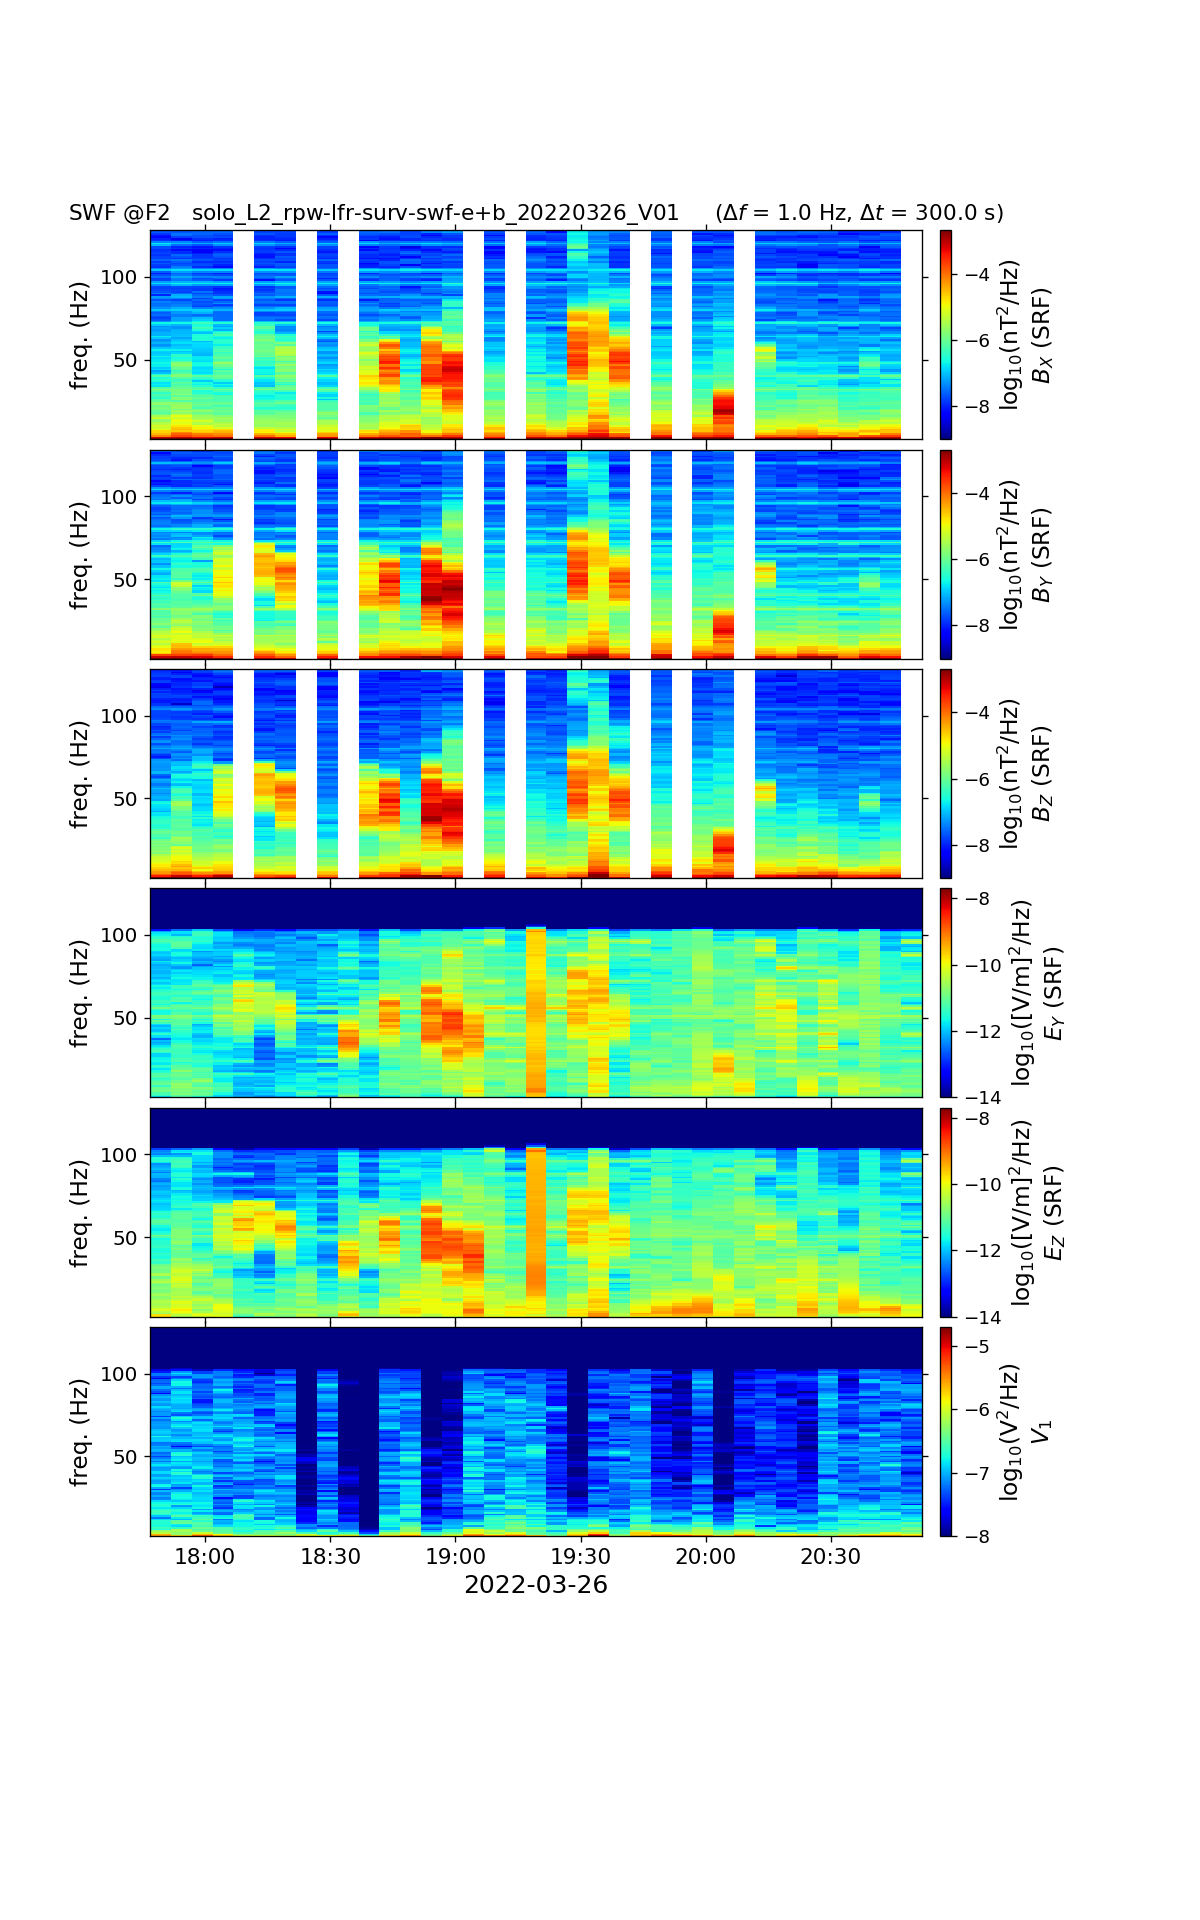

gap insertion here:

gap interval:



In [25]:
# good

datet1 = datetime(2022, 3, 26, 17, 45, 0)
datet2 = datetime(2022, 3, 26, 20, 45, 0)

ampl_rg_F0F1F2_SWF = [[[1e-11, 1e-8], [1e-11, 1e-8], [1e-11, 1e-8], [1e-13, 2e-10], [1e-13, 2e-10], [1e-9, 2e-7]],
                      [[1e-11, 1e-6], [1e-11, 1e-6], [1e-11, 1e-6], [1e-13, 2e-8], [1e-13, 2e-8], [1e-9, 2e-6]],
                      [[1e-9, 2e-3], [1e-9, 2e-3], [1e-9, 2e-3], [1e-12/100, 2e-6/100], [1e-12/100, 2e-6/100], 
                       [1e-8, 2e-5]]]

#for F in [0,1,2]:
for F in [2]:    
    i1 = index_from_date(datet1, sm_l2_swf_epoch_datetime2E_SRF_good[F])
    i2 = index_from_date(datet2, sm_l2_swf_epoch_datetime2E_SRF_good[F])
    sx = slice(i1, i2+1)    
    j1 = np.argmin(np.abs(sm_l2_swf_freq2E_SRF_good[F][:] - 0.))
    #j2 = np.argmin(np.abs(sm_l2_swf_freq2E_SRF_good[F][:] - 66.))
    j2 = len(sm_l2_swf_freq2E_SRF_good[F]) - 1
    #sy = ...
    sy = slice(j1, j2+1)
         
    ampl_range = ampl_rg_F0F1F2_SWF[F]
    #ampl_range = None
    #date_fmt = '%Y-%m-%d %H:%M:%S'  
    #date_fmt = '%H:%M'
    date_fmt = None
    fig_spectrograms([sm_l2_swf_data2E_SRF_good[F][sx,sy,0,0].real, sm_l2_swf_data2E_SRF_good[F][sx,sy,1,1].real, 
                      sm_l2_swf_data2E_SRF_good[F][sx,sy,2,2].real,
                      sm_l2_swf_data2E_SRF_good[F][sx,sy,3,3].real, sm_l2_swf_data2E_SRF_good[F][sx,sy,4,4].real, 
                      sm_l2_swf_data2E_SRF_good[F][sx,sy,5,5].real],                     
                      sm_l2_swf_epoch_datetime2E_SRF_good[F][sx], sm_l2_swf_freq2E_SRF_good[F][sy], 
                      cmap=plt.cm.jet, figsize=(10,16), hspace=0.05, cbar_aspect=20, cbar_pad=0.02,                                 
                      fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,  
                      ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', date_fmt=date_fmt,
                      fname=dir_plots+'/'+swf_l2_bname+'_SWF_F%s_spectrogram6-srf-good_corr=%4.2f_na=%d_nw=%d'%(F, 
                                                                          corr_swf_l2, na_swf_l2, nw_swf_l2)+\
                                                    '_i1=%s_i2=%s_j1=%s_j2=%s.png'%(i1, i2, j1, j2),   
                      log=6*[True], psd=6*[psd_swf_l2], nop=6*[False], units=3*['nT']+2*['[V/m]']+['V'], 
                      names=['$B_X$ (SRF)', '$B_Y$ (SRF)', '$B_Z$ (SRF)', '$E_Y$ (SRF)', 
                             '$E_Z$ (SRF)', '$V_1$'],
                      comment='{} @F{:d}   '.format('SWF', F) + swf_l2_bname, df_fmt='.1f',
                      time_gap=True, gap_echo=True, ampl_range=ampl_range)         

### Zoomed-in "BP1" spectrogram of L2 Normal SWF data with $F_{ce}$ lines (5 % and 10%)  and $\theta$ angle (n, B0)

<IPython.core.display.Javascript object>


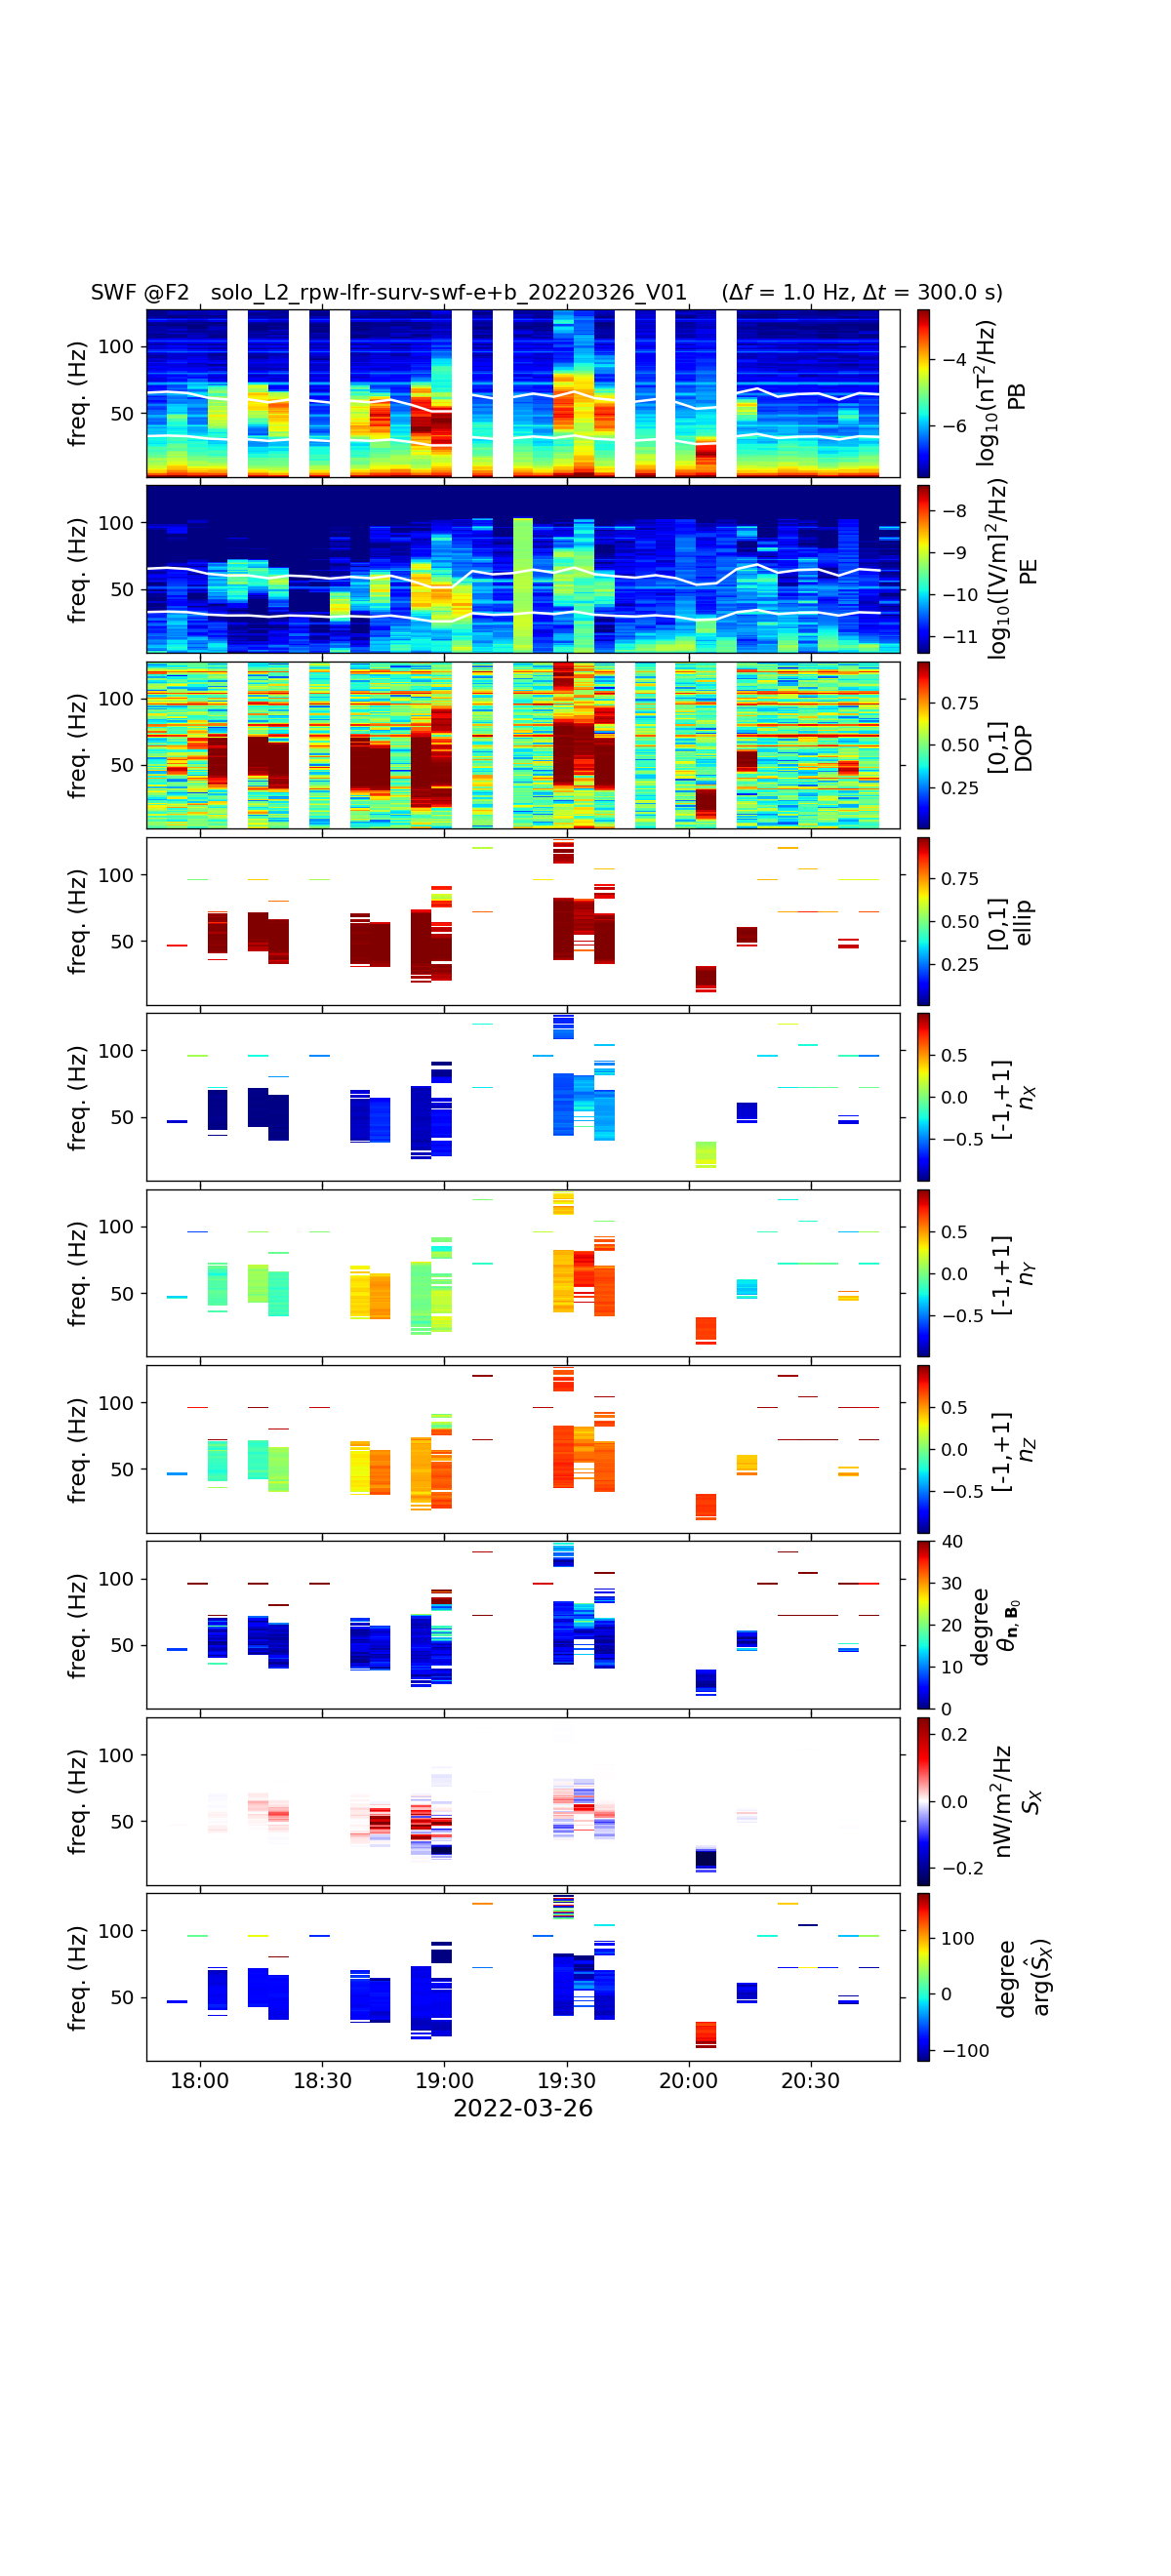

In [26]:
# figure with fce lines and angle between wave normal vector n and B0

# good

datet1 = datetime(2022, 3, 26, 17, 45, 0)
datet2 = datetime(2022, 3, 26, 20, 45, 0)

#for F in [0,1,2]:
for F in [2]:    
    i1 = index_from_date(datet1, sm_l2_swf_epoch_datetime2E_SRF_good[F])
    i2 = index_from_date(datet2, sm_l2_swf_epoch_datetime2E_SRF_good[F])
    sx = slice(i1, i2+1)    
    j1 = np.argmin(np.abs(sm_l2_swf_freq2E_SRF_good[F][:] - 0.))
    #j2 = np.argmin(np.abs(sm_l2_swf_freq2E_SRF_good[F][:] - 66.))
    j2 = len(sm_l2_swf_freq2E_SRF_good[F]) - 1
    #sy = ...
    sy = slice(j1, j2+1)            
    
    ampl_range = [[3e-8, 3e-3],[2e-10/49, 2e-6/49],                 
                  [0.01, 0.99],   [0.01, 0.99], 
                  [-0.999, 0.999], [-0.999, 0.999], [-0.999, 0.999], [0, 40], 
                  [-0.5/8*4, 0.5/8*4], [-120, +180]]

    cmap_list = 8*[plt.cm.jet] + 2*[plt.cm.seismic, plt.cm.jet]

    dop = 0.9
    dop_filter = np.heaviside(bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['degree_polar_3b'][sx,sy]-dop, 1)
    dop_filter[dop_filter == 0] = np.nan
    
    swf_l2_n_dt = timedelta(seconds=(8./2 if F == 2 else 0.5/2 if F == 1 else 1./12/2))
    swf_l2_n_fce_datetime = sm_l2_swf_epoch_datetime2E_SRF_good[F][sx] + swf_l2_n_dt
    swf_l2_n_fce_value = Fce_from_B0(swf_l2_n_fce_datetime, mag_bvec, mag_time)
    swf_l2_n_nvec_B0_theta = \
                wave_normal_vector_theta(bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,:],
                                         swf_l2_n_fce_datetime,
                                         mag_bvec, mag_time, deg=True)   

    #date_fmt = None
    date_fmt = '%H:%M'
    l1, l2 = 0.05, 0.10        
    fig_spectrograms([bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['psd_b_bp1'][sx,sy],
                      bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['psd_e_bp1'][sx,sy],
                      bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['degree_polar_3b'][sx,sy],                  
                      bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['ellip_bp1'][sx,sy]*dop_filter,
                      bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,0]*dop_filter,
                      bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,1]*dop_filter,
                      bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,2]*dop_filter,
                      swf_l2_n_nvec_B0_theta*dop_filter,
                      bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['sx_bp1'][sx,sy]*dop_filter,                 
                      np.angle(bp1_l2_data_from_swf_l2_data2E_SRF_good[F]['sx'][sx,sy], deg=True)*dop_filter],
                      sm_l2_swf_epoch_datetime2E_SRF_good[F][sx], sm_l2_swf_freq2E_SRF_good[F][sy], 
                      cmap=cmap_list, figsize=(10,22), hspace=0.05, cbar_aspect=15, cbar_pad=0.02,                                 
                      fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,  
                      fname=dir_plots+'/'+swf_l2_bname+'_SWF_F%s_spectrogram-bp1-srf-good+theta'%(F) +  \
                                '_corr=%4.2f_na=%d_nw=%d_dop=%4.2f'%(corr_swf_l2, na_swf_l2, nw_swf_l2, dop)+\
                                                       '_i1=%s_i2=%s_j1=%s_j2=%s'%(i1, i2, j1, j2) + \
                                                       '_l1=%d_l2=%d.png'%(l1*100, l2*100),           
                      ampl_range=ampl_range,  ylabel='freq. (Hz)',                  
                      log=2*[True]+8*[False], psd=2*[psd_swf_l2]+8*[False], 
                      nop=2*[False]+8*[True], logy=10*[False],
                      units=['nT', '[V/m]', '[0,1]', '[0,1]',
                             '[-1,+1]', '[-1,+1]', '[-1,+1]', 'degree',
                             'nW/m$^2$/Hz', 'degree'], 
                      names=['PB', 'PE', 'DOP', 'ellip', 
                             '$n_X$', '$n_Y$', '$n_Z$',  
                             r'$\theta_{\mathbf{n}, \mathbf{B}_0}$',
                             '$S_X$', 'arg($\hat{S}_{\!X}$)'],
                      comment='{} @F{:d}   '.format('       SWF', F) + swf_l2_bname,
                      time_gap=False, gap_echo=True, date_fmt= date_fmt,
                      xlabel=True, xtl_rot=0., xtl_ha='center',
                      rec_wf_list = [{'ipanel': i, 'multi_x': 2*[swf_l2_n_fce_datetime], 
                                      'multi_y': [l1*swf_l2_n_fce_value, l2*swf_l2_n_fce_value],                                    
                                      'multi_color': 2*['white'], 'multi_linestyle': 2*['-'], 
                                      'multi_marker': 2*[''], 'multi_linewidth': 2*[1.5]} for i in range(2)])  

###  Plot of selected waveform snapshot of L2 Normal SWF data

In [27]:
# to do once

if not swf_datetime:    
    swf_b_l2_epoch_datetime = 3*[None]
    for F in [0,1,2]:
        swf_b_l2_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(swf_b_l2_epoch[F])
    swf_l2_epoch_datetime = swf_b_l2_epoch_datetime        

F = 2
snap_id: 2022-03-26 18:50:00
isnap: 212, tsnap: 2022-03-26 18:51:48.293778

F = 1
snap_id: 2022-03-26 18:50:00
isnap: 212, tsnap: 2022-03-26 18:51:52.044410



<IPython.core.display.Javascript object>


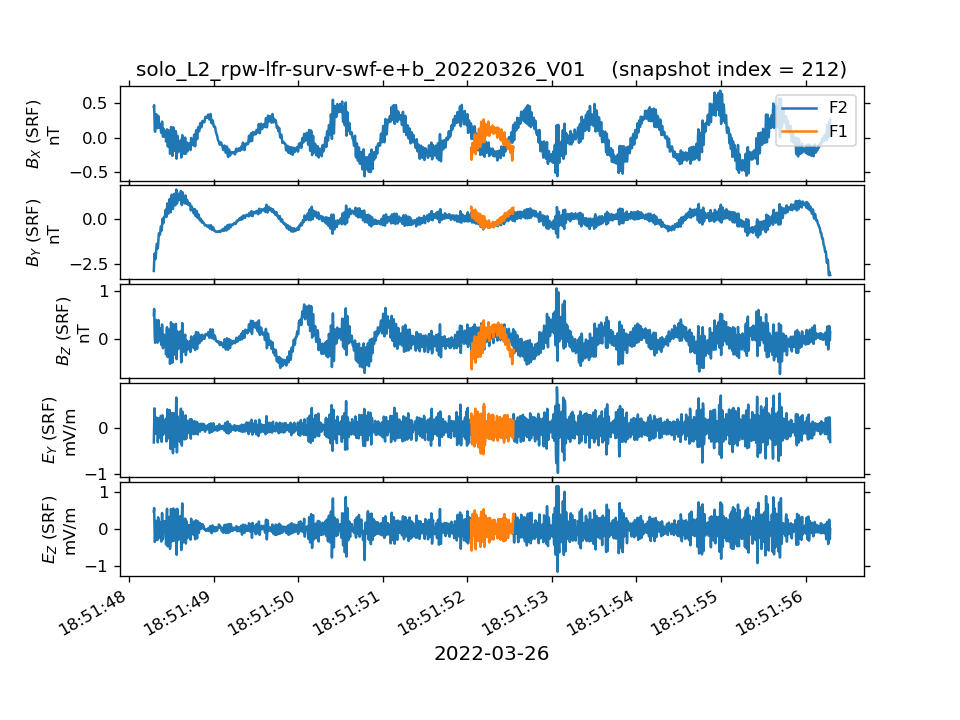

In [28]:
snapBEV  = select_oneSWF(datetime(2022, 3, 26, 18, 50, 0), 
                         swf_l2_epoch_datetime, swf_l2_B_SRF, swf_l2_EYZ_SRF, swf_l2_V,
                         F_list=[2, 1], echo=True, bname=swf_l2_bname)

fig_oneSWF(snapBEV, date_fmt_s='%H:%M:%S', figsize=(8,6))  

<IPython.core.display.Javascript object>


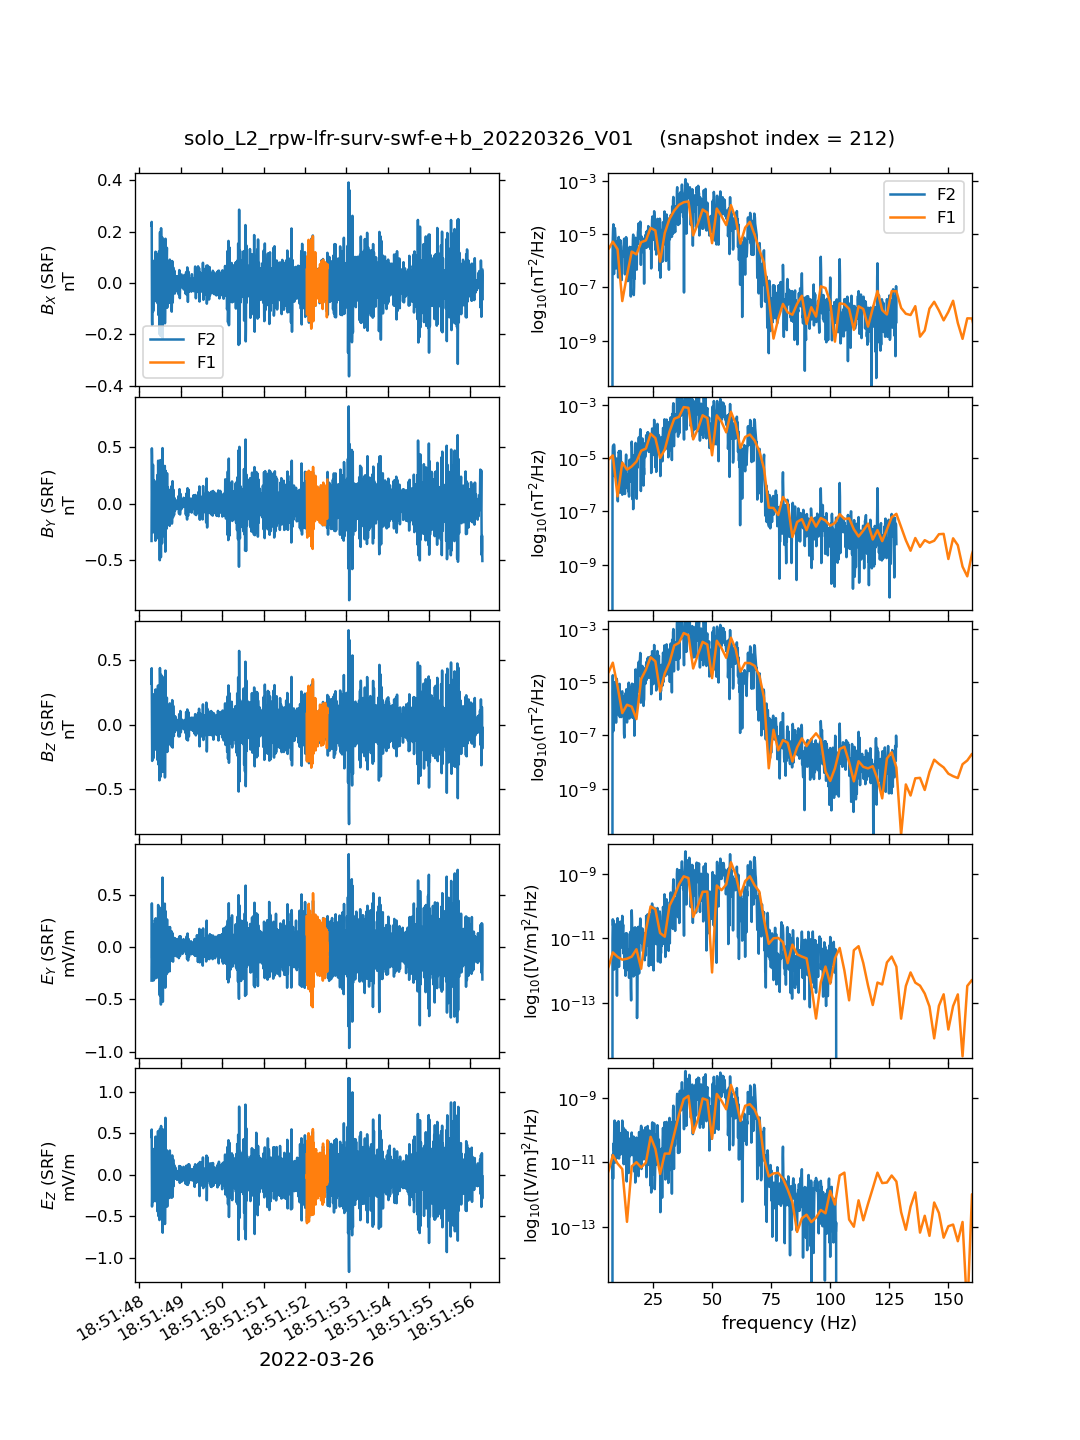

In [29]:
snapBEV  = select_oneSWF(212, swf_l2_epoch_datetime, swf_l2_B_SRF, swf_l2_EYZ_SRF, swf_l2_V,
                         F_list=[2,1], echo=False, bname=swf_l2_bname)

fcut = 8
twin = 'notrapezoid5'
removeDC = True
snapBEV_filtered = filtering_oneSWF(snapBEV, f1=fcut, f2=None, F_list=[2,1], 
                                    twindow=twin, rm_dc=removeDC, echo=False)

ampl_range = [[2e-11, 2e-3], [2e-15, 8e-9]]
#ampl_range = [[2e-7/5, 2e-3], [2e-12/5, 8e-9]]
#ampl_range = [[None, None], [None,None]]
#freq_range = [6, 400]
freq_range = [6, 160]

fig_oneSWF(snapBEV_filtered, date_fmt_s='%H:%M:%S', spectra=True, window=True, removeMean=True,           
           ampl_range=ampl_range, freq_range=freq_range, loglog=False, figsize=(9,12), wspace=0.3,
           fname=dir_plots+'/'+swf_l2_bname+'_SWF_F2F1_waveform-spectrum_'+\
           'isnap=%d_f1=%d_f2=%d_fcut=%d_%s.png'%(snapBEV_filtered['isnap'][2], *freq_range, fcut, twin))           

<a id='l2-surv-cwf-file'></a> 
## L2 Burst CWF data [start](#start)  [previous](#l2-surv-swf-file) [end](#end) 

In [30]:
# BURST data are stored in the daily SURVEY files because BURST data occur once a day

cdffiles=glob.glob(dir_DATA + '/RPW_L2_SURV_2022' + '/*lfr*surv*cwf*' + day_data + '*')
cdffiles.sort()
for file in cdffiles:
    print(os.path.basename(file))  
    
cwf_b_l2_cdffile = cdffiles[0]    
cwf_b_l2_bname = os.path.basename(cwf_b_l2_cdffile)[:-4]
cwf_e_l2_cdffile = cdffiles[1]    
cwf_e_l2_bname = os.path.basename(cwf_e_l2_cdffile)[:-4]

solo_L2_rpw-lfr-surv-cwf-b_20220326_V01.cdf
solo_L2_rpw-lfr-surv-cwf-e_20220326_V01.cdf


In [31]:
# load magnetic field data

# BURST data are sampled at F = 2 (i.e. at 256Hz)

F = 2

cwf_b_l2_cdf = load_cwf_b_CDF_L2(cwf_b_l2_cdffile, echo=True, 
                                 key_attrs=['Pipeline_version', 'Software_version'], 
                                 #key_field=['MAG_LABEL', 'MAG_LABEL_RTN', 'SAMPLING_RATE', 'SURVEY_MODE',
                                 #           'QUALITY_FLAG', 'L2_QUALITY_BITMASK', 'QUALITY_BITMASK'],
                                 key_field_attrs=['B', 'L2_QUALITY_BITMASK', 'QUALITY_BITMASK'],
                                 L2_QUALITY_BITMASK=True)
(cwf_l2_B_UARF, cwf_b_l2_epoch, cwf_l2_field_dict) = cwf_b_l2_cdf

cwf_datetime = False
if cwf_datetime:
    cwf_b_l2_epoch_datetime = 3*[None]
    for F in [0,1,2]:
        cwf_b_l2_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(cwf_b_l2_epoch[F])
        
# filter out the magnetic data polluted by the current of the SCM heater
cwf_l2_B_QBM = cwf_l2_field_dict['L2_QUALITY_BITMASK']
cwf_l2_B_UARF_good = 4*[None]
cwf_l2_B_UARF_good[F] = filter_scm_cwf_QBM(cwf_l2_B_UARF[F], cwf_l2_B_QBM[F], value=np.nan)
    
# transform to SRF   
cwf_l2_B_SRF = 4*[None]
cwf_l2_B_SRF_good = 4*[None]
cwf_l2_B_SRF[F] = transform_from_UARF_to_SRF(cwf_l2_B_UARF[F])
cwf_l2_B_SRF_good[F] = transform_from_UARF_to_SRF(cwf_l2_B_UARF_good[F])

PRINT cdf: 
 B: CDF_REAL4 [2268672, 3]
B_RTN: CDF_REAL4 [2268672, 3]
CALIBRATION_TABLE_INDEX: CDF_UINT1 [2268672, 2, 2]
Epoch: CDF_TIME_TT2000 [2268672]
L2_QUALITY_BITMASK: CDF_UINT2 [2268672]
MAG_LABEL: CDF_CHAR*2 [3] NRV
MAG_LABEL_RTN: CDF_CHAR*5 [3] NRV
QUALITY_BITMASK: CDF_UINT2 [2268672]
QUALITY_FLAG: CDF_UINT1 [2268672]
SAMPLING_RATE: CDF_REAL4 [2268672]
SURVEY_MODE: CDF_UINT1 [2268672] 


 cdf['B'].attrs: CATDESC: Magnetic field values (Bx, By, Bz) [CDF_CHAR]
DEPEND_0: Epoch [CDF_CHAR]
DISPLAY_TYPE: time_series [CDF_CHAR]
FIELDNAM: Magnetic field [CDF_CHAR]
FILLVAL: -1e+31 [CDF_REAL4]
FORMAT: F8.4 [CDF_CHAR]
LABL_PTR_1: MAG_LABEL [CDF_CHAR]
SCALEMAX: 4.6429787 [CDF_FLOAT]
SCALEMIN: -4.1335573 [CDF_FLOAT]
SCALETYP: linear [CDF_CHAR]
UNITS: nT [CDF_CHAR]
VALIDMAX: 1e+30 [CDF_REAL4]
VALIDMIN: -1e+30 [CDF_REAL4]
VAR_NOTES: 3 entries array with magnetic field values (B3x, B1y, B2z) [CDF_CHAR]
VAR_TYPE: data [CDF_CHAR]

 cdf['L2_QUALITY_BITMASK'].attrs: CATDESC: Bitmask flag [CDF_CHAR

In [32]:
# load electric field data

# BURST data are sampled at F = 2 (i.e. at 256Hz)

F = 2

cwf_e_l2_cdf = load_cwf_e_CDF_L2(cwf_e_l2_cdffile, echo=True, fill_value=None, #-9.99e30,
                                 key_attrs=['Pipeline_version', 'Software_version'], 
                                 key_field=['VDC_LABEL', 'EDC_LABEL', 'EAC_LABEL', 'SAMPLING_RATE'],
                                 key_field_attrs='EAC')
(cwf_l2_V_DC, cwf_l2_E_DC, cwf_l2_E_AC, cwf_e_l2_epoch) = cwf_e_l2_cdf

print()
# V12 and V23 (merging of DC and AC data)
cwf_l2_E = 4*[None]
cwf_l2_E[F] = meld_cwf_E_bias_L2(cwf_l2_E_DC[F], cwf_l2_E_AC[F], fill_value=-9.99e30)
# V1
cwf_l2_V = 4*[None]
cwf_l2_V[F] = cwf_l2_V_DC[F][:, 0:1]
cwf_l2_epoch = 4*[None]
if np.all(cwf_e_l2_epoch[F] == cwf_b_l2_epoch[F]):
    cwf_l2_epoch[F] = cwf_b_l2_epoch[F]
    try:
        cwf_l2_epoch_datetime[F] = cwf_b_l2_epoch_datetime[F]
    except NameError:
        print("no cwf_F%d datetime computed"%(F))  
    if 'cdag' in cwf_e_l2_bname:    
        cwf_l2_bname = cwf_e_l2_bname.replace('cwf-e','cwf-e+b') + '+' + cwf_b_l2_bname[-2:]
    else:
        cwf_l2_bname = cwf_e_l2_bname.replace('cwf-e','cwf-e+b')         
    print(cwf_l2_bname)
else:
    print("cwf_e_l2_epoch IS DIFFERENT FROM cwf_b_l2_epoch !!?")
    
# transform to SRF   
cwf_l2_EYZ_SRF = 4*[None]
cwf_l2_EX_SRF = 4*[None]
alphaY = 1.3    
a2y = -7 * alphaY     
alphaZ = 1.3     
a1z = -7 * alphaZ
cwf_l2_EYZ_SRF[F] = transform_from_ANT_to_SRF_bis(cwf_l2_E[F], A2Y=a2y,  A1Z=a1z)

PRINT cdf: 
 BW: CDF_UINT1 [2268672]
DELTA_PLUS_MINUS: CDF_INT8 [2268672]
EAC: CDF_FLOAT [2268672, 3]
EAC_LABEL: CDF_UCHAR*5 [3] NRV
EDC: CDF_FLOAT [2268672, 3]
EDC_LABEL: CDF_UCHAR*5 [3] NRV
Epoch: CDF_TIME_TT2000 [2268672]
IBIAS1: CDF_FLOAT [2268672]
IBIAS2: CDF_FLOAT [2268672]
IBIAS3: CDF_FLOAT [2268672]
L2_QUALITY_BITMASK: CDF_UINT2 [2268672]
QUALITY_BITMASK: CDF_UINT2 [2268672]
QUALITY_FLAG: CDF_UINT1 [2268672]
SAMPLING_RATE: CDF_FLOAT [2268672]
SYNCHRO_FLAG: CDF_UINT1 [2268672]
VDC: CDF_FLOAT [2268672, 3]
VDC_LABEL: CDF_UCHAR*4 [3] NRV 

VDC_LABEL: ['Vdc1' 'Vdc2' 'Vdc3']
EDC_LABEL: ['Edc12' 'Edc13' 'Edc23']
EAC_LABEL: ['Eac12' 'Eac13' 'Eac23']
SAMPLING_RATE: [16. 16. 16. ... 16. 16. 16.]

 cdf['EAC'].attrs: CATDESC: AC probe to probe voltages (probes V1-V2, V1-V3, V2-V3) [CDF_UCHAR]
DELTA_MINUS_VAR: DELTA_PLUS_MINUS [CDF_UCHAR]
DELTA_PLUS_VAR: DELTA_PLUS_MINUS [CDF_UCHAR]
DEPEND_0: Epoch [CDF_UCHAR]
DISPLAY_TYPE: time_series [CDF_UCHAR]
FIELDNAM: AC probe potential difference [CD

In [33]:
# good

# computation of the PSD from the CWF sampled at F = 2
sm_l2_cwf_data2E_SRF_good = 3*[None]
sm_l2_cwf_epoch2E_SRF_good = 3*[None]
sm_l2_cwf_epoch_datetime2E_SRF_good = 3*[None]
sm_l2_cwf_freq2E_SRF_good = 3*[None]

F = 2

psd_cwf_l2 = True
corr_cwf_l2 = 4.
na_cwf_l2 = 4
nw_cwf_l2 = 128
psd_cwf_l2_delta_t = na_cwf_l2*nw_cwf_l2 / LFR_Fs[F]

(sm_l2_cwf_data2E_SRF_good[F], sm_l2_cwf_epoch2E_SRF_good[F], sm_l2_cwf_freq2E_SRF_good[F]) = \
        sm_from_cwf(cwf_l2_B_SRF[F], cwf_l2_EYZ_SRF[F], cwf_l2_V[F], cwf_l2_epoch[F], F=F, 
                    nw=nw_cwf_l2, na=na_cwf_l2, echo=True, win='hanning_idl', unit='count^2/Hz', 
                    background=False, DC=False)   
sm_l2_cwf_epoch_datetime2E_SRF_good[F] = pycdf.lib.v_tt2000_to_datetime(sm_l2_cwf_epoch2E_SRF_good[F])

window: hanning_idl
rm_dc : True
norm  : 2.00
Compute time-averaged spectral matrices
INPUT
 data: array(954240, 6)
 nw: 128
 na: 4
 nsa: 128
 nsc: 512
OUPUT
 asm: array(1863, 65, 6, 6)
 time_asm: array(1863, 3)


In [34]:
# good

# computation of the "BP1" wave parameters from the CWF sampled at F = 2
bp1_l2_data_from_cwf_l2_data2E_SRF_good = 4*[None]

# sx = 4 (<EyBz*> - <EzBy*>) / mu0 / 2  
# in (nW/m^2)/Hz because (V/m * nT / mu0)
# factor 4 because corr_cwf_l2=4 only (just positive frequencies and 
# correction for the windowing bias effect, see Chust et al., A&A, 2021)
coeff_sx = 4 * 1e7/4/np.pi / 2 
# vphi = ( ny <EzBx*> - nz <EyBx*> ) /  <BxBx*>
# in km/s because V/m / T / 1e3
coeff_vphi = 1e9 / 1e3

F = 2 
bp1_l2_data_from_cwf_l2_data2E_SRF_good[F] = \
           sm_3b2e_bp1(sm_l2_cwf_data2E_SRF_good[F][..., 0:5, 0:5],  
                       k44_pe=1.,  k55_pe=1., k45_pe=0.,           
                       k14_sx=0.,  k15_sx=0., k24_sx=0., k25_sx=-1.*coeff_sx, k34_sx=1.*coeff_sx, k35_sx=0.,                          
                       k14_ny=0.,  k15_ny=1.*coeff_vphi, k24_ny=0., k25_ny=0.,  k34_ny=0., k35_ny=0.,                          
                       k14_nz=-1.*coeff_vphi, k15_nz=0., k24_nz=0., k25_nz=0.,  k34_nz=0., k35_nz=0., 
                       M_SOprime_SCM = np.diagflat([1,1,1]), M_tilde_SOprime=np.diagflat([1,1,1]),                                                                                                                                                   
                       echo=True, ok_dop_e=False)

Shape of the spectral matrix structure (BP2 or ASM_ave) from which the basic parameters BP1 will be computed :
nspec: 1863, nfreq: 63, dim: 5


### Full day PSD spectrogram of L2 Burst CWF data

<IPython.core.display.Javascript object>


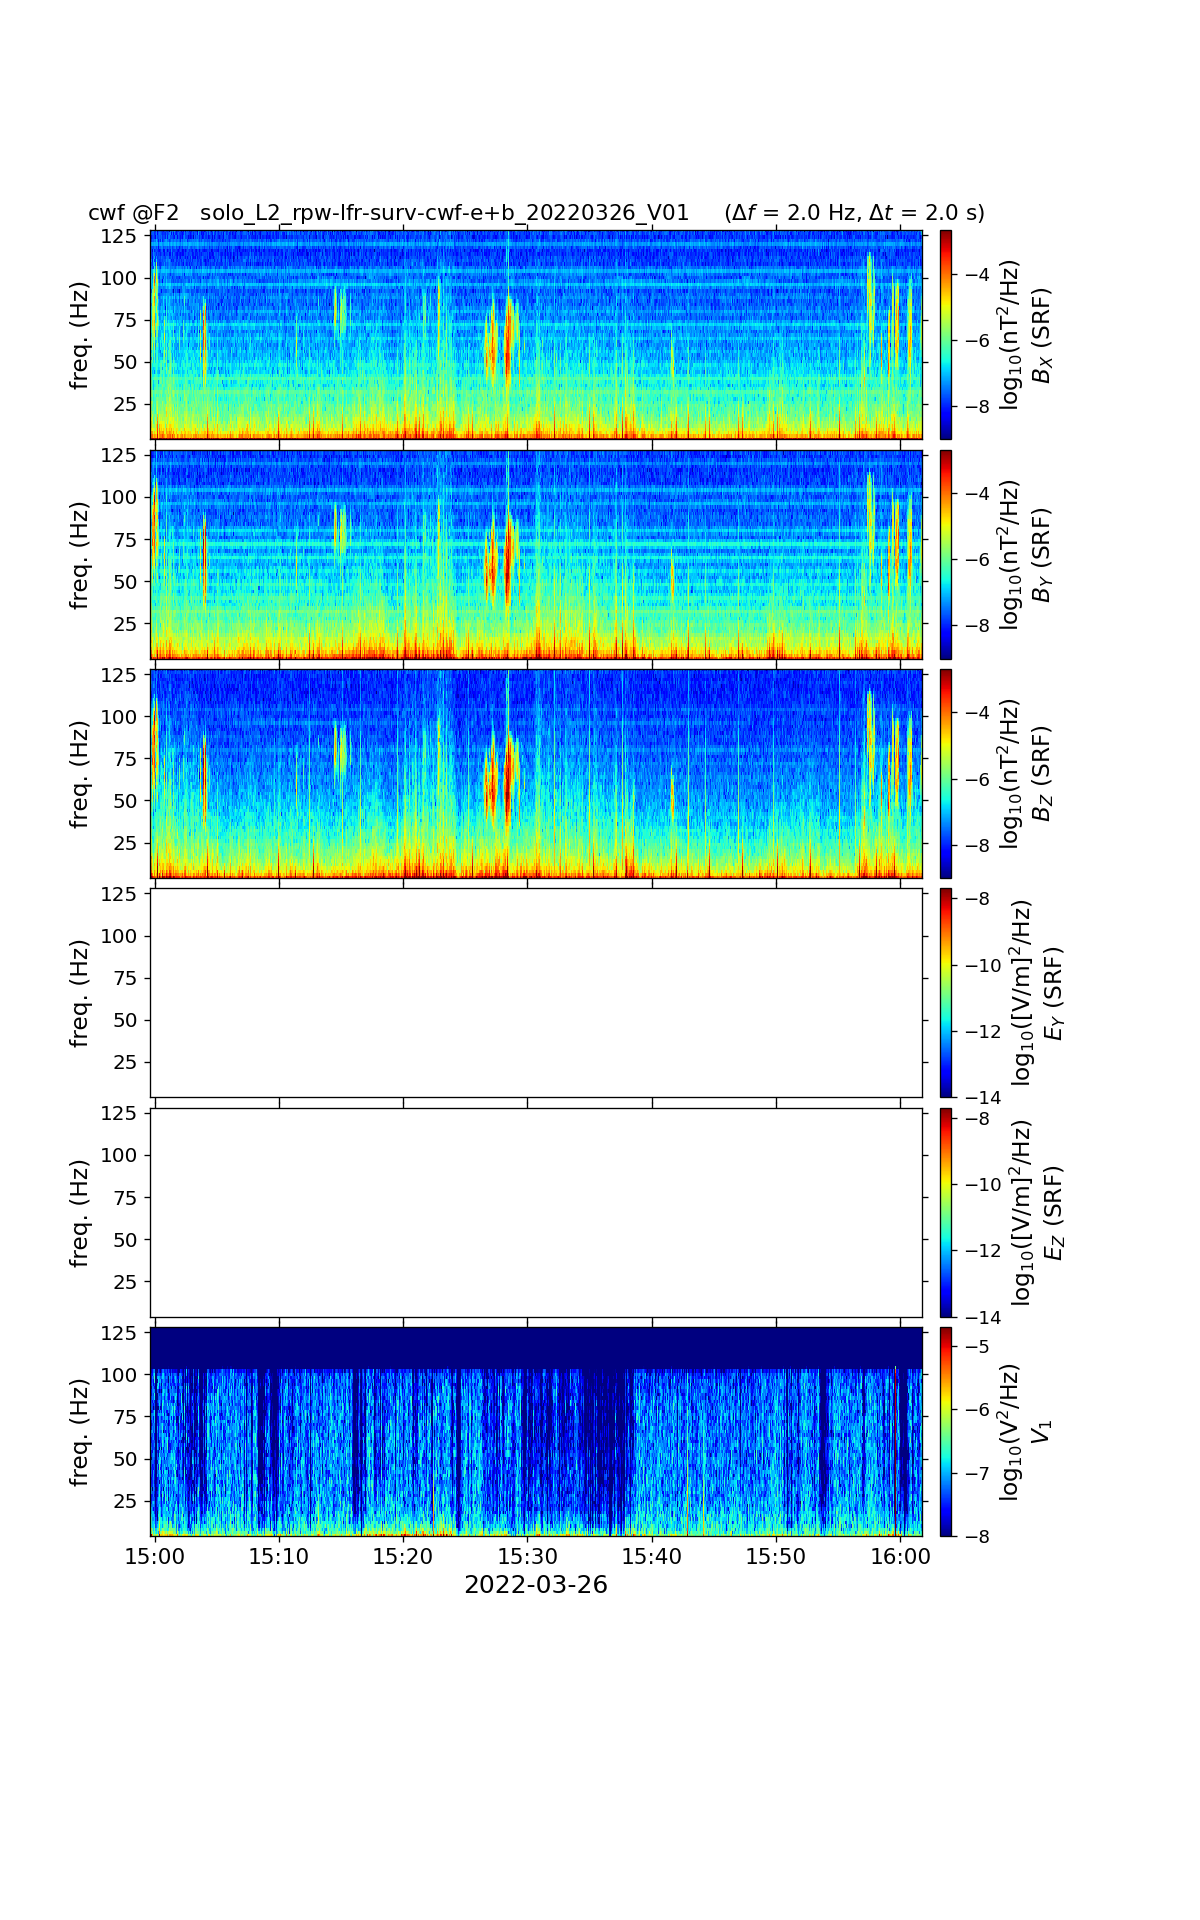

gap insertion here:

gap interval:



In [35]:
# good

F = 2           
ampl_range =  [[1e-9, 2e-3], [1e-9, 2e-3], [1e-9, 2e-3], [1e-12/100, 2e-6/100], [1e-12/100, 2e-6/100], 
               [1e-8, 2e-5]]
#ampl_range = None
date_fmt = None
fig_spectrograms([sm_l2_cwf_data2E_SRF_good[F][:,:,0,0].real, sm_l2_cwf_data2E_SRF_good[F][:,:,1,1].real, 
                  sm_l2_cwf_data2E_SRF_good[F][:,:,2,2].real,
                  sm_l2_cwf_data2E_SRF_good[F][:,:,3,3].real, sm_l2_cwf_data2E_SRF_good[F][:,:,4,4].real, 
                  sm_l2_cwf_data2E_SRF_good[F][:,:,5,5].real],                     
                  sm_l2_cwf_epoch_datetime2E_SRF_good[F], sm_l2_cwf_freq2E_SRF_good[F], 
                  cmap=plt.cm.jet, figsize=(10,16), hspace=0.05, cbar_aspect=20, cbar_pad=0.02,                                 
                  fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,                                                       
                  ylabel='freq. (Hz)', xlabel=True, xtl_rot=0., xtl_ha='center', date_fmt=date_fmt,
                  fname=dir_plots+'/'+cwf_l2_bname+'_CWF_F%s_spectrogram6-srf-good_corr=%4.2f_na=%d_nw=%d.png'%(F, 
                                                                      corr_cwf_l2, na_cwf_l2, nw_cwf_l2),
                  log=6*[True], psd=6*[psd_cwf_l2], nop=6*[False], units=3*['nT']+2*['[V/m]']+['V'], 
                  names=['$B_X$ (SRF)', '$B_Y$ (SRF)', '$B_Z$ (SRF)', '$E_Y$ (SRF)', 
                         '$E_Z$ (SRF)', '$V_1$'],
                  comment='{} @F{:d}   '.format('cwf', F) + cwf_l2_bname, df_fmt='.1f',
                  time_gap=True, gap_echo=True, ampl_range=ampl_range)          

### Zoomed-in PSD spectrogram of L2 Burst CWF data

<IPython.core.display.Javascript object>


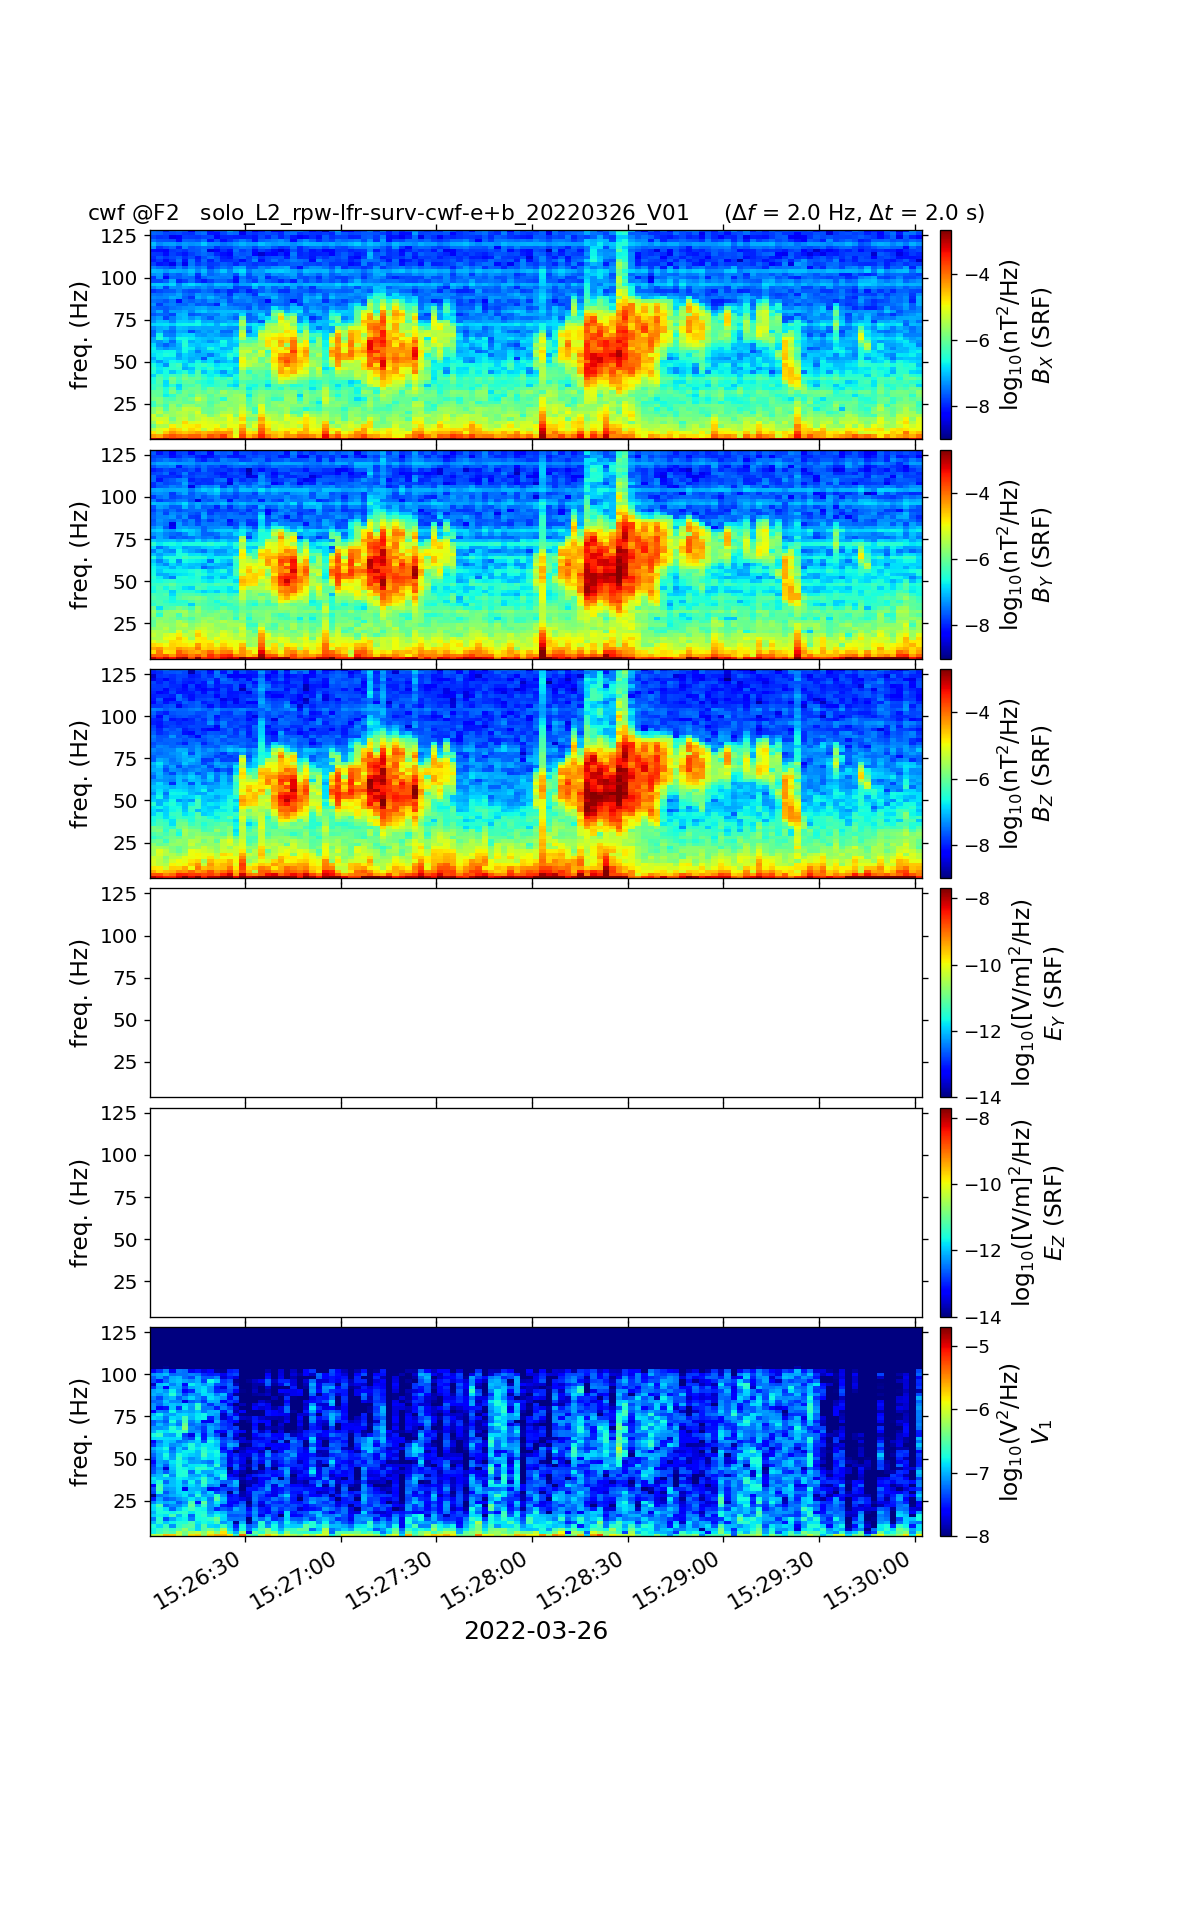

gap insertion here:

gap interval:



In [36]:
# good

F = 2           

datet1 = datetime(2022, 3, 26, 15, 26, 0)
datet2 = datetime(2022, 3, 26, 15, 30, 0)
     
i1 = index_from_date(datet1, sm_l2_cwf_epoch_datetime2E_SRF_good[F])
i2 = index_from_date(datet2, sm_l2_cwf_epoch_datetime2E_SRF_good[F])
sx = slice(i1, i2+1)    
j1 = np.argmin(np.abs(sm_l2_cwf_freq2E_SRF_good[F][:] - 0.))
#j2 = np.argmin(np.abs(sm_l2_cwf_freq2E_SRF_good[F][:] - 66.))
j2 = len(sm_l2_cwf_freq2E_SRF_good[F]) - 1
#sy = ...
sy = slice(j1, j2+1)

ampl_range =  [[1e-9, 2e-3], [1e-9, 2e-3], [1e-9, 2e-3], [1e-12/100, 2e-6/100], [1e-12/100, 2e-6/100], 
               [1e-8, 2e-5]]
#ampl_range = None
#date_fmt = '%Y-%m-%d %H:%M:%S'  
date_fmt = '%H:%M:%S'
#date_fmt = None         
fig_spectrograms([sm_l2_cwf_data2E_SRF_good[F][sx,sy,0,0].real, sm_l2_cwf_data2E_SRF_good[F][sx,sy,1,1].real, 
                  sm_l2_cwf_data2E_SRF_good[F][sx,sy,2,2].real,
                  sm_l2_cwf_data2E_SRF_good[F][sx,sy,3,3].real, sm_l2_cwf_data2E_SRF_good[F][sx,sy,4,4].real, 
                  sm_l2_cwf_data2E_SRF_good[F][sx,sy,5,5].real],                     
                  sm_l2_cwf_epoch_datetime2E_SRF_good[F][sx], sm_l2_cwf_freq2E_SRF_good[F][sy], 
                  cmap=plt.cm.jet, figsize=(10,16), hspace=0.05, cbar_aspect=20, cbar_pad=0.02,                                 
                  fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,                                                       
                  ylabel='freq. (Hz)', xlabel=True, xtl_rot=30., xtl_ha='right', date_fmt=date_fmt,
                  fname=dir_plots+'/'+cwf_l2_bname+'_CWF_F%s_spectrogram6-srf-good_corr=%4.2f_na=%d_nw=%d'%(F, 
                                                                      corr_cwf_l2, na_cwf_l2, nw_cwf_l2)+\
                                                    '_i1=%s_i2=%s_j1=%s_j2=%s.png'%(i1, i2, j1, j2),   
                  log=6*[True], psd=6*[psd_cwf_l2], nop=6*[False], units=3*['nT']+2*['[V/m]']+['V'], 
                  names=['$B_X$ (SRF)', '$B_Y$ (SRF)', '$B_Z$ (SRF)', '$E_Y$ (SRF)', 
                         '$E_Z$ (SRF)', '$V_1$'],
                  comment='{} @F{:d}   '.format('cwf', F) + cwf_l2_bname, df_fmt='.1f',
                  time_gap=True, gap_echo=True, ampl_range=ampl_range)                

### Zoomed-in "BP1" spectrogram of L2 Burst CWF data with $F_{ce}$ lines (5 % and 10%)  and $\theta$ angle (n, B0)

<IPython.core.display.Javascript object>


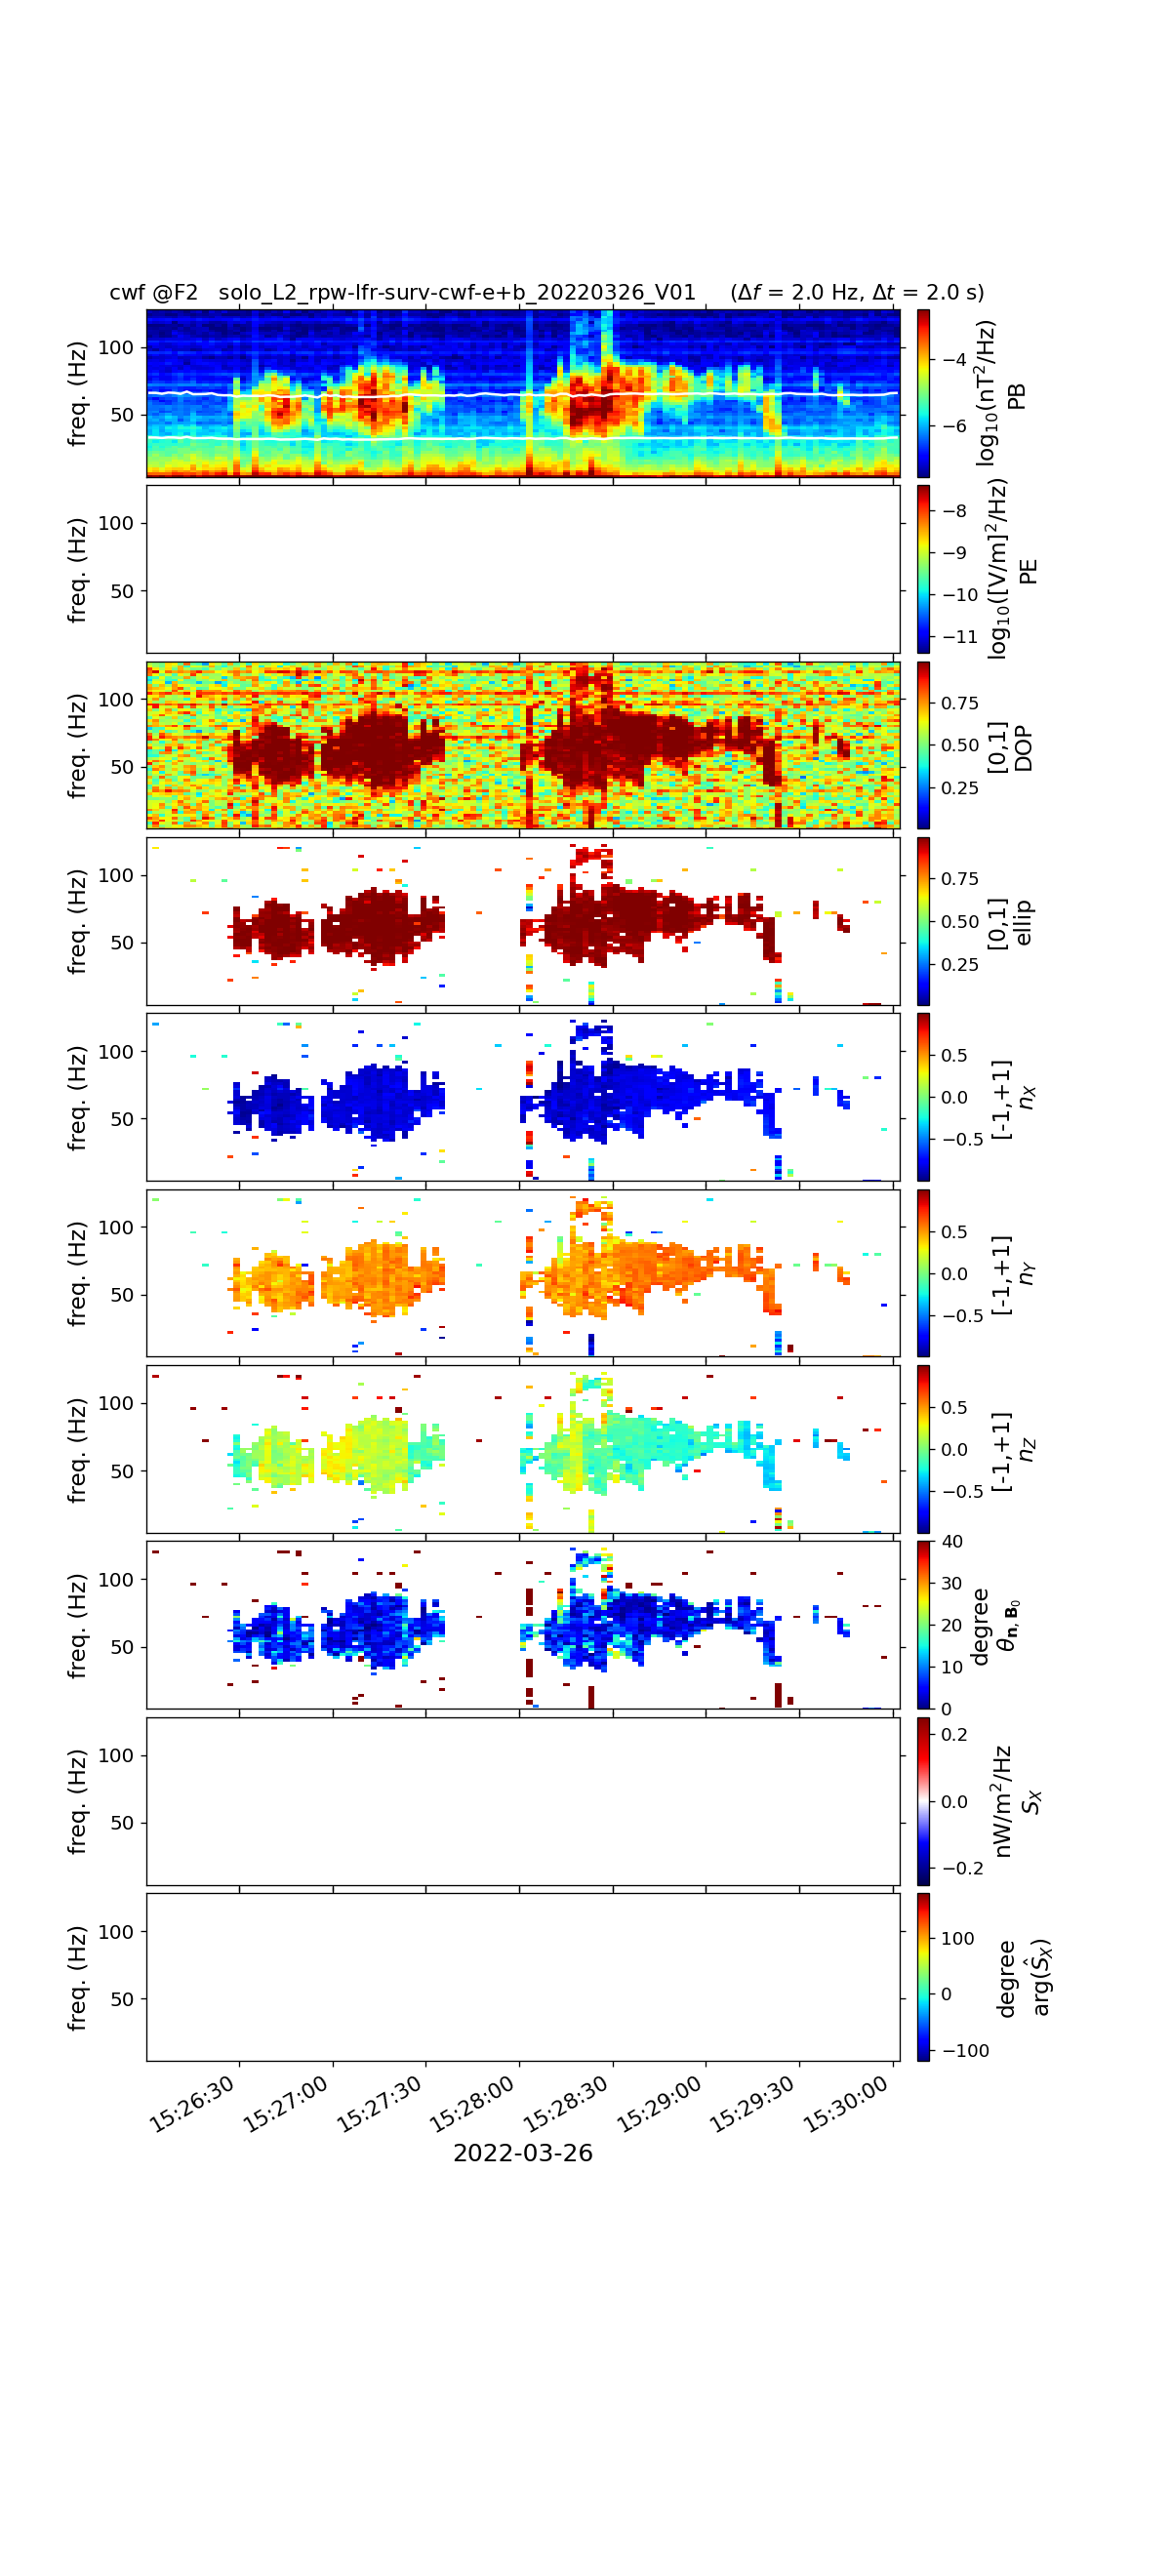

In [37]:
# figure with fce lines and angle between wave normal vector n and B0

# good

F = 2           

datet1 = datetime(2022, 3, 26, 15, 26, 0)
datet2 = datetime(2022, 3, 26, 15, 30, 0)

i1 = index_from_date(datet1, sm_l2_cwf_epoch_datetime2E_SRF_good[F])
i2 = index_from_date(datet2, sm_l2_cwf_epoch_datetime2E_SRF_good[F])
sx = slice(i1, i2+1)    
j1 = np.argmin(np.abs(sm_l2_cwf_freq2E_SRF_good[F][:] - 0.))
#j2 = np.argmin(np.abs(sm_l2_cwf_freq2E_SRF_good[F][:] - 66.))
j2 = len(sm_l2_cwf_freq2E_SRF_good[F]) - 1
#sy = ...
sy = slice(j1, j2+1)

ampl_range = [[3e-8, 3e-3],[2e-10/49, 2e-6/49],                 
              [0.01, 0.99],   [0.01, 0.99], 
              [-0.999, 0.999], [-0.999, 0.999], [-0.999, 0.999], [0, 40], 
              [-0.5/8*4, 0.5/8*4], [-120, +180]]

cmap_list = 8*[plt.cm.jet] + 2*[plt.cm.seismic, plt.cm.jet]

dop = 0.9
dop_filter = np.heaviside(bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['degree_polar_3b'][sx,sy]-dop, 1)
dop_filter[dop_filter == 0] = np.nan

cwf_l2_dt = timedelta(seconds=(psd_cwf_l2_delta_t/2))
cwf_l2_fce_datetime = sm_l2_cwf_epoch_datetime2E_SRF_good[F][sx] + cwf_l2_dt
cwf_l2_fce_value = Fce_from_B0(cwf_l2_fce_datetime, mag_bvec, mag_time)
cwf_l2_nvec_B0_theta = \
            wave_normal_vector_theta(bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,:],
                                     cwf_l2_fce_datetime,
                                     mag_bvec, mag_time, deg=True)   

#date_fmt = '%Y-%m-%d %H:%M:%S'  
#date_fmt = None
#date_fmt = '%H:%M'
date_fmt = '%H:%M:%S'
l1, l2 = 0.05, 0.10        
fig_spectrograms([bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['psd_b_bp1'][sx,sy],
                  bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['psd_e_bp1'][sx,sy],
                  bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['degree_polar_3b'][sx,sy],                  
                  bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['ellip_bp1'][sx,sy]*dop_filter,
                  bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,0]*dop_filter,
                  bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,1]*dop_filter,
                  bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['nvec_bp1'][sx,sy,2]*dop_filter,
                  cwf_l2_nvec_B0_theta*dop_filter,
                  bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['sx_bp1'][sx,sy]*dop_filter,                 
                  np.angle(bp1_l2_data_from_cwf_l2_data2E_SRF_good[F]['sx'][sx,sy], deg=True)*dop_filter],
                  sm_l2_cwf_epoch_datetime2E_SRF_good[F][sx], sm_l2_cwf_freq2E_SRF_good[F][sy], 
                  cmap=cmap_list, figsize=(10,22), hspace=0.05, cbar_aspect=15, cbar_pad=0.02,                                 
                  fontsize=(15,14), fs_name=14, fs_title=13, ticklabel_fs=(13,12), cbar_ticklabel_fs=11,  
                  fname=dir_plots+'/'+cwf_l2_bname+'_CWF_F%s_spectrogram-bp1-srf-good+theta'%(F) +  \
                            '_corr=%4.2f_na=%d_nw=%d_dop=%4.2f'%(corr_cwf_l2, na_cwf_l2, nw_cwf_l2, dop)+\
                                                   '_i1=%s_i2=%s_j1=%s_j2=%s'%(i1, i2, j1, j2) + \
                                                   '_l1=%d_l2=%d.png'%(l1*100, l2*100),           
                  ampl_range=ampl_range,  ylabel='freq. (Hz)',                  
                  log=2*[True]+8*[False], psd=2*[psd_cwf_l2]+8*[False], 
                  nop=2*[False]+8*[True], logy=10*[False],
                  units=['nT', '[V/m]', '[0,1]', '[0,1]',
                         '[-1,+1]', '[-1,+1]', '[-1,+1]', 'degree',
                         'nW/m$^2$/Hz', 'degree'], 
                  names=['PB', 'PE', 'DOP', 'ellip', 
                         '$n_X$', '$n_Y$', '$n_Z$',  
                         r'$\theta_{\mathbf{n}, \mathbf{B}_0}$',
                         '$S_X$', 'arg($\hat{S}_{\!X}$)'],
                  comment='{} @F{:d}   '.format('       cwf', F) + cwf_l2_bname,
                  time_gap=False, gap_echo=True, date_fmt= date_fmt,
                  xlabel=True, xtl_rot=30., xtl_ha='right',
                  rec_wf_list = [{'ipanel': i, 'multi_x': 2*[cwf_l2_fce_datetime], 
                                  'multi_y': [l1*cwf_l2_fce_value, l2*cwf_l2_fce_value],                                    
                                  'multi_color': 2*['white'], 'multi_linestyle': 2*['-'], 
                                  'multi_marker': 2*[''], 'multi_linewidth': 2*[1.5]} for i in range(2)])  

###  Selected waveform plot of L2 Burst CWF data

In [38]:
# to do once

F = 2

if not cwf_datetime:    
    cwf_b_l2_epoch_datetime = 3*[None]
    cwf_b_l2_epoch_datetime[F] = pycdf.lib.v_tt2000_to_datetime(cwf_b_l2_epoch[F])
    cwf_l2_epoch_datetime = cwf_b_l2_epoch_datetime        

<IPython.core.display.Javascript object>


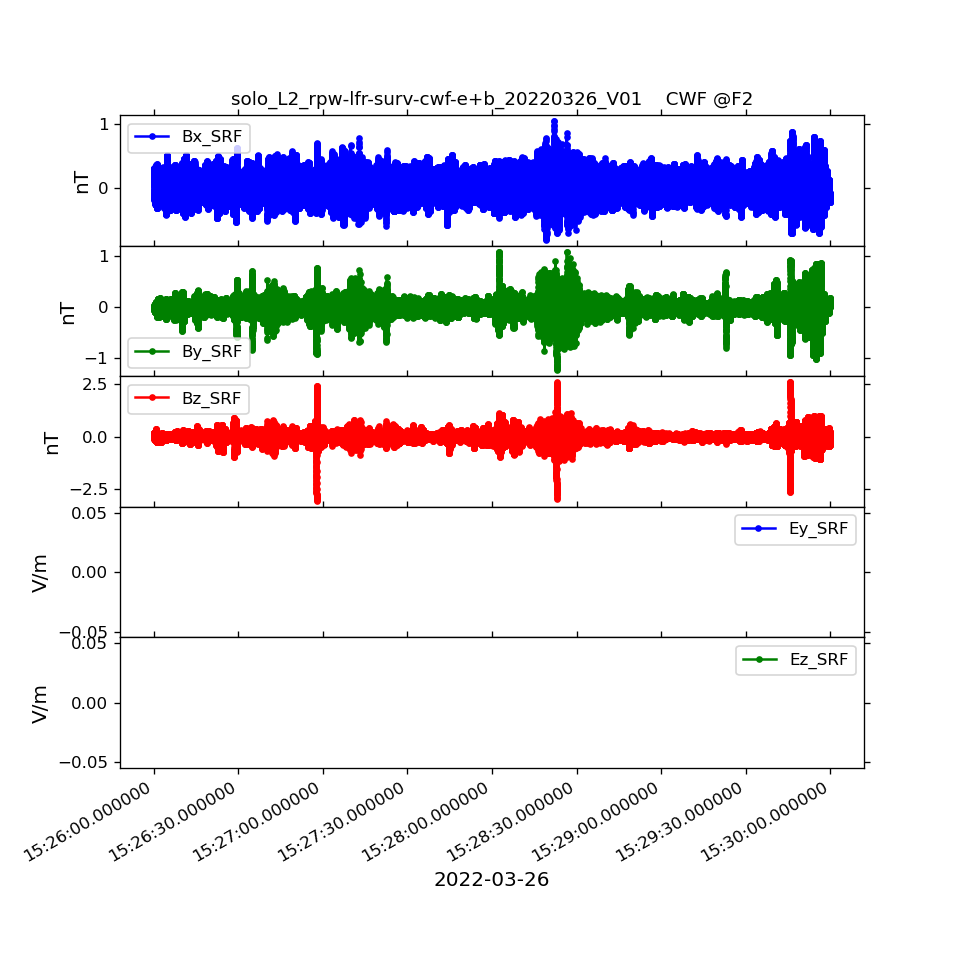

In [39]:
F = 2

datet1 = datetime(2022, 3, 26, 15, 26, 0)
datet2 = datetime(2022, 3, 26, 15, 30, 0)

i1 = index_from_date(datet1, cwf_l2_epoch_datetime[F])
i2 = index_from_date(datet2, cwf_l2_epoch_datetime[F])

sx = slice(i1, i2+1)

#date_fmt = '%Y-%m-%d %H:%M:%S'
#date_fmt = None
#date_fmt = '%H:%M:%S'
date_fmt = '%H:%M:%S.%f'
fig_waveforms([cwf_l2_B_SRF[F][sx, i] for i in range(3)] + [cwf_l2_EYZ_SRF[F][sx, i] for i in range(2)],              
              [['Bx_SRF'], ['By_SRF'], ['Bz_SRF']] + [['Ey_SRF'], ['Ez_SRF']],                             
               5*[cwf_l2_epoch_datetime[F][sx]], colors=[[colors_wf[3+i%3]] for i in range(5)],                  
               units=3*['nT']+2*['V/m'],
               markers=5*['.'],
               title=cwf_l2_bname + '    CWF @F%s'%(F), figsize=(8,8), hspace=0.0,
               fname=dir_plots+'/'+cwf_l2_bname+'_CWF_F%s_e+b_waveforms-srf'%(F)+\
                                                       '_i1=%s_i2=%s.png'%(i1, i2),
               xlabel=True, xtl_rot=30., xtl_ha='right', date_fmt=date_fmt)

<a id='end'></a> 
## End   [previous](#l2-surv-cwf-file)  [start](#start)